# **Final Project : Brazilian E-Commerce by Olist**
### Created By : Team Alpha (JCDSOL-013)
1. Adeline Kartika Tiku Putri

## **Business Problem Statement**

**Context**

Sebagai *junior data scientist* untuk Olist, sebuah *platform e-commerce* asal Brazil yang baru mulai beroperasi dari tahun 2015 dan saat ini sedang mengalami persaingan yang ketat di pasar. Untuk tetap kompetitif, perusahaan perlu memastikan pelanggan mereka tetap setia dan tidak meninggalkan *platform*. Analisis segmentasi pelanggan akan membantu Olist untuk lebih memahami pelanggannya dan menjalankan strategi bisnis yang sesuai dengan identifikasi masing-masing pelanggan sehingga tindakan *preventif* dapat diambil untuk mempertahankan mereka. Kami diberikan akses ke dataset publik yang berisi informasi tentang 100.000 pesanan yang dilakukan di Toko Olist dari tahun 2016 hingga 2018.

**Problem Statement**

Banyak pelanggan Olist yang tidak kembali setelah melakukan satu atau beberapa pembelian. Meningkatkan retensi pelanggan merupakan tantangan yang penting karena pelanggan yang loyal dapat memberikan nilai lebih tinggi sepanjang waktu (Customer Lifetime Value - CLV) dan biaya untuk mempertahankan pelanggan biasanya lebih rendah dibandingkan dengan memperoleh pelanggan baru.

Dataset yang diberikan berisi informasi yang kaya tentang perilaku pembelian pelanggan, termasuk status pesanan, harga, pembayaran, performa pengiriman, lokasi pelanggan, atribut produk, dan ulasan pelanggan. Dengan dataset tersebut, dapat mengidentifikasi pelanggan yang berisiko churn dan memahami faktor-faktor yang berkontribusi terhadap churn dapat membantu Olist mengembangkan strategi retensi yang efektif.

Pertanyaan yang akan dijawab:
- Bagaimana pendapatan per bulan dan tingkat pertumbuhan pendapatan bulanan?
- Berapa banyak pelanggan yang aktif per bulannya?
- Berapa banyak jumlah pesanan per bulannya?
- Berapa pendapatan rata-rata per pembelian pelanggan?
- Jenis pembayaran apa yang paling diminati oleh pelanggan? Berapa kali cicilan?
- Bagaimana *retention rate* dari platform Olist?


**Goals**

Tujuan utama dari analisis ini adalah untuk mendapatkan *insights* (wawasan) yang dapat ditindaklanjuti dari data pesanan Toko Olist. *Insights* ini nantinya diharapkan dapat membantu Toko Olist dalam:

1. Identifikasi Pelanggan : Menggunakan data historis untuk mengidentifikasi pelanggan / lebih mengenal pelanggannya.
2. Strategi Retensi: Mengembangkan strategi untuk mempertahankan pelanggan yang dimiliki oleh Olist
3. Meminimalisir biaya strategi marketing

**Analytical Approach**
- Customer segmentation dengan clustering berdasarkan RFM analisis

**Metric Evaluation**

Untuk mengevaluasi keberhasilan dari analisa ini, karena akan digunakan K-Means yang merupakan unsupervised learning maka metrik evaluasi yang digunakan adalah:
- Elbow Method: Fokus pada mengurangi inertia (within-cluster sum of squares). Ini bagus untuk melihat seberapa besar variansi dalam cluster dan menemukan titik di mana penambahan cluster tidak memberikan pengurangan inertia yang signifikan.
- Silhouette Score: Mengukur seberapa mirip data dalam cluster dibandingkan dengan cluster lainnya. Nilai ini berkisar dari -1 (clustering buruk) hingga 1 (clustering baik).
- Davies-Bouldin Score: metrik yang digunakan untuk mengevaluasi kualitas clustering. Nilai ini dihitung berdasarkan rasio antara jarak internal cluster (seberapa jauh titik-titik dalam cluster dari pusat cluster) dan jarak antar cluster (seberapa jauh pusat-pusat cluster satu sama lain). Semakin rendah nilai Davies-Bouldin Score, semakin baik kualitas clustering.

**Stakeholder**

Tim Marketing Olist: *Platform e-commerce* yang ingin meningkatkan retensi pelanggan.

**Batasan Masalah**
- Data yang diberikan merupakan data dari tahun 2016-2018, yang diasumsikan akan digunakan untuk memprediksi tahun berikutnya (2019). Jika digunakan di waktu sekarang (2024) kemungkinan besar analisis yang dibuat tidak terlalu relevan mengingat sudah hampir 8 tahun lamanya.
- Analisis terfokus hanya pada E-Commerce Olist dan menekankan pada masalah rendahnya retensi pelanggan serta strategi untuk mempertahankan pelanggan.

## **Data Understanding**

Sumber Dataset : https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime as dt

# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
# Defining visualization functions
def formatSpines(ax, right_border=True, spine_color='#666666', face_color='#FFFFFF'):
    ax.spines['bottom'].set_color(spine_color)
    ax.spines['left'].set_color(spine_color)
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color(spine_color)
    else:
        ax.spines['right'].set_color(face_color)
    ax.patch.set_facecolor(face_color)

def countPlot(feature, df, colors='YlOrRd', hue=None, ax=None, title=''):
    # Preparing variables
    ncount = len(df)
    if hue:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue, ax=ax)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors, ax=ax)
        
    formatSpines(ax)

    # Setting percentage
    for p in ax.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                    ha='center', va='bottom') # set the alignment of the text
    
    # Final configuration
    if not hue:
        ax.set_title(f'{feature} Analysis', size=13, pad=15)
    else:
        ax.set_title(f'{feature} Analysis by {hue}', size=13, pad=15)  
    if title:
        ax.set_title(title)       
    plt.tight_layout()

def barPlot(x, y, df, colors='YlOrRd', hue=None, ax=None, value=False, title=''):
    # Preparing variables
    try:
        ncount = sum(df[y])
    except:
        ncount = sum(df[x])

    if hue:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, hue=hue, ax=ax, ci=None)
    else:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, ax=ax, ci=None)

    # Setting borders
    formatSpines(ax)

    # Setting percentage or value
    for p in ax.patches:
        xp = p.get_bbox().get_points()[:,0]
        yp = p.get_bbox().get_points()[1,1]
        if value:
            ax.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), 
                        ha='center', va='bottom') # set the alignment of the text
        else:
            ax.annotate('{:.1f}%'.format(100.*yp/ncount), (xp.mean(), yp), 
                        ha='center', va='bottom') # set the alignment of the text

    # Final configuration
    if not hue:
        ax.set_title(f'{x} Analysis', size=12, pad=15)
    else:
        ax.set_title(f'{x} Analysis by {hue}', size=12, pad=15)
    if title:
        ax.set_title(title)  
    plt.tight_layout()


### Load Data

In [3]:
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')

In [4]:
# Data customers
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

Tabel `customer` berisi informasi mengenai pelanggan. Terdapat kolom `customer_id` (ID pelanggan), `customer_unique_id` (ID pelanggan unik), `customer_zip_code_prefix` (kode pos pelanggan), `customer_city` (kota pelanggan), dan `customer_state` (negara bagian).

In [5]:
# Data order item
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

Tabel `order_items` berisi informasi tentang barang-barang yang dibeli oleh pelanggan dalam setiap pesanan. Terdapat kolom `order_id` (ID pesanan), `order_item_id` (Nomor urut yang mengidentifikasi jumlah barang yang termasuk dalam pesanan yang sama), `product_id` (ID produk), `seller_id` (ID penjual), `shipping_limit_date` (batas waktu pengiriman dari penjual untuk menyerahkan ke pihak logistik), `price` (harga produk), `freight_value` (harga ongkos kirim).

In [6]:
order_items.groupby('order_id').size().sort_values(ascending=False)

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Length: 98666, dtype: int64

In [7]:
# Data order payments
order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

Tabel `olist_order_payments_dataset` berisi informasi tentang pembayaran yang dilakukan oleh pelanggan untuk setiap pesanan. Terdapat kolom `order_id` (ID pesanan), `payment_sequential` (urutan pembayaran), `payment_type` (tipe pembayaran), `payment_installments` (jumlah angsuran pembayaran), dan `payment_value` (jumlah pembayaran).

In [8]:
# Data orders
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

Tabel `orders` berisi informasi tentang pesanan yang dilakukan oleh pelanggan. Terdapat kolom `order_id` (ID pesanan), `customer_id` (ID pelanggan), `order_status` (status pesanan), `order_purchase_timestamp` (waktu pembelian), `order_approved_at` (waktu pesanan di terima), `order_delivered_carrier_date` (waktu pesanan dikirim),	`order_delivered_customer_date` (waktu pesanan diterima oleh pelanggan), dan `order_estimated_delivery_date` (waktu estimasi pesanan dikirim).

Deskripsi Fitur:
- customer_id: kunci untuk dataset pesanan. Setiap pesanan memiliki customer_id unik.
- customer_unique_id: identifikasi unik dari seorang pelanggan.
- customer_zip_code_prefix: lima digit pertama kode pos pelanggan.
- customer_city: nama kota pelanggan.
- customer_state: inisial negara bagian pelanggan.
- order_id: identifikasi unik dari pesanan.
- order_item_id: nomor urut yang mengidentifikasi jumlah barang yang termasuk dalam pesanan yang sama.
- product_id: identifikasi unik produk.
- seller_id: identifikasi unik penjual.
- shipping_limit_date: menunjukkan batas waktu pengiriman dari penjual untuk menyerahkan pesanan kepada mitra logistik.
- price: harga barang.
- freight_value: nilai ongkos kirim barang (jika pesanan memiliki lebih dari satu barang, nilai ongkos kirim dibagi antara barang).
- payment_sequential: seorang pelanggan dapat membayar pesanan dengan lebih dari satu metode pembayaran. Jika demikian, urutan akan dibuat untuk mengakomodasi semua pembayaran.
- payment_type: metode pembayaran yang dipilih oleh pelanggan.
- payment_installments: jumlah cicilan yang dipilih oleh pelanggan.
- payment_value: nilai transaksi.
- order_status: referensi untuk status pesanan (dikirim, terkirim, dll).
- order_purchase_timestamp: menunjukkan waktu pembelian.
- order_approved_at: menunjukkan waktu persetujuan pembayaran.
- order_delivered_carrier_date: menunjukkan waktu posting pesanan. Saat pesanan - diserahkan kepada mitra logistik.
- order_delivered_customer_date: menunjukkan waktu pengiriman pesanan yang  sebenarnya kepada pelanggan.
- order_estimated_delivery_date: menunjukkan tanggal perkiraan pengiriman yang diberitahukan kepada pelanggan pada saat pembelian.

### Merge Data

Melakukan penggabungan seluruh data dari datasets yang ada berdasarkan kolom yang relevan.

> Pengecekan kolom terlebih dahulu

In [9]:
# Buat dictionary dengan nama dataset dan DataFrame masing-masing
datasets = {
    'customers' : customers,
    'order_items': order_items,
    'order_payments': order_payments,
    'orders': orders,
}

# Buat DataFrame untuk menyimpan ringkasan dataset
datasets_summary = pd.DataFrame()

# Tambahkan nama dataset
datasets_summary['Dataset'] = [name for name, df in datasets.items()]

# Tambahkan jumlah kolom untuk setiap dataset
datasets_summary['Columns'] = [df.shape[1] for name, df in datasets.items()]

# Tambahkan jumlah baris untuk setiap dataset
datasets_summary['Rows'] = [df.shape[0] for name, df in datasets.items()]

# Tambahkan jumlah duplikat untuk setiap dataset
datasets_summary['Duplicates'] = [df.duplicated().sum() for name, df in datasets.items()]

# Tambahkan jumlah nilai null untuk setiap dataset
datasets_summary['Nulls'] = [df.isnull().sum().sum() for name, df in datasets.items()]

# Tambahkan nama kolom yang memiliki nilai null untuk setiap dataset
datasets_summary['Nullified Columns'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0])
                                         for name, df in datasets.items()]

# Set indeks DataFrame ke nama dataset dan tampilkan dengan gradien warna
datasets_summary.set_index('Dataset', inplace=True)
datasets_summary.style.background_gradient(cmap='YlOrRd')

In [10]:
# Gabungkan datasets berdasarkan kolom kunci yang relevan

# Gabungkan customer dengan orders
df = customers.merge(orders, on='customer_id', how='left')

# Gabungkan hasil dengan order_items
df = df.merge(order_items, on='order_id', how='left')

# Gabungkan hasil dengan order_payments
df = df.merge(order_payments, on='order_id', how='left')

# Dataframe shape
df.shape

(118434, 22)

In [11]:
df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

     order_approved_at order_delivered_carrier_date  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57   
1  2018-01-12 20:58:32          2018-01-15 17:14:59   
2  2018-05-20 16:19:10          2018-06-11 14:31:00   
3  2018-03-13 17:29:19          2018-03-27 23:22:42   
4  2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_delivered_customer_date order_estimated_delivery_date  order_item_id  \
0           2017-05-25 10:35:35           2017-06-05 00:00:00            1.0   
1           2018-01-29 12:41:19           2018-02-06 00:00:00            1.0   
2           2018-06-14 17:58:51           2018-06-13 00:00:00            1.0   
3           2018-03-28 16:04:25           2018-04-10 00:00:00            1.0   
4           2018-08-09 20:55:48           2018-08-15 00:00:00            1.0   

                         product_id                         seller_id  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
1  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
2  bd07b66896d6f1494f5b86251848ced7  7c67e1448b00f6e969d365cea6b010ab   
3  a5647c44af977b148e0a3a4751a09e2e  7c67e1448b00f6e969d365cea6b010ab   
4  9391a573abe00141c56e38d84d7d5b3b  4a3ca9315b744ce9f8e9374361493884   

   shipping_limit_date   price  freight_value  payment_sequential  \
0  2017-05-22 15:22:12  124.99          21.88                 1.0   
1  2018-01-18 20:58:32  289.00          46.48                 1.0   
2  2018-06-05 16:19:10  139.94          17.79                 1.0   
3  2018-03-27 16:31:16  149.94          23.36                 1.0   
4  2018-07-31 10:10:09  230.00          22.25                 1.0   

  payment_type  payment_installments  payment_value  
0  credit_card                   2.0         146.87  
1  credit_card                   8.0         335.48  
2  credit_card                   7.0         157.73  
3  credit_card                   1.0         173.30  
4  credit_card                   8.0         252.25

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    118434 non-null  object 
 1   customer_unique_id             118434 non-null  object 
 2   customer_zip_code_prefix       118434 non-null  int64  
 3   customer_city                  118434 non-null  object 
 4   customer_state                 118434 non-null  object 
 5   order_id                       118434 non-null  object 
 6   order_status                   118434 non-null  object 
 7   order_purchase_timestamp       118434 non-null  object 
 8   order_approved_at              118258 non-null  object 
 9   order_delivered_carrier_date   116360 non-null  object 
 10  order_delivered_customer_date  115037 non-null  object 
 11  order_estimated_delivery_date  118434 non-null  object 
 12  order_item_id                 

Kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date`, `shipping_limit_date` berisi data yang berkaitan dengan waktu sehingga dapat diganti dari tipe data *object* menjadi *datetime*.

**Numerical Features Distribution**

In [13]:
# Describe dataset numerical columns
df.describe()

customer_zip_code_prefix  order_item_id          price  freight_value  \
count             118434.000000  117604.000000  117604.000000  117604.000000   
mean               35034.264392       1.195920     120.822849      20.045551   
std                29819.290218       0.697721     184.477367      15.861351   
min                 1003.000000       1.000000       0.850000       0.000000   
25%                11310.000000       1.000000      39.900000      13.080000   
50%                24240.000000       1.000000      74.900000      16.290000   
75%                58464.500000       1.000000     134.900000      21.190000   
max                99990.000000      21.000000    6735.000000     409.680000   

       payment_sequential  payment_installments  payment_value  
count       118431.000000         118431.000000  118431.000000  
mean             1.094207              2.937398     172.849395  
std              0.728290              2.774164     268.259831  
min              1.000000              0.000000       0.000000  
25%              1.000000              1.000000      60.860000  
50%              1.000000              2.000000     108.200000  
75%              1.000000              4.000000     189.245000  
max             29.000000             24.000000   13664.080000

**Categorical Features Distribution**

In [14]:
# Describe dataset categorical columns
df.describe(include='object')

customer_id                customer_unique_id  \
count                             118434                            118434   
unique                             99441                             96096   
top     270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
freq                                  63                                75   

       customer_city customer_state                          order_id  \
count         118434         118434                            118434   
unique          4119             27                             99441   
top        sao paulo             SP  895ab968e7bb0d5659d16cd74cd1650c   
freq           18738          49967                                63   

       order_status order_purchase_timestamp    order_approved_at  \
count        118434                   118434               118258   
unique            8                    98875                90733   
top       delivered      2017-08-08 20:26:31  2017-08-08 20:43:31   
freq         115038                       63                   63   

       order_delivered_carrier_date order_delivered_customer_date  \
count                        116360                        115037   
unique                        81018                         95664   
top             2017-08-10 11:58:14           2017-08-14 12:46:18   
freq                             63                            63   

       order_estimated_delivery_date                        product_id  \
count                         118434                            117604   
unique                           459                             32951   
top              2017-12-20 00:00:00  aca2eb7d00ea1a7b8ebd4e68314663af   
freq                             656                               536   

                               seller_id  shipping_limit_date payment_type  
count                             117604               117604       118431  
unique                              3095                93318            5  
top     4a3ca9315b744ce9f8e9374361493884  2017-08-14 20:43:31  credit_card  
freq                                2133                   63        87286

## **Data Cleaning**

Melakukan pembersihan data seperti:
1. Penanganan terhadap fitur/kolom yang tidak berguna untuk analisis dan modeling
2. Penanganan terhadap data yang hilang/kosong
3. Penanganan terhadap data duplikat
4. Penanganan terhadap data outlier

Pada tahap ini dilakukan perbaikan pada data sehingga dataset menjadi siap pakai untuk melakukan analisa terhadap masalahnya dan juga pembuatan model machine learningnya.

In [15]:
# Data Description
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2), df[col].nunique(), list(df[col].drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)
dfDesc

dataFeatures dataType  null  nullPct  unique  \
0                     customer_id   object     0     0.00   99441   
1              customer_unique_id   object     0     0.00   96096   
2        customer_zip_code_prefix    int64     0     0.00   14994   
3                   customer_city   object     0     0.00    4119   
4                  customer_state   object     0     0.00      27   
5                        order_id   object     0     0.00   99441   
6                    order_status   object     0     0.00       8   
7        order_purchase_timestamp   object     0     0.00   98875   
8               order_approved_at   object   176     0.15   90733   
9    order_delivered_carrier_date   object  2074     1.75   81018   
10  order_delivered_customer_date   object  3397     2.87   95664   
11  order_estimated_delivery_date   object     0     0.00     459   
12                  order_item_id  float64   830     0.70      21   
13                     product_id   object   830     0.70   32951   
14                      seller_id   object   830     0.70    3095   
15            shipping_limit_date   object   830     0.70   93318   
16                          price  float64   830     0.70    5968   
17                  freight_value  float64   830     0.70    6999   
18             payment_sequential  float64     3     0.00      29   
19                   payment_type   object     3     0.00       5   
20           payment_installments  float64     3     0.00      24   
21                  payment_value  float64     3     0.00   29077   

                                         uniqueSample  
0   [06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33...  
1   [861eff4711a542e4b93843c6dd7febb0, 290c77bc529...  
2   [14409, 9790, 1151, 8775, 13056, 89254, 4534, ...  
3   [franca, sao bernardo do campo, sao paulo, mog...  
4   [SP, SC, MG, PR, RJ, RS, PA, GO, ES, BA, MA, M...  
5   [00e7ee1b050b8499577073aeb2a297a1, 29150127e66...  
6   [delivered, canceled, invoiced, shipped, proce...  
7   [2017-05-16 15:05:35, 2018-01-12 20:48:24, 201...  
8   [2017-05-16 15:22:12, 2018-01-12 20:58:32, 201...  
9   [2017-05-23 10:47:57, 2018-01-15 17:14:59, 201...  
10  [2017-05-25 10:35:35, 2018-01-29 12:41:19, 201...  
11  [2017-06-05 00:00:00, 2018-02-06 00:00:00, 201...  
12  [1.0, 2.0, 3.0, nan, 4.0, 5.0, 6.0, 7.0, 8.0, ...  
13  [a9516a079e37a9c9c36b9b78b10169e8, 4aa6014eceb...  
14  [7c67e1448b00f6e969d365cea6b010ab, b8bc237ba37...  
15  [2017-05-22 15:22:12, 2018-01-18 20:58:32, 201...  
16  [124.99, 289.0, 139.94, 149.94, 230.0, 259.9, ...  
17  [21.88, 46.48, 17.79, 23.36, 22.25, 22.31, 7.7...  
18  [1.0, 2.0, 3.0, 5.0, 4.0, 11.0, 10.0, 12.0, 8....  
19  [credit_card, debit_card, voucher, boleto, not...  
20  [2.0, 8.0, 7.0, 1.0, 3.0, 10.0, 5.0, 6.0, 4.0,...  
21  [146.87, 335.48, 157.73, 173.3, 252.25, 282.21...

**Data kosong/hilang**

In [16]:
# Persentase data hilang per kolom
df.isna().sum()/len(df)*100

customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.148606
order_delivered_carrier_date     1.751186
order_delivered_customer_date    2.868264
order_estimated_delivery_date    0.000000
order_item_id                    0.700812
product_id                       0.700812
seller_id                        0.700812
shipping_limit_date              0.700812
price                            0.700812
freight_value                    0.700812
payment_sequential               0.002533
payment_type                     0.002533
payment_installments             0.002533
payment_value                    0.002533
dtype: float64

Dari informasi diatas, bebeapa kolom memiliki *missing values* yang relatif sedikit yaitu dibawah 3%.

Maka dari itu, data dengan *missing values* akan di *drop*.

In [17]:
# Hapus kolom dengan missing values
df.dropna(inplace=True)

**Data Duplikat**

In [18]:
# Mencari data duplikat
duplicate_data = df[df.duplicated()]
print(len(duplicate_data))

0


**Fitur/Kolom**

In [19]:
# Mengubah tipe data yang berhubungan dengan tanggal menjadi tipe data datetime
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')

In [20]:
# Pembuatan kolom baru yang relevan

# Kolom tahun pembelian pesanan
df['order_approved_year'] = df.order_approved_at.apply(lambda x: x.year)

# Kolom bulan pembelian pesanan
df['order_approved_month'] = df.order_approved_at.apply(lambda x: x.month)

# Kolom hari pembelian pesanan (dalam angka)
df['order_approved_day'] = df.order_approved_at.apply(lambda x: x.dayofweek)

# Kolom jam pembelian pesanan
df['order_approved_hour'] = df.order_approved_at.apply(lambda x: x.hour)

# Kolom hari pembelian pesanan (dalam nama hari)
df['order_approved_day_name'] = df['order_approved_day'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

# Kolom bulan pembelian pesanan (dalam nama bulan)
df['order_approved_month_name'] = df.order_approved_at.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [21]:
df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57   
1 2018-01-12 20:58:32          2018-01-15 17:14:59   
2 2018-05-20 16:19:10          2018-06-11 14:31:00   
3 2018-03-13 17:29:19          2018-03-27 23:22:42   
4 2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_delivered_customer_date order_estimated_delivery_date  order_item_id  \
0           2017-05-25 10:35:35                    2017-06-05            1.0   
1           2018-01-29 12:41:19                    2018-02-06            1.0   
2           2018-06-14 17:58:51                    2018-06-13            1.0   
3           2018-03-28 16:04:25                    2018-04-10            1.0   
4           2018-08-09 20:55:48                    2018-08-15            1.0   

                         product_id                         seller_id  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
1  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
2  bd07b66896d6f1494f5b86251848ced7  7c67e1448b00f6e969d365cea6b010ab   
3  a5647c44af977b148e0a3a4751a09e2e  7c67e1448b00f6e969d365cea6b010ab   
4  9391a573abe00141c56e38d84d7d5b3b  4a3ca9315b744ce9f8e9374361493884   

  shipping_limit_date   price  freight_value  payment_sequential payment_type  \
0 2017-05-22 15:22:12  124.99          21.88                 1.0  credit_card   
1 2018-01-18 20:58:32  289.00          46.48                 1.0  credit_card   
2 2018-06-05 16:19:10  139.94          17.79                 1.0  credit_card   
3 2018-03-27 16:31:16  149.94          23.36                 1.0  credit_card   
4 2018-07-31 10:10:09  230.00          22.25                 1.0  credit_card   

   payment_installments  payment_value  order_approved_year  \
0                   2.0         146.87                 2017   
1                   8.0         335.48                 2018   
2                   7.0         157.73                 2018   
3                   1.0         173.30                 2018   
4                   8.0         252.25                 2018   

   order_approved_month  order_approved_day  order_approved_hour  \
0                     5                   1                   15   
1                     1                   4                   20   
2                     5                   6                   16   
3                     3                   1                   17   
4                     7                   6                   10   

  order_approved_day_name order_approved_month_name  
0                     Tue                       May  
1                     Fri                       Jan  
2                     Sun

In [22]:
# Kolom perbedaan hari antara pesanan sampai dengan estimasi pesanan sampai
df['delivery_against_estimated'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days

# Kolom tahun-bulan pemesanan
df['month_year'] = df['order_approved_month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)
df['month_year'] = df['order_approved_year'].astype(str) + '-' + df['month_year'].astype(str)

# Kolom tahun-bulan dengan tipe data integer (Kolom order purchase timestamp)
df['month_y'] = df['order_purchase_timestamp'].map(lambda date: 100*date.year + date.month)

**Data Outlier**

In [23]:
numerical_features = ['price', 'freight_value', 'payment_value']

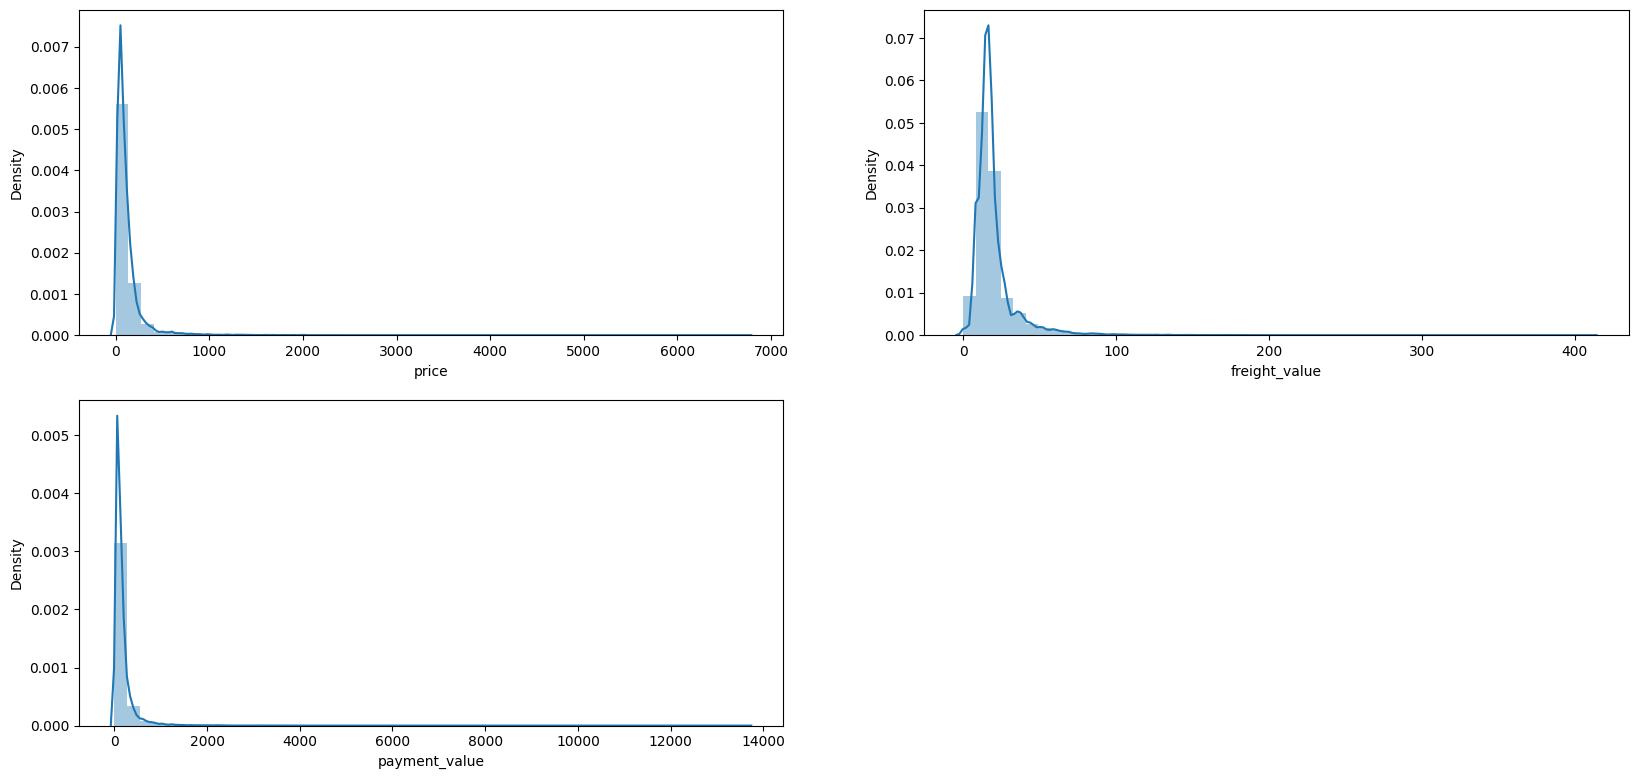

In [24]:
# Plot histogram untuk fitur numerik
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.distplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

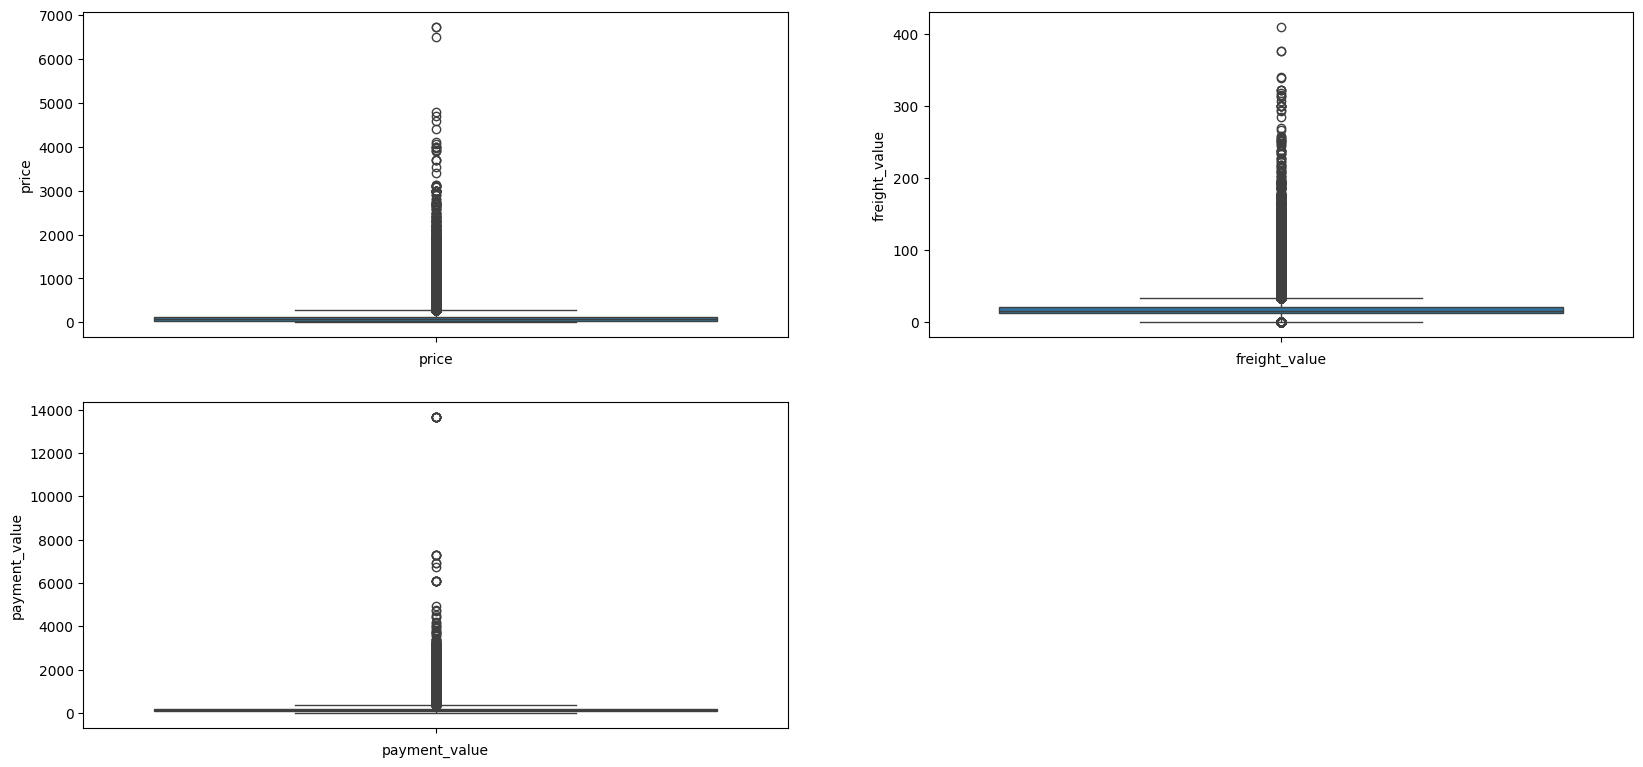

In [25]:
# Boxplot untuk mengecek outlier pada fitur numerikal
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

Berdasarkan histogram dan boxplot diatas, terlihat untuk kolom `price`, `freight_value`, dan `payment_value` memiliki outlier. Akan dilakukan pengecekan lebih mendalam untuk kolom `payment_value` karena kolom ini merupakan penjumlahan dari kolom `price`, `freight_value` dan juga faktor-faktor lain yang dapat mempengaruhi pembayaran akhir oleh pelanggan seperti biaya admin atau diskon.

In [26]:
# Function cek outlier
def checkOutlier(data, columns):
    Q1 = data[columns].quantile(.25)
    Q3 = data[columns].quantile(.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)

    extreme_Q1 = data[columns].quantile(.10)
    extreme_Q3 = data[columns].quantile(.90)
    extreme_IQR = extreme_Q3 - extreme_Q1
    extreme_lower = extreme_Q1 - (1.5 * extreme_IQR)
    extreme_upper = extreme_Q3 + (1.5 * extreme_IQR)

    print('Q1 : ', Q1)
    print('Q3 : ', Q3)
    print('IQR : ', IQR)
    print('Upper :', upper)
    print('Lower :', lower)

    print('Extreme Q1 : ', extreme_Q1)
    print('Extreme Q3 : ', extreme_Q3)
    print('Extreme IQR : ', extreme_IQR)
    print('Extreme upper :', extreme_upper)
    print('Extreme lower :', extreme_lower)

    return upper, extreme_upper

In [27]:
upper_payment_value, extreme_upper_payment_value = checkOutlier(df, 'payment_value')

Q1 :  60.85
Q3 :  188.94
IQR :  128.09
Upper : 381.075
Lower : -131.285
Extreme Q1 :  36.49
Extreme Q3 :  336.28900000000004
Extreme IQR :  299.79900000000004
Extreme upper : 785.9875000000002
Extreme lower : -413.2085000000001


In [28]:
# Persentase data yang masuk kategori upper outlier
len(df[(df['payment_value'] > upper_payment_value)]) / len(df) * 100

8.021353179502338

In [29]:
# Persentase data yang masuk kategori extreme upper outlier
len(df[(df['payment_value'] > extreme_upper_payment_value)]) / len(df) * 100

2.3665860995670243

In [30]:
# Hilangkan extreme outlier
df = df[(df['payment_value'] < extreme_upper_payment_value)]

Berdasarkan penganganan diatas, nilai *outlier* yang sangat tinggi sudah hilang.
Dipilih menggunakan nilai *extreme_upper_payment_value* karena data yang akan hilang termasuk kecil yaitu dibawah 3%.

In [31]:
# Save df
df.to_csv('fp1.csv', index=False)

In [517]:
df.to_excel('fp1.xlsx')

## **Exploratory Data Analysis**

Dengan melakukan *Exploratory Data Analysis* bisa mengetahui karakteristik dari data yang ada, sehingga bisa melihat pola untuk memperoleh wawasan atau analisis yang berguna dalam mengambil keputusan.

> *Montly Revenue*

In [34]:
# Menghitung revenue per bulannya
df_monthly_revenue = df.groupby(['month_year'])['payment_value'].sum().reset_index()
df_monthly_revenue

month_year  payment_value
0     2016-10       57415.70
1     2016-12          19.62
2     2017-01      145790.56
3     2017-02      269387.25
4     2017-03      435831.14
5     2017-04      361485.70
6     2017-05      554977.96
7     2017-06      476577.55
8     2017-07      632579.68
9     2017-08      671437.88
10    2017-09      693305.36
11    2017-10      768021.98
12    2017-11     1222679.11
13    2017-12      930203.27
14    2018-01     1147427.71
15    2018-02     1083309.35
16    2018-03     1209423.29
17    2018-04     1145183.06
18    2018-05     1184567.11
19    2018-06     1053659.51
20    2018-07     1008571.87
21    2018-08     1028027.85

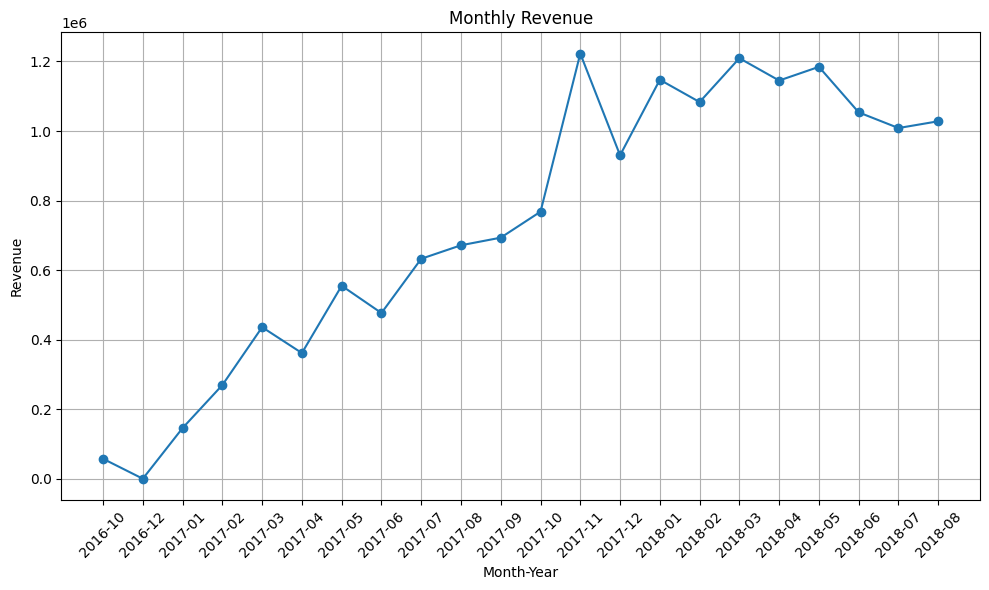

In [35]:
# Membuat line plot
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_revenue['month_year'], df_monthly_revenue['payment_value'], marker='o', linestyle='-')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

Dari Oktober 2016 hingga sekitar April 2017, terjadi peningkatan revenue yang signifikan. Ini menunjukkan pertumbuhan yang konsisten selama periode ini. Setelah April 2017, revenue mengalami beberapa fluktuasi, dengan puncak signifikan terjadi pada November 2017. Ada penurunan setelah puncak ini, tetapi revenue tetap relatif tinggi dibandingkan periode sebelumnya. Mulai dari awal 2018 hingga Agustus 2018, revenue cenderung stabil dengan beberapa fluktuasi kecil. Tidak ada peningkatan atau penurunan signifikan yang terlihat selama periode ini.

Sebenarnya hal ini sejalan dengan apa yang terjadi dengan perekonomian Brazil pada tahun 2016-2018 yang diwarnai pemulihan ekonomi Brazil yang lambat namun stabil setelah resesi parah di tahun 2015 dan 2016.

Pada tahun 2016 Brazil mengalami resesi terburuk dalam sejarahnya namun pada tahun 2017 ekonomi Brazil mulai pulih dengan kepercayaan konsumen dan investasi mulai meningkat. Sementara pada tahun 2018 perekonomian kembali melambat.

Sumber:
- https://repositorio.cepal.org/server/api/core/bitstreams/805d1592-a925-4b4f-8af8-1c5484042ae5/content
- https://tradingeconomics.com/brazil/gdp-growth
- https://en.wikipedia.org/wiki/Economy_of_Brazil
- https://www.bcb.gov.br/en

> *Monthly Revenue Growth Rate*

In [36]:
# Menghitung pertumbuhan revenue per bulannya
df_monthly_revenue['MonthlyGrowth'] = df_monthly_revenue['payment_value'].pct_change()
df_monthly_revenue

month_year  payment_value  MonthlyGrowth
0     2016-10       57415.70            NaN
1     2016-12          19.62      -0.999658
2     2017-01      145790.56    7429.711519
3     2017-02      269387.25       0.847769
4     2017-03      435831.14       0.617861
5     2017-04      361485.70      -0.170583
6     2017-05      554977.96       0.535269
7     2017-06      476577.55      -0.141268
8     2017-07      632579.68       0.327338
9     2017-08      671437.88       0.061428
10    2017-09      693305.36       0.032568
11    2017-10      768021.98       0.107769
12    2017-11     1222679.11       0.591985
13    2017-12      930203.27      -0.239209
14    2018-01     1147427.71       0.233524
15    2018-02     1083309.35      -0.055880
16    2018-03     1209423.29       0.116415
17    2018-04     1145183.06      -0.053116
18    2018-05     1184567.11       0.034391
19    2018-06     1053659.51      -0.110511
20    2018-07     1008571.87      -0.042791
21    2018-08     1028027.85       0.019291

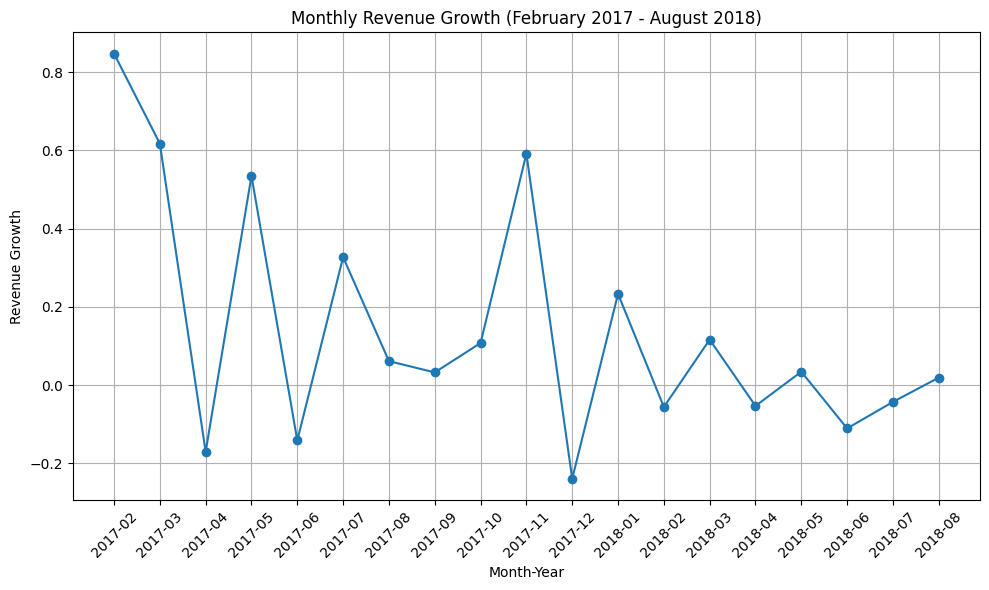

In [41]:
# Membuat line plot untuk Februari 2017 - Agustus 2018
df_filtered = df_monthly_revenue[3:]
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['month_year'], df_filtered['MonthlyGrowth'], marker='o', linestyle='-')
plt.xlabel('Month-Year')
plt.ylabel('Revenue Growth')
plt.title('Monthly Revenue Growth (February 2017 - August 2018)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

Pada Desember 2016 ke Januari 2017, terlihat lonjakan pertumbuhan *revenue* yang sangat tinggi, mencapai lebih dari 7000. Lonjakan ini jauh lebih besar dibandingkan bulan-bulan lainnya. Yang bisa dikatakan sebanding dengan apa yang terjadi pada perekonomian Brazil di tahun tersebut. Setelah lonjakan ini, pertumbuhan *revenue* langsung kembali ke nilai mendekati nol pada bulan berikutnya, Februari 2017 sampai hingga akhir periode. Hal ini bisa mengindikasikan tidak ada perubahan *revenue* yang signifikan bahkan cenderung hampir tidak ada perubahan atau perusahaan mencapai stabilitas di pasar, atau bisa juga menunjukkan kurangnya inisiatif atau perubahan signifikan setelah lonjakan awal tersebut.

> *Monthly Active Customers*

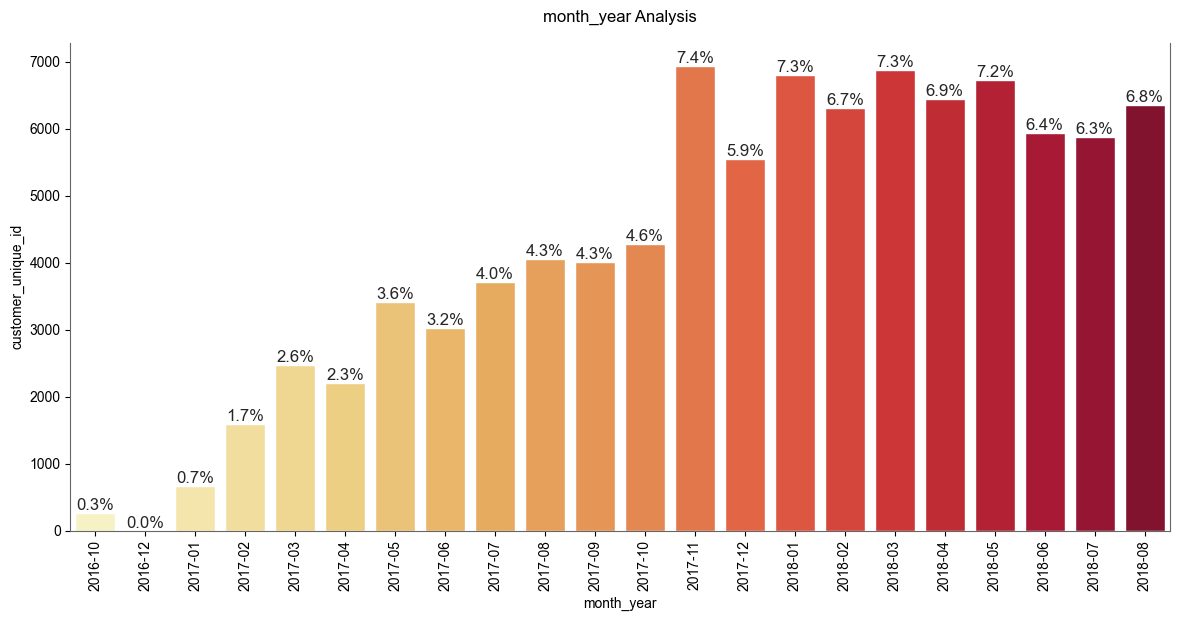

In [42]:
# Menghitung jumlah customer aktif per bulannya
df_monthly_user = df.groupby('month_year')['customer_unique_id'].nunique().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
barPlot(x='month_year', y='customer_unique_id', df=df_monthly_user)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [43]:
df_monthly_user

month_year  customer_unique_id
0     2016-10                 262
1     2016-12                   1
2     2017-01                 672
3     2017-02                1588
4     2017-03                2473
5     2017-04                2196
6     2017-05                3411
7     2017-06                3026
8     2017-07                3716
9     2017-08                4057
10    2017-09                4002
11    2017-10                4283
12    2017-11                6931
13    2017-12                5544
14    2018-01                6794
15    2018-02                6308
16    2018-03                6869
17    2018-04                6441
18    2018-05                6724
19    2018-06                5939
20    2018-07                5869
21    2018-08                6351

Berdasarkan plot, terlihat Olist mengalami peningkatan pelanggan sepanjang tahun 2017 dan pada tahun 2018 dapat dikatakan memiliki jumlah pelanggan yang stabil.

> *Monthly Order Count*

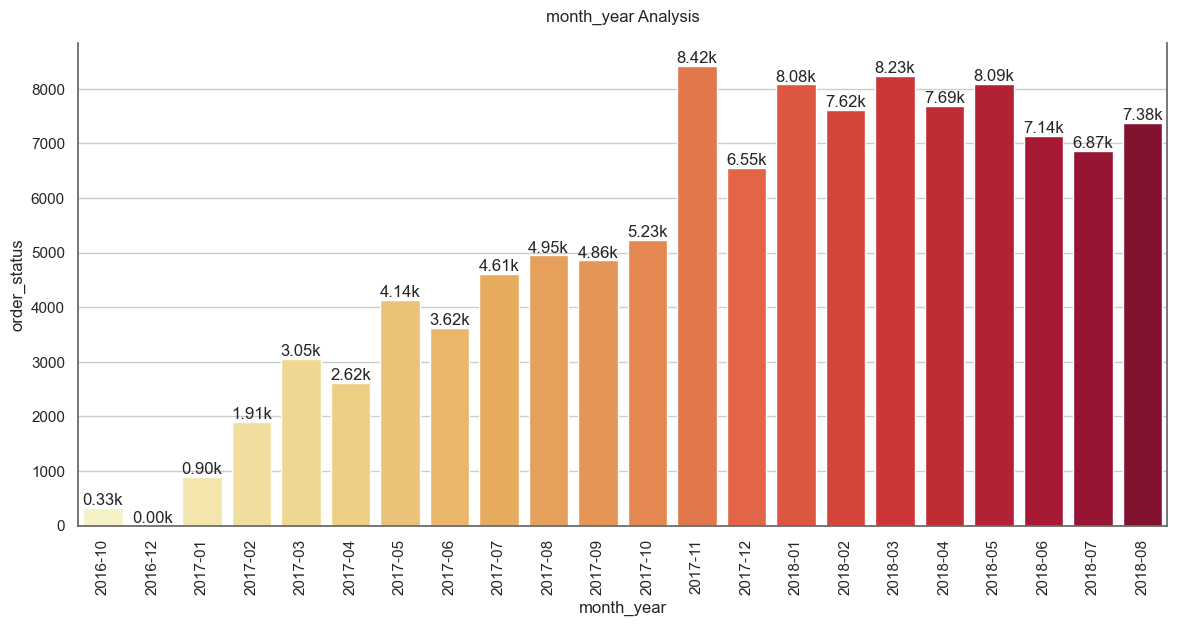

In [46]:
# Menghitung jumlah pesanan per bulannya
df_monthly_sales = df.groupby('month_year')['order_status'].count().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
barPlot(x='month_year', y='order_status', df=df_monthly_sales, value=True)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [47]:
df_monthly_sales

month_year  order_status
0     2016-10           331
1     2016-12             1
2     2017-01           901
3     2017-02          1908
4     2017-03          3050
5     2017-04          2615
6     2017-05          4139
7     2017-06          3617
8     2017-07          4611
9     2017-08          4952
10    2017-09          4860
11    2017-10          5232
12    2017-11          8424
13    2017-12          6547
14    2018-01          8081
15    2018-02          7620
16    2018-03          8233
17    2018-04          7692
18    2018-05          8089
19    2018-06          7143
20    2018-07          6870
21    2018-08          7380

Jumlah pemesanan di Olist memiliki pola yang sama dengan jumlah pelanggan Olist. Dimana mengalami peningkatan sepanjang tahun 2017 dan stabil pada 2018. Hal ini tentu wajar karena jumlah pemesanan memang memiliki keterkaitan yang erat dengan jumlah pelanggan.

> *Average Revenue per Customer Purchase*

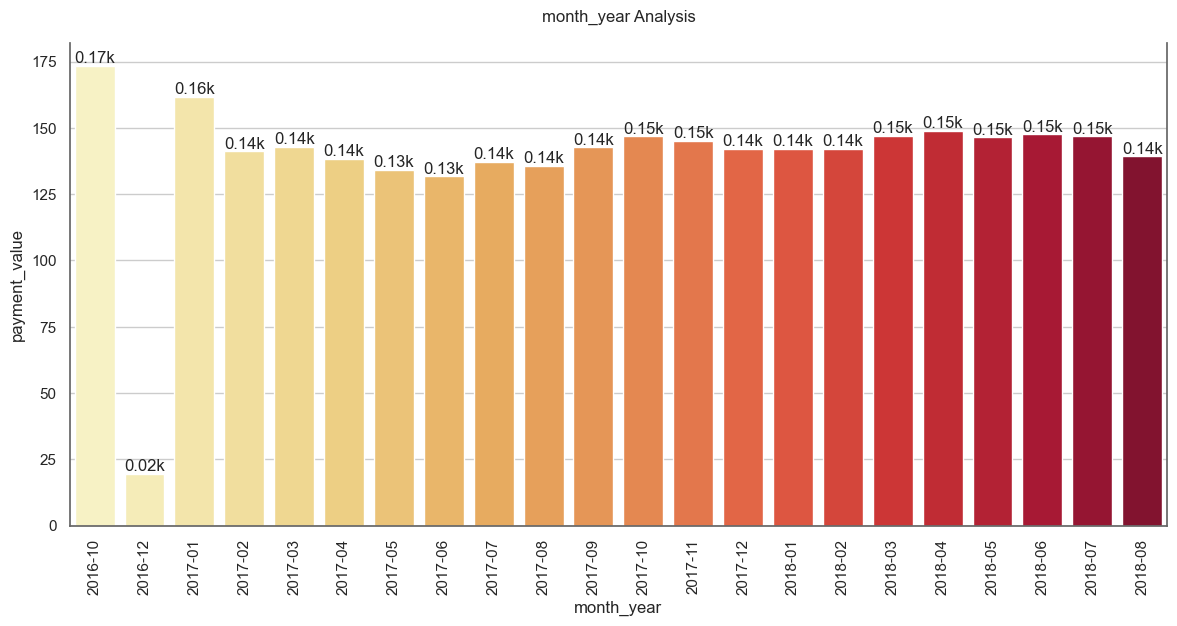

In [48]:
# Menghitung rata-rata revenue pesanan per bulan
df_monthly_order_avg = df.groupby('month_year')['payment_value'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
barPlot(x='month_year', y='payment_value', df=df_monthly_order_avg, value=True)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

Sepanjang tahun 2017-2018, dapat dikatakan rata-rata per bulan *revenue* per pesanan bekisar di 140 BRL.

> *New Customer Ratio*

In [49]:
# Menghitung ratio jumlah pelanggan baru
df_new_customer = df.groupby('customer_unique_id').order_purchase_timestamp.min().reset_index()
df_new_customer.columns = ['customer_unique_id','firstpurchase_date']
df_new_customer['firstpurchase_date'] = df_new_customer['firstpurchase_date'].map(lambda date: 100*date.year + date.month)

# Kolom baru digabungkan dengan dataframe merge
df = pd.merge(df, df_new_customer, on='customer_unique_id')

In [50]:
# Membuat kolom baru untuk tipe user ('New' dan 'Existing')
df['usertype'] = 'New' # Awalnya masih New untuk semua user
df.loc[df['month_y'] > df['firstpurchase_date'],'usertype'] = 'Existing' # Berubah jika sudah ada datanya sebelumnya

# Menghitung jumlah 'New' dan 'Existing' setiap bulannya
df_user_type_revenue = df.groupby(['month_y','usertype', 'month_year'])['payment_value'].sum().reset_index()

df_user_type_revenue

month_y  usertype month_year  payment_value
0    201610       New    2016-10       57415.70
1    201612       New    2016-12          19.62
2    201701  Existing    2017-01          19.62
3    201701       New    2017-01      145770.94
4    201701       New    2017-02        6982.92
..      ...       ...        ...            ...
67   201807  Existing    2018-08         543.83
68   201807       New    2018-07      970207.68
69   201807       New    2018-08       29536.22
70   201808  Existing    2018-08       26834.53
71   201808       New    2018-08      971113.27

[72 rows x 4 columns]

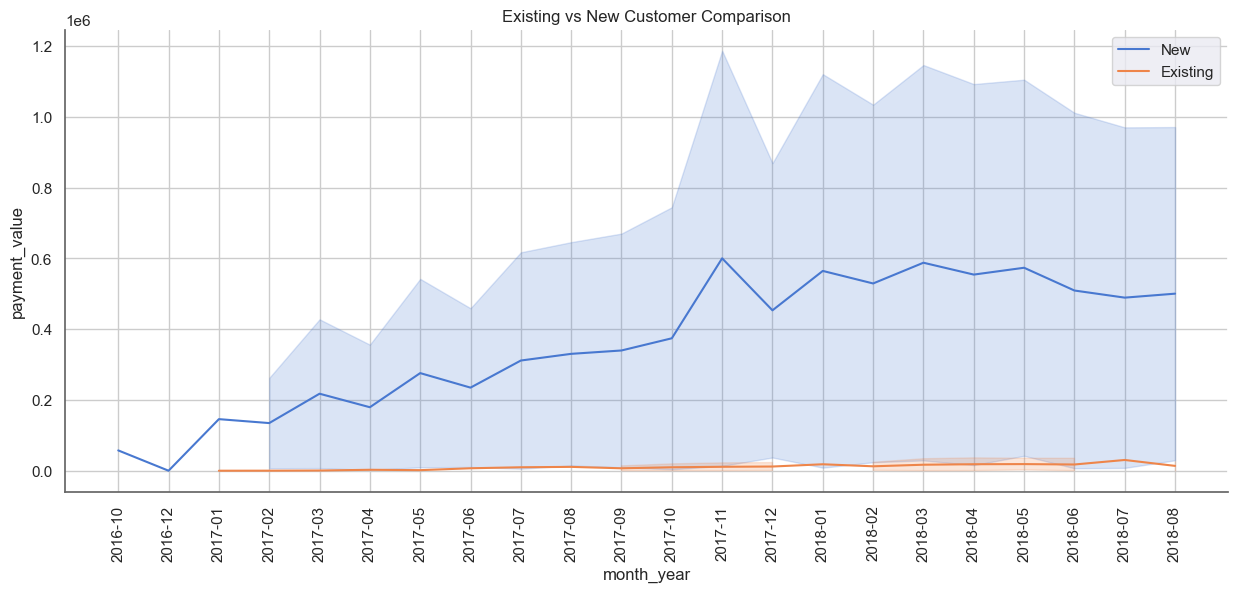

In [51]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.set(palette='muted', color_codes=True)
ax = sns.lineplot(x='month_year', y='payment_value', data=df_user_type_revenue.query("usertype == 'New'"), label='New')
ax = sns.lineplot(x='month_year', y='payment_value', data=df_user_type_revenue.query("usertype == 'Existing'"), label='Existing')
formatSpines(ax, right_border=False)
ax.set_title('Existing vs New Customer Comparison')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

- Nilai pembayaran untuk pelanggan baru menunjukkan tren kenaikan yang signifikan, dimulai dari sekitar 0 dan mencapai sekitar 0,6 juta pada pertengahan tahun 2018.
- Nilai pembayaran untuk pelanggan lama tetap relatif datar dan rendah selama periode tersebut, dengan sedikit fluktuasi tetapi secara umum tetap mendekati 0.
- Grafik tersebut menunjukkan bahwa pelanggan baru mengalami peningkatan substansial dalam nilai pembayaran dari waktu ke waktu, sementara nilai pembayaran dari pelanggan lama tetap minimal dan stabil. Hal ini menunjukkan bahwa pelanggan baru memberikan kontribusi yang jauh lebih besar terhadap nilai pembayaran keseluruhan daripada pelanggan lama selama periode ini.

> *New Customer Ratio*

In [52]:
# Buat dataframe untuk ratio pelanggan baru dibandingkan dengan pelanggan lama (dan drop baris pertama karena rationya pasti 0)
df_user_ratio = df.query("usertype == 'New'").groupby(['month_year'])['customer_unique_id'].nunique()/df.query("usertype == 'Existing'").groupby(['month_year'])['customer_unique_id'].nunique() 
df_user_ratio = df_user_ratio.reset_index()

# Drop nilai NaN di bulan pertama dan terakhir
df_user_ratio = df_user_ratio.dropna()
df_user_ratio.columns = ['month_year','NewCusRatio']

df_user_ratio

month_year  NewCusRatio
2     2017-01   671.000000
3     2017-02   793.000000
4     2017-03   493.600000
5     2017-04   128.176471
6     2017-05   125.333333
7     2017-06    76.589744
8     2017-07    76.416667
9     2017-08    74.129630
10    2017-09    50.987013
11    2017-10    48.813953
12    2017-11    58.758621
13    2017-12    46.801724
14    2018-01    52.496063
15    2018-02    56.880734
16    2018-03    48.782609
17    2018-04    40.554839
18    2018-05    34.209424
19    2018-06    31.994444
20    2018-07    40.330986
21    2018-08    36.376471

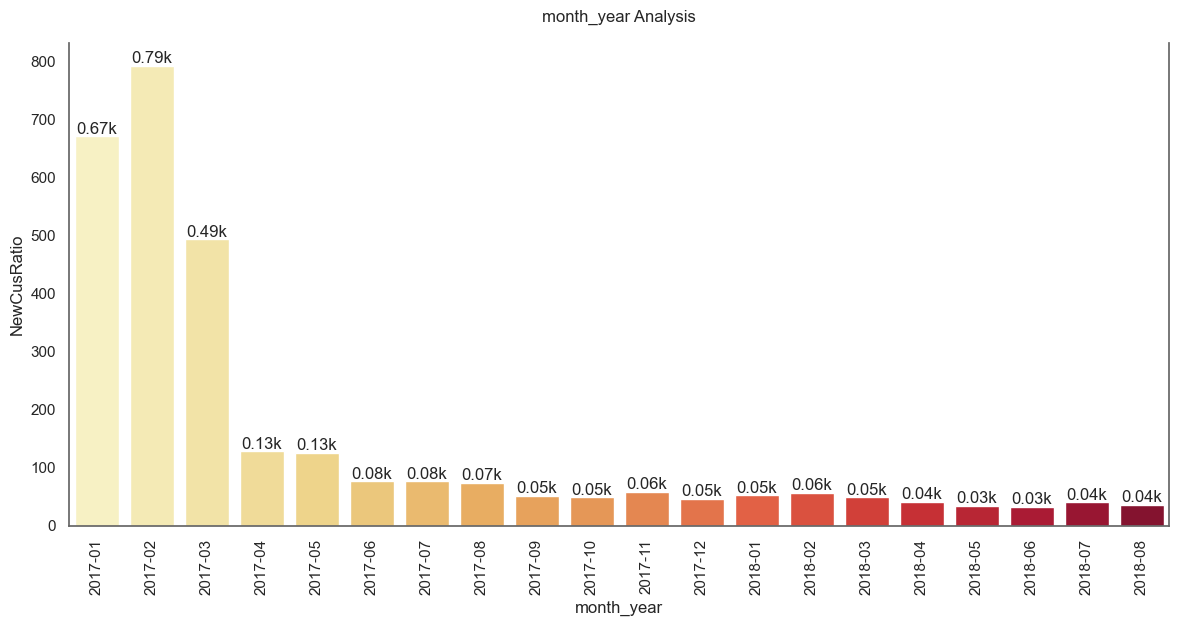

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
barPlot(x='month_year', y='NewCusRatio', df=df_user_ratio, value=True)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

Grafik diatas menggambarkan Rasio Pelanggan Baru yang tinggi pada bulan-bulan awal tahun 2017, yang kemudian menurun tajam dan stabil pada level yang lebih rendah selama sisa periode tersebut. Hal ini menunjukkan bahwa masuknya pelanggan baru secara signifikan lebih tinggi pada awal tahun 2017, diikuti oleh tingkat perolehan pelanggan baru yang konsisten tetapi jauh lebih rendah pada bulan-bulan berikutnya.

> Daily Order

In [54]:
# Menghitung jumlah order per hari
df_daily_order = df.groupby(['order_approved_day', 'order_approved_day_name'])['order_id'].nunique().reset_index()
df_daily_order

order_approved_day order_approved_day_name  order_id
0                   0                     Mon     12382
1                   1                     Tue     18322
2                   2                     Wed     15053
3                   3                     Thu     14760
4                   4                     Fri     13972
5                   5                     Sat     11602
6                   6                     Sun      8626

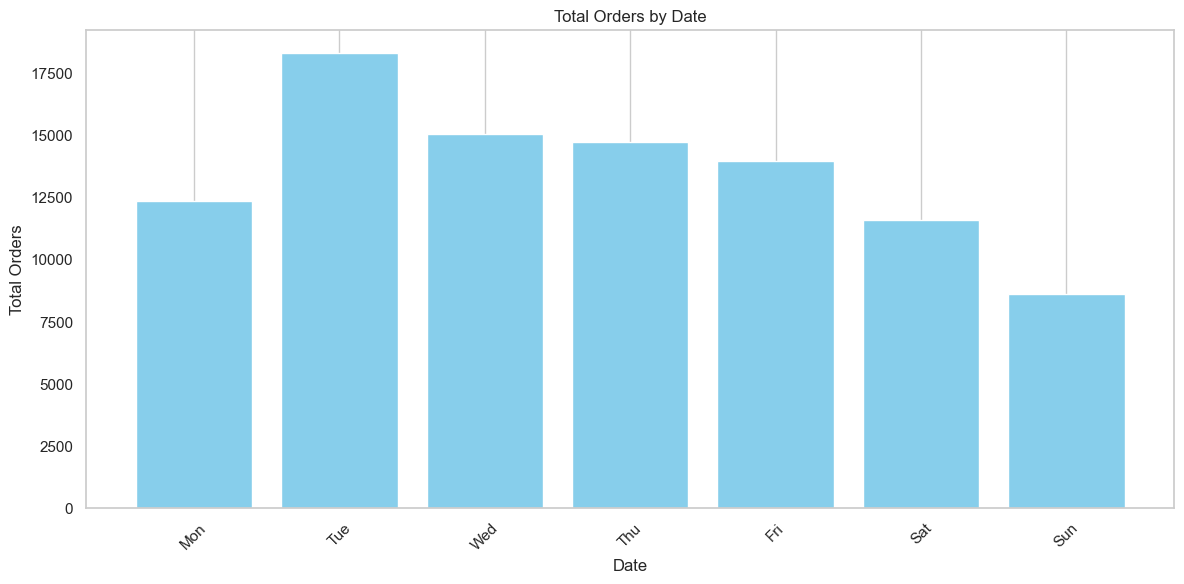

In [55]:
plt.figure(figsize=(12, 6))
plt.bar(df_daily_order['order_approved_day_name'], df_daily_order['order_id'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('Total Orders')
plt.title('Total Orders by Date')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Berdasarkan barplot diatas, Jumlah order pada hari *weekday* lebih banyak dibandingkan *weekened* dengan puncak order di hari selasa dan paling sedikit di hari minggu.

> *Payment Type*

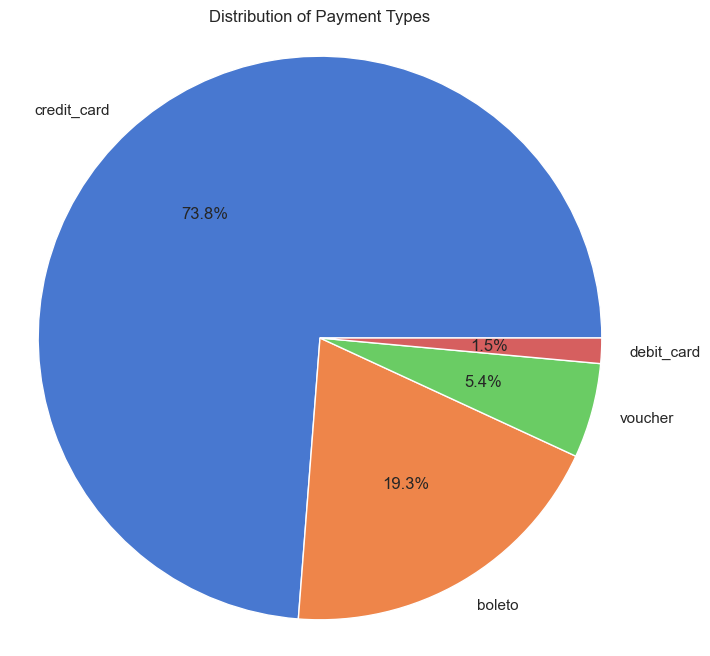

In [62]:
payment_counts = df['payment_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Payment Types')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

Metode pembayaran didominasi oleh credit_card dimana hampir 75% dari pelanggan menggunakannya.

> *Payment Installments*

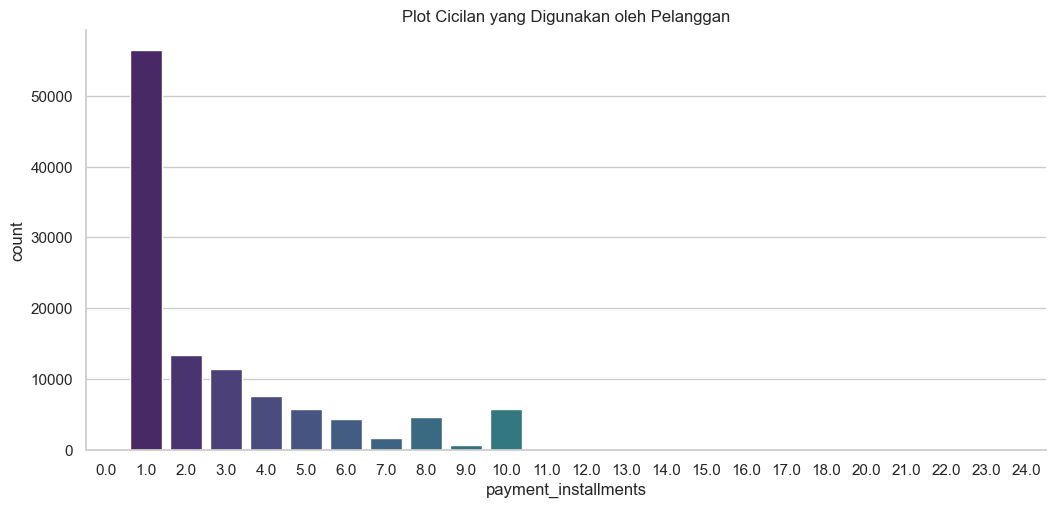

In [82]:
# Menghitung Frekuensi Cicilan
payment_installments = df['payment_installments'].value_counts().reset_index()
payment_installments.columns = ['payment_installments', 'count']
payment_installments = payment_installments.sort_values('payment_installments')

# Memplot Data dengan Bar Plot
plt.figure(figsize=(12, 6))  # Sesuaikan ukuran figure untuk memberikan lebih banyak ruang
sns.barplot(data=payment_installments, x='payment_installments', y='count', palette='viridis')
plt.title('Plot Cicilan yang Digunakan oleh Pelanggan')

# Sesuaikan margin
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Despine untuk menghapus spines yang tidak diinginkan
sns.despine()

# Menampilkan plot
plt.show()

Pembayaran yang menggunakan credit_card paling banyak melakukan cicilan jangka pendek saja, dengan yang paling banyak dipilih yaitu cicilan 1 bulan.

> *Monthly Retention Rate*

*Retention rate* adalah ukuran persentase dari pelanggan atau pengguna suatu produk atau layanan yang memilih untuk tetap menggunakan produk atau layanan tersebut dalam periode waktu yang telah ditentukan.

In [63]:
# Monthly Retention Rate = Jumlah Pelanggan yang Tetap dari Bulan Sebelumnya / Total Pelanggan Aktif

# Mengidentifikasi pengguna aktif dengan melihat pendapatannya per bulan.
df_user_purchase = df.groupby(['customer_unique_id','month_y'])['payment_value'].sum().reset_index()
df_user_purchase.head()

customer_unique_id  month_y  payment_value
0  0000366f3b9a7992bf8c76cfdf3221e2   201805         141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f   201805          27.19
2  0000f46a3911fa3c0805444483337064   201703          86.22
3  0000f6ccb0745a6a4b88665a16c9f078   201710          43.62
4  0004aac84e0df4da2b147fca70cf8255   201711         196.89

In [64]:
# Membuat tabel silang (crosstab) untuk matriks retensi
df_retention = pd.crosstab(df_user_purchase['customer_unique_id'], df_user_purchase['month_y']).reset_index()
df_retention.head()

month_y                customer_unique_id  201610  201612  201701  201702  \
0        0000366f3b9a7992bf8c76cfdf3221e2       0       0       0       0   
1        0000b849f77a49e4a4ce2b2a4ca5be3f       0       0       0       0   
2        0000f46a3911fa3c0805444483337064       0       0       0       0   
3        0000f6ccb0745a6a4b88665a16c9f078       0       0       0       0   
4        0004aac84e0df4da2b147fca70cf8255       0       0       0       0   

month_y  201703  201704  201705  201706  201707  201708  201709  201710  \
0             0       0       0       0       0       0       0       0   
1             0       0       0       0       0       0       0       0   
2             1       0       0       0       0       0       0       0   
3             0       0       0       0       0       0       0       1   
4             0       0       0       0       0       0       0       0   

month_y  201711  201712  201801  201802  201803  201804  201805  201806  \
0             0       0       0       0       0       0       1       0   
1             0       0       0       0       0       0       1       0   
2             0       0       0       0       0       0       0       0   
3             0       0       0       0       0       0       0       0   
4             1       0       0       0       0       0       0       0   

month_y  201807  201808  
0             0       0  
1             0       0  
2             0       0  
3             0       0  
4             0       0

In [65]:
# Mengambil nama bulan dari kolom-kolom di dataframe df_retention
months = df_retention.columns[2:]

# Inisialisasi array kosong untuk menyimpan data retensi
retention_array = []

# Looping untuk mengisi retention_array dengan data retensi untuk setiap bulan
for i in range(len(months)-1):
    retention_data = {}
    
    # Memilih bulan yang dipilih dan bulan sebelumnya
    selected_month = months[i+1]
    prev_month = months[i]
    
    # Mengisi dictionary retention_data dengan informasi yang diinginkan
    retention_data['month_y'] = int(selected_month)
    retention_data['TotalUserCount'] = df_retention[selected_month].sum()
    
    # Menghitung jumlah pengguna yang tetap (retained) dari bulan sebelumnya
    retained_users = df_retention[(df_retention[selected_month] > 0) & (df_retention[prev_month] > 0)][selected_month].sum()
    retention_data['RetainedUserCount'] = retained_users
    
    # Menambahkan data retention_data ke dalam retention_array
    retention_array.append(retention_data)

# Membuat dataframe dari retention_array
df_retention = pd.DataFrame(retention_array)

# Menghitung retention rate
df_retention['RetentionRate'] = df_retention['RetainedUserCount'] / df_retention['TotalUserCount']

# Menampilkan dataframe df_retention yang berisi data retensi dan retention rate
df_retention

month_y  TotalUserCount  RetainedUserCount  RetentionRate
0    201701             704                  1       0.001420
1    201702            1591                  2       0.001257
2    201703            2462                  3       0.001219
3    201704            2222                 11       0.004950
4    201705            3409                 13       0.003813
5    201706            3019                 16       0.005300
6    201707            3759                 16       0.004256
7    201708            4032                 23       0.005704
8    201709            3981                 32       0.008038
9    201710            4320                 32       0.007407
10   201711            7069                 37       0.005234
11   201712            5387                 39       0.007240
12   201801            6866                 15       0.002185
13   201802            6328                 26       0.004109
14   201803            6795                 23       0.003385
15   201804            6595                 31       0.004701
16   201805            6537                 44       0.006731
17   201806            5940                 35       0.005892
18   201807            5976                 26       0.004351
19   201808            6205                 36       0.005802

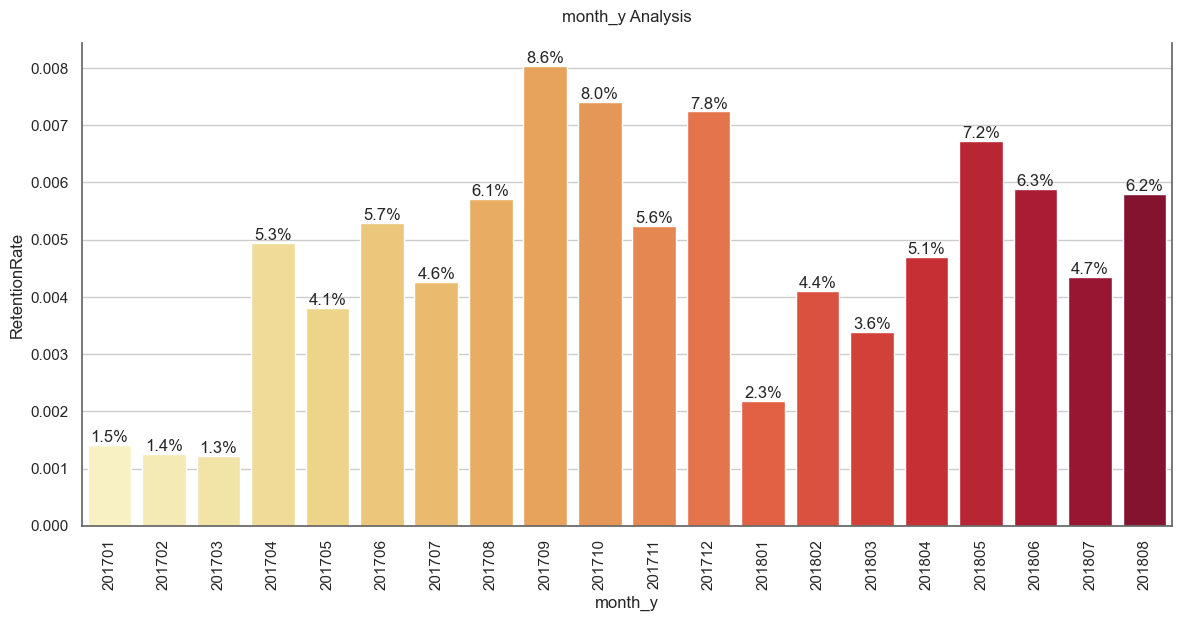

In [68]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
barPlot(x='month_y', y='RetentionRate', df=df_retention)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

Visualisasi diatas menunjukkan bahwa *retention rate* per bulannya sangatlah sedikit, tidak ada yang mencapai 10%. Hal ini menunjukkan bahwa Olist mengalami masalah dalam mempertahankan pelanggannya.

> *Cohort Based Retention Rate*

Cohort ditentukan berdasarkan bulan dan tahun pembelian pertama pelanggan. Dengan mengukur persentase pelanggan yang tetap setelah pembelian pertama pelanggan di setiap bulan akan membantu mengungkap bagaimana perbedaan tingkat retensi antara kohor yang baru dan yang lama, serta apakah perubahan baru-baru ini dalam pengalaman pelanggan mempengaruhi retensi pelanggan baru atau tidak.

In [83]:
data_retention = df[['customer_unique_id' ,'order_approved_at']].copy()

In [85]:
data_retention['cohort_month'] = data_retention.groupby('customer_unique_id')['order_approved_at'].transform('min').dt.to_period('M')

In [86]:
data_retention['current_month'] = data_retention['order_approved_at'].dt.to_period('M')

In [87]:
data_retention.head()

customer_unique_id   order_approved_at cohort_month  \
0  861eff4711a542e4b93843c6dd7febb0 2017-05-16 15:22:12      2017-05   
1  290c77bc529b7ac935b93aa66c333dc3 2018-01-12 20:58:32      2018-01   
2  060e732b5b29e8181a18229c7b0b2b5e 2018-05-20 16:19:10      2018-05   
3  259dac757896d24d7702b9acbbff3f3c 2018-03-13 17:29:19      2018-03   
4  345ecd01c38d18a9036ed96c73b8d066 2018-07-29 10:10:09      2018-07   

  current_month  
0       2017-05  
1       2018-01  
2       2018-05  
3       2018-03  
4       2018-07

In [88]:
# total distinct number 
df_cohort = data_retention.groupby(['cohort_month', 'current_month'], as_index=False)['customer_unique_id'].nunique().rename(columns={'customer_unique_id': 'n_customer'})
df_cohort.head()

cohort_month current_month  n_customer
0      2016-10       2016-10         262
1      2016-10       2017-04           1
2      2016-10       2017-07           1
3      2016-10       2017-09           1
4      2016-10       2017-11           1

In [89]:
from operator import attrgetter

In [90]:
# Period: selisih antara current month dengan cohort month
df_cohort['period']=(df_cohort['current_month']-df_cohort['cohort_month']).apply(attrgetter('n'))
df_cohort

cohort_month current_month  n_customer  period
0        2016-10       2016-10         262       0
1        2016-10       2017-04           1       6
2        2016-10       2017-07           1       9
3        2016-10       2017-09           1      11
4        2016-10       2017-11           1      13
..           ...           ...         ...     ...
213      2018-06       2018-07          23       1
214      2018-06       2018-08          16       2
215      2018-07       2018-07        5727       0
216      2018-07       2018-08          29       1
217      2018-08       2018-08        6183       0

[218 rows x 4 columns]

In [91]:
pivot_cohort = df_cohort.pivot_table(index='cohort_month', columns='period', values='n_customer')
pivot_cohort

period            0     1     2     3     4     5     6     7     8    9   \
cohort_month                                                                
2016-10        262.0   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN  1.0   
2016-12          1.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
2017-01        671.0   3.0   2.0   1.0   3.0   1.0   3.0   1.0   1.0  NaN   
2017-02       1585.0   3.0   4.0   3.0   7.0   2.0   4.0   3.0   1.0  3.0   
2017-03       2468.0  11.0   8.0   9.0   9.0   3.0   4.0   8.0   7.0  3.0   
2017-04       2179.0  13.0   5.0   3.0   5.0   5.0   7.0   6.0   7.0  4.0   
2017-05       3384.0  18.0  15.0  10.0   9.0  11.0  13.0   5.0   8.0  9.0   
2017-06       2986.0  15.0  11.0  13.0   8.0  11.0  11.0   7.0   4.0  6.0   
2017-07       3668.0  20.0  12.0   7.0  13.0   7.0  11.0   4.0   7.0  9.0   
2017-08       4003.0  28.0  16.0  11.0  15.0  21.0  10.0  11.0   5.0  7.0   
2017-09       3926.0  27.0  19.0  13.0  17.0  11.0   9.0   9.0  12.0  7.0   
2017-10       4198.0  30.0  13.0   4.0  10.0   8.0  11.0  16.0  12.0  8.0   
2017-11       6815.0  38.0  25.0  10.0  12.0  10.0   9.0  13.0   8.0  5.0   
2017-12       5428.0  11.0  15.0  17.0  13.0  11.0   9.0   1.0  10.0  NaN   
2018-01       6667.0  23.0  25.0  20.0  21.0  11.0  12.0  15.0   NaN  NaN   
2018-02       6199.0  20.0  24.0  17.0  16.0  11.0  14.0   NaN   NaN  NaN   
2018-03       6732.0  27.0  23.0  20.0   8.0   9.0   NaN   NaN   NaN  NaN   
2018-04       6286.0  39.0  17.0  16.0   9.0   NaN   NaN   NaN   NaN  NaN   
2018-05       6533.0  34.0  16.0  13.0   NaN   NaN   NaN   NaN   NaN  NaN   
2018-06       5758.0  23.0  16.0   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
2018-07       5727.0  29.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
2018-08       6183.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   

period          10    11   12   13   14   15   16   17   19   20  
cohort_month                                                      
2016-10        NaN   1.0  NaN  1.0  NaN  1.0  NaN  1.0  2.0  2.0  
2016-12        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-01        2.0   2.0  5.0  3.0  1.0  1.0  2.0  3.0  1.0  NaN  
2017-02        2.0   5.0  2.0  3.0  2.0  1.0  1.0  3.0  NaN  NaN  
2017-03        8.0   3.0  5.0  3.0  4.0  6.0  2.0  3.0  NaN  NaN  
2017-04        5.0   2.0  1.0  1.0  2.0  2.0  3.0  NaN  NaN  NaN  
2017-05       10.0  11.0  6.0  2.0  6.0  7.0  NaN  NaN  NaN  NaN  
2017-06        9.0  12.0  5.0  5.0  7.0  NaN  NaN  NaN  NaN  NaN  
2017-07        8.0  11.0  4.0  9.0  NaN  NaN  NaN  NaN  NaN  NaN  
2017-08       10.0   7.0  6.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-09       10.0   3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-10        9.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-11        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-12        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-01        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-02        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-03        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-04        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-05        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-06        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-07        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-08        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [92]:
# Menghitung retention rate dengan cara membagi setiap nilai dalam baris cohort dengan nilai pada kolom pertama (yang mewakili jumlah pengguna pada bulan pertama mereka mendaftar)
pivot_cohort = pivot_cohort.divide(pivot_cohort[0], axis=0)

In [93]:
pivot_cohort

period         0         1         2         3         4         5         6   \
cohort_month                                                                    
2016-10       1.0       NaN       NaN       NaN       NaN       NaN  0.003817   
2016-12       1.0  1.000000       NaN       NaN       NaN       NaN       NaN   
2017-01       1.0  0.004471  0.002981  0.001490  0.004471  0.001490  0.004471   
2017-02       1.0  0.001893  0.002524  0.001893  0.004416  0.001262  0.002524   
2017-03       1.0  0.004457  0.003241  0.003647  0.003647  0.001216  0.001621   
2017-04       1.0  0.005966  0.002295  0.001377  0.002295  0.002295  0.003212   
2017-05       1.0  0.005319  0.004433  0.002955  0.002660  0.003251  0.003842   
2017-06       1.0  0.005023  0.003684  0.004354  0.002679  0.003684  0.003684   
2017-07       1.0  0.005453  0.003272  0.001908  0.003544  0.001908  0.002999   
2017-08       1.0  0.006995  0.003997  0.002748  0.003747  0.005246  0.002498   
2017-09       1.0  0.006877  0.004840  0.003311  0.004330  0.002802  0.002292   
2017-10       1.0  0.007146  0.003097  0.000953  0.002382  0.001906  0.002620   
2017-11       1.0  0.005576  0.003668  0.001467  0.001761  0.001467  0.001321   
2017-12       1.0  0.002027  0.002763  0.003132  0.002395  0.002027  0.001658   
2018-01       1.0  0.003450  0.003750  0.003000  0.003150  0.001650  0.001800   
2018-02       1.0  0.003226  0.003872  0.002742  0.002581  0.001774  0.002258   
2018-03       1.0  0.004011  0.003417  0.002971  0.001188  0.001337       NaN   
2018-04       1.0  0.006204  0.002704  0.002545  0.001432       NaN       NaN   
2018-05       1.0  0.005204  0.002449  0.001990       NaN       NaN       NaN   
2018-06       1.0  0.003994  0.002779       NaN       NaN       NaN       NaN   
2018-07       1.0  0.005064       NaN       NaN       NaN       NaN       NaN   
2018-08       1.0       NaN       NaN       NaN       NaN       NaN       NaN   

period              7         8         9         10        11        12  \
cohort_month                                                               
2016-10            NaN       NaN  0.003817       NaN  0.003817       NaN   
2016-12            NaN       NaN       NaN       NaN       NaN       NaN   
2017-01       0.001490  0.001490       NaN  0.002981  0.002981  0.007452   
2017-02       0.001893  0.000631  0.001893  0.001262  0.003155  0.001262   
2017-03       0.003241  0.002836  0.001216  0.003241  0.001216  0.002026   
2017-04       0.002754  0.003212  0.001836  0.002295  0.000918  0.000459   
2017-05       0.001478  0.002364  0.002660  0.002955  0.003251  0.001773   
2017-06       0.002344  0.001340  0.002009  0.003014  0.004019  0.001674   
2017-07       0.001091  0.001908  0.002454  0.002181  0.002999  0.001091   
2017-08       0.002748  0.001249  0.001749  0.002498  0.001749  0.001499   
2017-09       0.002292  0.003057  0.001783  0.002547  0.000764       NaN   
2017-10       0.003811  0.002859  0.001906  0.002144       NaN       NaN   
2017-11       0.001908  0.001174  0.000734       NaN       NaN       NaN   
2017-12       0.000184  0.001842       NaN       NaN       NaN       NaN   
2018-01       0.002250       NaN       NaN       NaN       NaN       NaN   
2018-02            NaN       NaN       NaN       NaN       NaN       NaN   
2018-03            NaN       NaN       NaN       NaN       NaN       NaN   
2018-04            NaN       NaN       NaN       NaN       NaN       NaN   
2018-05            NaN       NaN       NaN       NaN       NaN       NaN   
2018-06            NaN       NaN       NaN       NaN       NaN       NaN   
2018-07            NaN       NaN       NaN       NaN       NaN       NaN   
2018-08            NaN       NaN       NaN       NaN       NaN       NaN   

period              13        14        15        16        17        19  \
cohort_month                                                               
2016-10       0.003817       NaN  0.003817       NaN  0.003817  0.007634   
20

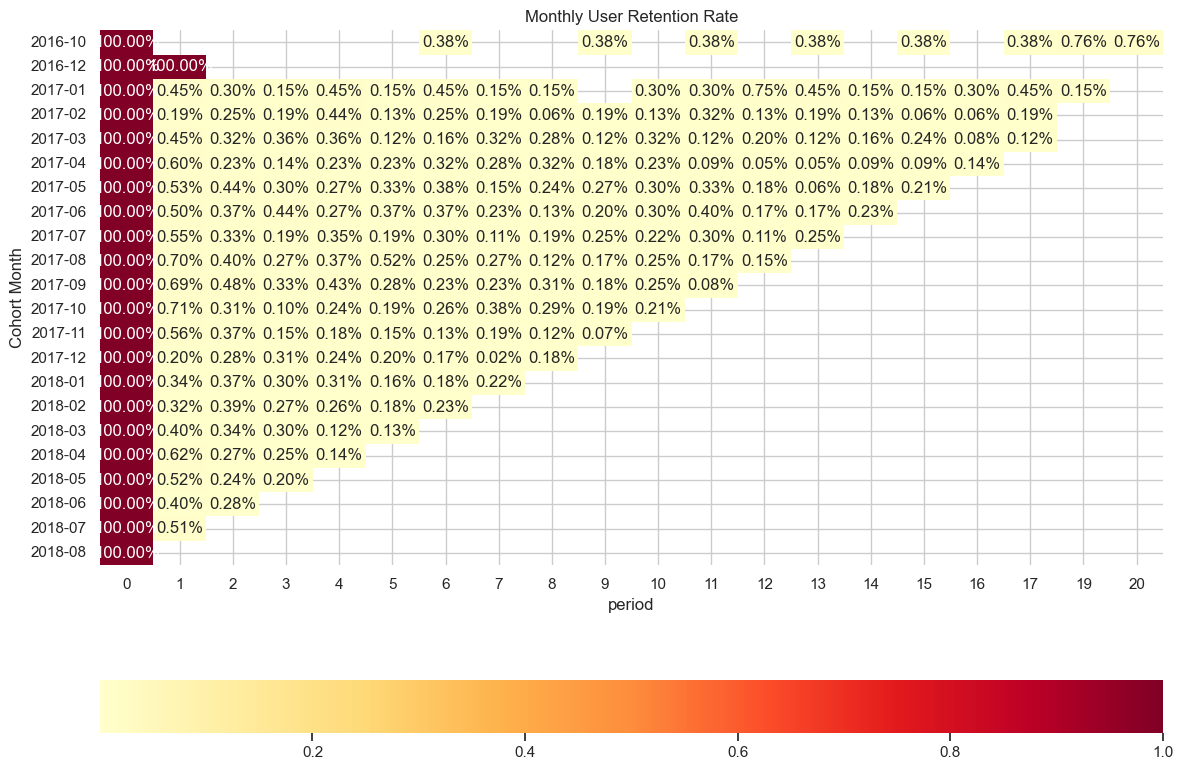

In [94]:
# Plot retention rate dengan cohort
plt.figure(figsize=(12,8))
sns.heatmap(pivot_cohort,
            annot=True,
            fmt='.2%',
            cmap='YlOrRd',
            cbar_kws={'orientation':'horizontal'})
plt.tight_layout()
plt.xlabel('period')
plt.ylabel('Cohort Month')
plt.title('Monthly User Retention Rate')
plt.show()

Dari plot Cohort Analysis untuk Retention Rate di atas, terlihat bahwa seiring berjalannya waktu, tingkat retensi pelanggan mengalami penurunan signifikan. Hal ini menunjukkan terdapat tantangan bagi bisnis *e-commerce* dalam mempertahankan pelanggannya. Berdasarkan plot diatas, semuanya turun hingga dibawah 1%.

## **Customer Segmention with RFM Analysis**

Pelanggan yang berbelanja di Olist memiliki kebutuhan dan profil yang berbeda-beda. Oleh karena itu, kita perlu menyesuaikan tindakan kita sesuai dengan kebutuhan mereka. Untuk menganalisis perilaku pelanggan kita akan melakukan analisis RFM. RFM adalah singkatan dari *Recency*, *Frequency*, dan *Monetary Value* (keaktifan terakhir membeli, banyaknya pembelian, dan nilai transaksi). 

* *Recency* : Seberapa baru pelanggan melakukan transaksi terakhir. Semakin baru transaksi terakhir, semakin tinggi skor *Recency*.
* *Frequency* : Seberapa sering pelanggan melakukan transaksi dalam periode tertentu. Pelanggan yang sering bertransaksi akan memiliki skor *Frequency* yang lebih tinggi
* *Monetary* : Seberapa banyak uang yang dihabiskan pelanggan selama periode tertentu. Pelanggan yang menghabiskan lebih banyak uang akan memiliki skor *Monetary* yang lebih tinggi.

Ini membantu perusahaan dalam merancang strategi pemasaran yang lebih efektif dan personalisasi, seperti menentukan target promosi, program loyalitas, atau penawaran khusus untuk pelanggan tertentu. Dengan mengidentifikasi segmen-segmen ini, perusahaan dapat mengarahkan sumber daya mereka dengan lebih efisien dan meningkatkan retensi serta kepuasan pelanggan.

**Skor pelanggan:**

Berkisar antara nilai 1 sampai 5, semakin tinggi nilainya, semakin baik. Dengan pembagian sebagai berikut:
- Semakin baru pemesanan yang dilakukan oleh pelanggan, maka nilai skor *Recency* (R) semakin tinggi. The more recent the customer's purchase the higher the Recency (R) score.
- Semakin banyak pemesanan yang dilakukan pelanggan, maka nilai skor *Frequency* (F) semakin tinggi.
- Semakin banyak pelanggan membelanjakan uangnya, maka semakin tinggi nilai skor *Monetary* (M).



Referensi :
- https://www.actioniq.com/blog/what-is-rfm-analysis/
- https://medium.com/@ilaydakursun/customer-segmentation-with-rfm-analysis-learn-more-about-your-customers-f12b348acbd

> ### *Recency*

Untuk menghitung *recency*, berarti perlu mencari tahu data pemesanan terakhir dari setiap pelanggan dan menghitung sudah berapa lama tidak aktif. Untuk analisis ini, diasumsikan tanggal paling terakhir/terbaru adalah tanggal paling terakhir yang ada di dalam dataset.

In [370]:
# Pembuatan dataframe baru untuk analisis RFM
# Penambahan kolom `customer_unique_id`
df_user = pd.DataFrame(df['customer_unique_id'])
df_user.columns = ['customer_unique_id']

# Mencari tanggal pembelian terakhir untuk setiap pelanggan
df_recent_purchase = df.groupby('customer_unique_id').order_approved_at.max().reset_index()
df_recent_purchase.columns = ['customer_unique_id', 'RecentPurchaseDate']

# Membuat kolom `Recency` berisi berapa hari pelanggan tidak aktif melakukan pesanan
df_recent_purchase['Recency'] = (df_recent_purchase['RecentPurchaseDate'].max() - df_recent_purchase['RecentPurchaseDate']).dt.days

# Menambahkan data `Recency` ke dataframe baru
df_user = pd.merge(df_user, df_recent_purchase[['customer_unique_id','Recency']], on='customer_unique_id')
df_user.head()

customer_unique_id  Recency
0  861eff4711a542e4b93843c6dd7febb0      469
1  290c77bc529b7ac935b93aa66c333dc3      228
2  060e732b5b29e8181a18229c7b0b2b5e      100
3  259dac757896d24d7702b9acbbff3f3c      168
4  345ecd01c38d18a9036ed96c73b8d066       31

In [371]:
# Deskripsi statistik kolom `Recency`
df_user.Recency.describe()

count    112296.000000
mean        236.955635
std         152.625274
min           0.000000
25%         113.000000
50%         218.000000
75%         345.000000
max         694.000000
Name: Recency, dtype: float64

Pelanggan menunjukkan variasi yang signifikan dalam perilaku *recency*. Sebagian besar pelanggan kembali atau berinteraksi dalam rentang waktu antara 113 hingga 345 hari, dengan rata-rata sekitar 237 hari.

> ### *Frequency*

Menghitung jumlah total pesanan untuk setiap pelanggan.

In [372]:
# Menghitung jumlah total pesanan tiap pelanggan
df_frequency = df.groupby('customer_unique_id').order_approved_at.count().reset_index()
df_frequency.columns = ['customer_unique_id','Frequency']

# Menambahkan data `Frequency` pada dataframe
df_user = pd.merge(df_user, df_frequency, on='customer_unique_id')

In [373]:
# Deskripsi statistik kolom `Frequency`
df_user.Frequency.describe()

count    112296.000000
mean          1.733383
std           2.709040
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          75.000000
Name: Frequency, dtype: float64

In [374]:
# Menghitung jumlah pelanggan yang melakukan pemesanan lebih dari 1 kali
print(df_user[df_user['Frequency'] > 1].shape[0] / df_user.shape[0])

0.30527356272707845


Sebagian besar pelanggan melakukan sedikit pembelian, dengan mayoritas (75%) melakukan 1 hingga 2 pembelian. (Sekitar 31% yan melakukan pembelian lebih dari 1 kali). Namun, terdapat juga pelanggan yang sangat aktif hingga melakukan 75 kali pembelian. 

> ### *Revenue*

Menghitung *revenue* dari setiap pelanggan.

In [375]:
# Menghitung revenue setiap pelanggan
df_revenue = df.groupby('customer_unique_id').payment_value.sum().reset_index()

# Menggabungkan data revenue ke dataframe baru
df_user = pd.merge(df_user, df_revenue, on='customer_unique_id')

In [376]:
# Deskripsi statistik kolom `Revenue`
df_user.payment_value.describe()

count    112296.000000
mean        258.664609
std         460.378964
min           9.590000
25%          69.030000
50%         129.320000
75%         256.720000
max       11745.000000
Name: payment_value, dtype: float64

Nilai transaksi bervariasi secara signifikan di antara pelanggan, dengan nilai rata-rata sekitar 259 BRL. Sebagian besar transaksi (75%) bernilai di bawah 257 BRL, namun terdapat transaksi yang sangat tinggi hingga 11,745 BRL. Hal ini menunjukkan bahwa meskipun banyak transaksi bernilai kecil hingga sedang, ada segmen pelanggan yang melakukan pembelian dengan nilai sangat tinggi, yang dapat menjadi fokus untuk strategi pemasaran dan penjualan yang lebih spesifik.

In [377]:
# Tabel RFM
df_user.head()

customer_unique_id  Recency  Frequency  payment_value
0  861eff4711a542e4b93843c6dd7febb0      469          1         146.87
1  290c77bc529b7ac935b93aa66c333dc3      228          1         335.48
2  060e732b5b29e8181a18229c7b0b2b5e      100          1         157.73
3  259dac757896d24d7702b9acbbff3f3c      168          1         173.30
4  345ecd01c38d18a9036ed96c73b8d066       31          1         252.25

Pengecekan distribusi tabel RFM

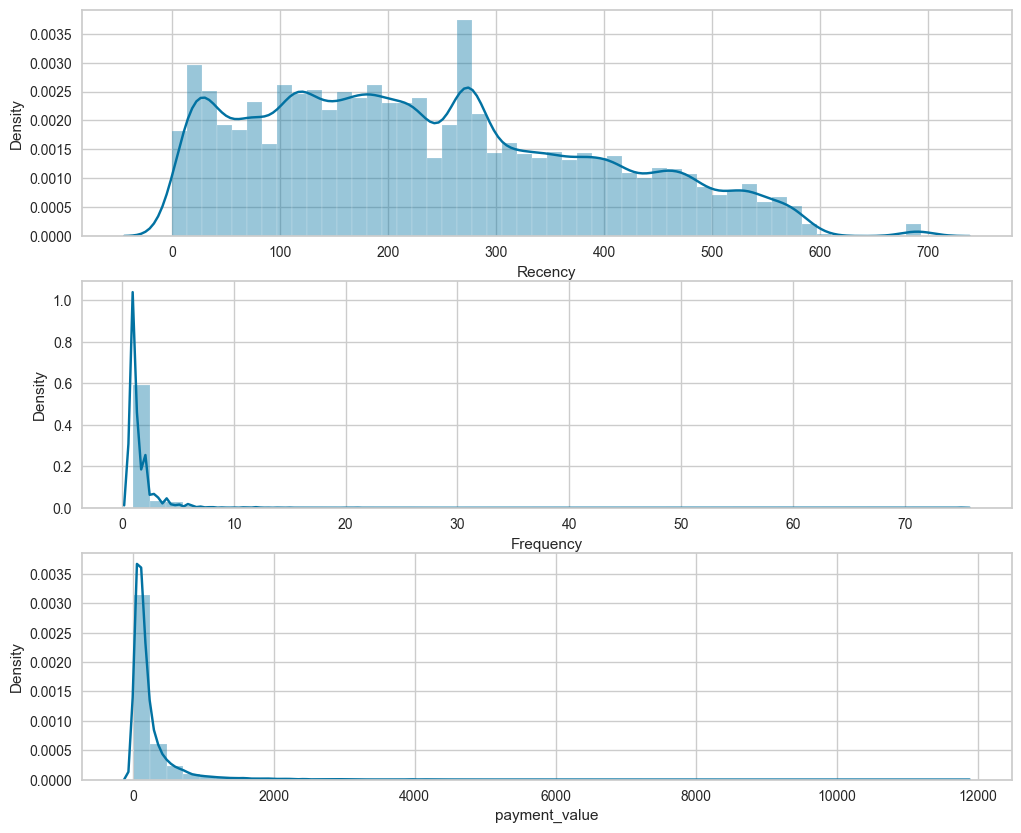

In [383]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(df_user['Recency'])
plt.subplot(3, 1, 2); sns.distplot(df_user['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(df_user['payment_value'])
plt.show()

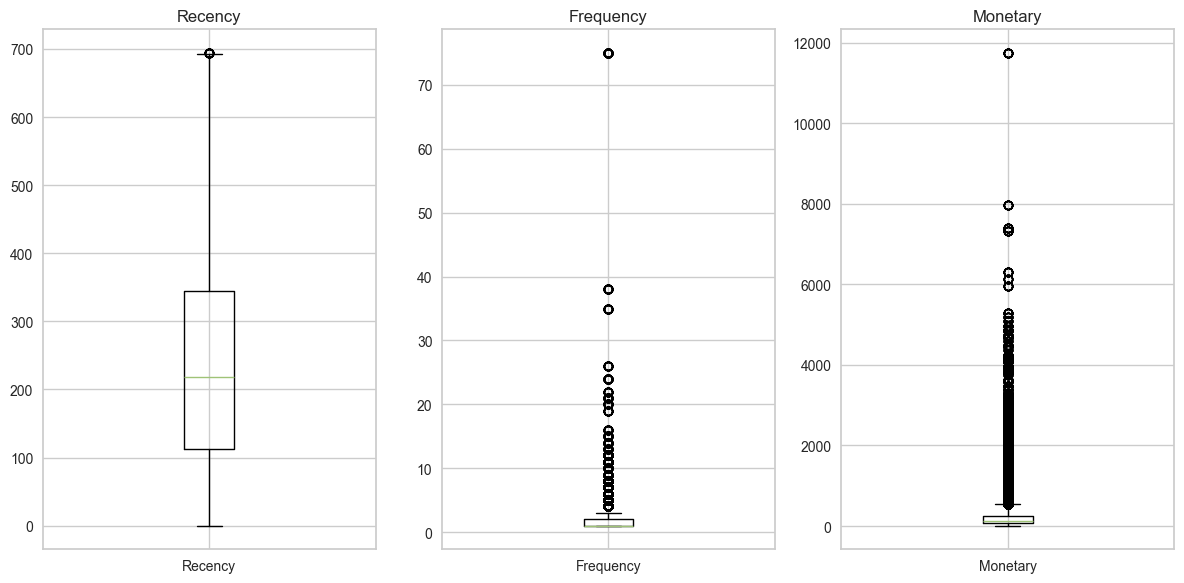

In [384]:
# Membuat boxplot untuk kolom Recency, Frequency, dan Monetary
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.boxplot(df_user['Recency'])
plt.title('Recency')
plt.xticks([1], ['Recency'])

plt.subplot(1, 3, 2)
plt.boxplot(df_user['Frequency'])
plt.title('Frequency')
plt.xticks([1], ['Frequency'])

plt.subplot(1, 3, 3)
plt.boxplot(df_user['payment_value'])
plt.title('Monetary')
plt.xticks([1], ['Monetary'])

plt.tight_layout()
plt.show()

- `Recency`: Sebagian besar pelanggan berinteraksi kembali dalam waktu kurang dari 400 hari, dengan penurunan interaksi yang stabil setelah itu.
- `Frequency`:  Distribusi *Frequency* sangat condong ke kiri (*positively skewed*) dengan sebagian besar pelanggan melakukan sedikit pembelian, dengan sebagian kecil melakukan banyak pembelian.
- `Monetary`: Distribusi *Monetary* juga sangat condong ke kiri (*positively skewed*) dengan sebagian besar transaksi bernilai rendah, dengan beberapa transaksi bernilai sangat tinggi.

Plot ini memberikan pandangan yang jelas tentang bagaimana distribusi dari masing-masing metrik RFM dimana tidak ada yang terdistribusi normal, serta menunjukkan adanya *outliers* yang signifikan dalam data. 

> *Handling Outliers*

*Outliers* dapat memiliki dampak signifikan pada *K-Means clustering*

In [385]:
# Function cek outlier
def checkOutlier_5(data, columns):
    Q1 = data[columns].quantile(.25)
    Q3 = data[columns].quantile(.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)

    extreme_Q1 = data[columns].quantile(.05)
    extreme_Q3 = data[columns].quantile(.95)
    extreme_IQR = extreme_Q3 - extreme_Q1
    extreme_lower = extreme_Q1 - (1.5 * extreme_IQR)
    extreme_upper = extreme_Q3 + (1.5 * extreme_IQR)

    print('Q1 : ', Q1)
    print('Q3 : ', Q3)
    print('IQR : ', IQR)
    print('Upper :', upper)
    print('Lower :', lower)

    print('Extreme Q1 : ', extreme_Q1)
    print('Extreme Q3 : ', extreme_Q3)
    print('Extreme IQR : ', extreme_IQR)
    print('Extreme upper :', extreme_upper)
    print('Extreme lower :', extreme_lower)

    return upper, extreme_upper

In [386]:
# Recency
upper_recency, extreme_upper_recency = checkOutlier_5(df_user, 'Recency')
print(len(df_user[(df_user['Recency'] > upper_recency)]) / len(df_user) * 100)
print(len(df_user[(df_user['Recency'] > extreme_upper_recency)]) / len(df_user) * 100)

Q1 :  113.0
Q3 :  345.0
IQR :  232.0
Upper : 693.0
Lower : -235.0
Extreme Q1 :  22.0
Extreme Q3 :  519.0
Extreme IQR :  497.0
Extreme upper : 1264.5
Extreme lower : -723.5
0.022262591721877893
0.0


In [387]:
# Frequency
upper_frequency, extreme_upper_frequency = checkOutlier_5(df_user, 'Frequency')
print(len(df_user[(df_user['Frequency'] > upper_frequency)]) / len(df_user) * 100)
print(len(df_user[(df_user['Frequency'] > extreme_upper_frequency)]) / len(df_user) * 100)

Q1 :  1.0
Q3 :  2.0
IQR :  1.0
Upper : 3.5
Lower : -0.5
Extreme Q1 :  1.0
Extreme Q3 :  4.0
Extreme IQR :  3.0
Extreme upper : 8.5
Extreme lower : -3.5
7.34932677922633
1.1567642658687753


In [388]:
# Monetary
upper_monetary, extreme_upper_monetary = checkOutlier_5(df_user, 'payment_value')
print(len(df_user[(df_user['payment_value'] > upper_monetary)]) / len(df_user) * 100)
print(len(df_user[(df_user['payment_value'] > extreme_upper_monetary)]) / len(df_user) * 100)

Q1 :  69.03
Q3 :  256.72
IQR :  187.69000000000003
Upper : 538.2550000000001
Lower : -212.50500000000002
Extreme Q1 :  34.0
Extreme Q3 :  871.04
Extreme IQR :  837.04
Extreme upper : 2126.6
Extreme lower : -1221.56
10.364572202037472
1.07750943933889


In [389]:
df_user.describe()

Recency      Frequency  payment_value   Recency_Rank
count  112296.000000  112296.000000  112296.000000  112296.000000
mean      236.955635       1.733383     258.664609     374.981282
std       152.625274       2.709040     460.378964     150.507116
min         0.000000       1.000000       9.590000       1.000000
25%       113.000000       1.000000      69.030000     268.000000
50%       218.000000       1.000000     129.320000     395.000000
75%       345.000000       2.000000     256.720000     496.000000
max       694.000000      75.000000   11745.000000     608.000000

In [390]:
# Hilangkan outlier
df_user = df_user[(df_user['Frequency'] < extreme_upper_frequency)]
df_user = df_user[(df_user['payment_value'] < extreme_upper_monetary)]

Cek hasil penghilangan outlier

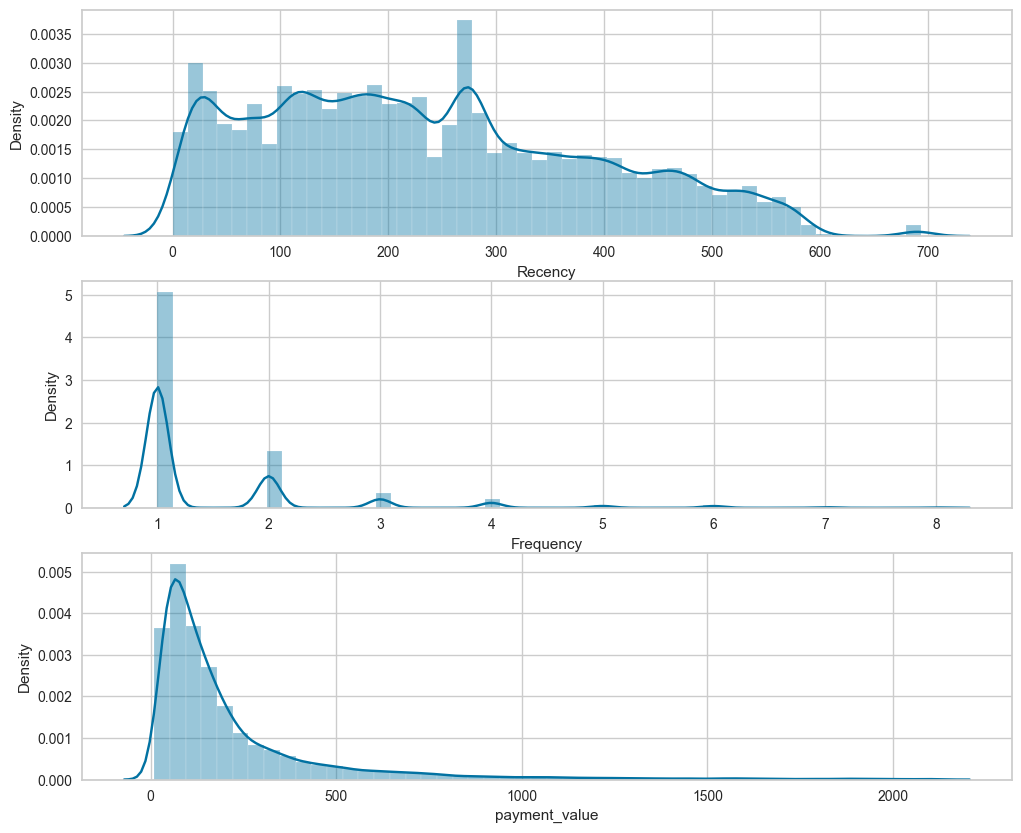

In [391]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(df_user['Recency'])
plt.subplot(3, 1, 2); sns.distplot(df_user['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(df_user['payment_value'])
plt.show()

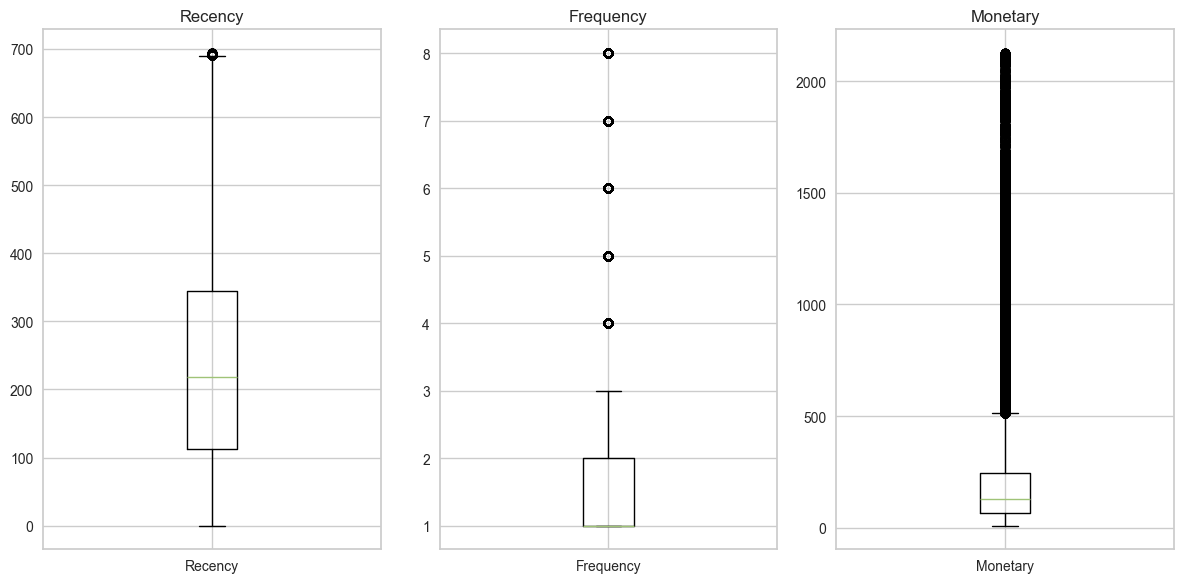

In [392]:
# Membuat boxplot untuk kolom Recency, Frequency, dan Monetary
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.boxplot(df_user['Recency'])
plt.title('Recency')
plt.xticks([1], ['Recency'])

plt.subplot(1, 3, 2)
plt.boxplot(df_user['Frequency'])
plt.title('Frequency')
plt.xticks([1], ['Frequency'])

plt.subplot(1, 3, 3)
plt.boxplot(df_user['payment_value'])
plt.title('Monetary')
plt.xticks([1], ['Monetary'])

plt.tight_layout()
plt.show()

Setelah outlier dihilangkan, terlihat data lebih bersih untuk digunakan.

In [395]:
# Mengurutkan data berdasarkan rank
df_user['Recency_Rank'] = df_user['Recency'].rank(ascending=False, method='dense') # Dibalik
df_user['Frequency_Rank'] = df_user['Frequency'].rank(ascending=True, method='dense')
df_user['Monetary_Rank'] = df_user['payment_value'].rank(ascending=True, method='dense')

In [396]:
# Hitung skewness tiap kolom menggunakan .skew()
skewness_recency = df_user['Recency_Rank'].skew()
skewness_frequency = df_user['Frequency_Rank'].skew()
skewness_monetary = df_user['Monetary_Rank'].skew()
print("Skewness 'Recency':", skewness_recency)
print("Skewness 'Frequency':", skewness_frequency)
print("Skewness 'Monetary':", skewness_monetary)

Skewness 'Recency': -0.44788430787689154
Skewness 'Frequency': 2.8589866117781093
Skewness 'Monetary': 0.5750651609612001


- Nilai skewness lebih dari 1 atau kurang dari -1 menunjukkan distribusi yang sangat condong (skewed) secara signifikan.
- Nilai antara 0.5 dan 1 atau antara -0.5 dan -1 menunjukkan distribusi yang condong (skewed) secara moderat.
- Nilai antara -0.5 dan 0.5 menunjukkan bahwa distribusi tersebut cukup simetris atau hampir simetris.

Referensi:
https://docs.oracle.com/cd/E57185_01/CBREG/ch03s02s03s01.html#:~:text=A%20skewness%20value%20greater%20than,the%20distribution%20is%20fairly%20symmetrical.

Berdasarkan nilai skewness diatas, dapat dikatakan data `Frequency` masih tergolong skewed yang signifikan.

## **Preprocessing**

> Transformasi Data

Transformasi data dapat membantu mengurangi skewness dan membuat distribusi lebih mendekati normal. Akan digunakan log transform pada kolom `Frequency` karena masih sangat *skewed*.

In [428]:
# Transformasi data dengan log transformasi
df_user['Frequency_log'] = np.log1p(df_user['Frequency_Rank'])

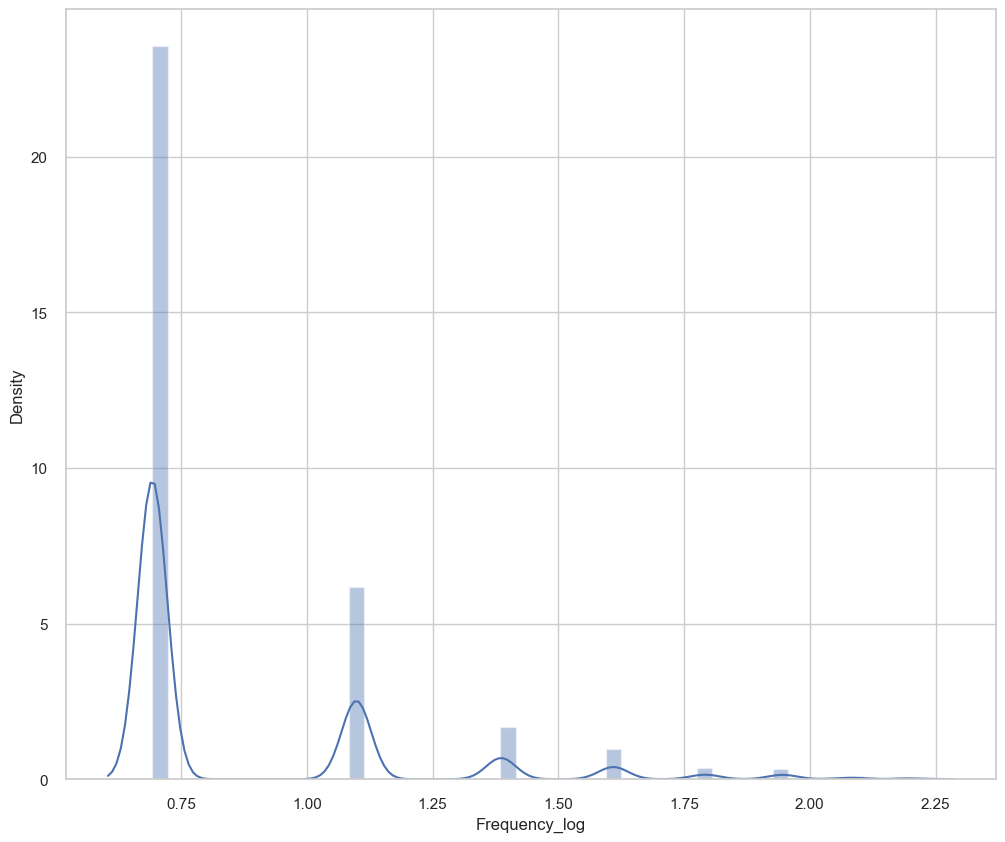

In [429]:
plt.figure(figsize=(12, 10))
sns.distplot(df_user['Frequency_log'])
plt.show()

In [430]:
skewness_frequency_log = df_user['Frequency_log'].skew()
print("Skewness 'Frequency Log':", skewness_frequency_log)

Skewness 'Frequency Log': 1.8664954133117002


In [431]:
# Cek persebaran data `Frequency`
df_user['Frequency'].value_counts()

Frequency
1    78015
2    20466
3     5523
4     3176
5     1170
6     1134
7      364
8      200
Name: count, dtype: int64

Setelah dilakukan *log transformation* skewness dari data sudah jauh lebih baik meski data `Frequency` masih masuk kategori tidak terdistribusi normal. Namun pada dasarnya data kolom `Frequency` memang didominasi dengan nilai 1. Berarti kolom `Frequency` ini memang tidak terdistribusi secara normal karena keadaan yang sebenarnya.

> Standardisasi Data

K-Means clustering sangat sensitif terhadap skala data. Oleh karena itu, penting untuk menstandarisasi data sehingga setiap fitur memiliki bobot yang sama. Digunakan *minmaxscaler* yang membuat data memiliki rentang nilai dari 0 sampai 1 dimana nilai terendah nya adalah 0 dan tertingginya adalah 1.

In [402]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df_user['Recency_Scaled'] = scaler.fit_transform(df_user[['Recency_Rank']])
df_user['Frequency_Scaled'] = scaler.fit_transform(df_user[['Frequency_log']])
df_user['Monetary_Scaled'] = scaler.fit_transform(df_user[['Monetary_Rank']])
df_user.head()

customer_unique_id  Recency  Frequency  payment_value  \
0  861eff4711a542e4b93843c6dd7febb0      469          1         146.87   
1  290c77bc529b7ac935b93aa66c333dc3      228          1         335.48   
2  060e732b5b29e8181a18229c7b0b2b5e      100          1         157.73   
3  259dac757896d24d7702b9acbbff3f3c      168          1         173.30   
4  345ecd01c38d18a9036ed96c73b8d066       31          1         252.25   

   Recency_Rank  Frequency_Rank  Monetary_Rank  Frequency_log  Monetary_log  \
0         144.0             1.0        10903.0       0.693147      9.296885   
1         385.0             1.0        20837.0       0.693147      9.944534   
2         509.0             1.0        11740.0       0.693147      9.370842   
3         445.0             1.0        12928.0       0.693147      9.467228   
4         577.0             1.0        17679.0       0.693147      9.780189   

   Recency_Scaled  Frequency_Scaled  Monetary_Scaled  
0        0.235585               0.0         0.381096  
1        0.632619               0.0         0.728353  
2        0.836903               0.0         0.410354  
3        0.731466               0.0         0.451882  
4        0.948929               0.0         0.617961

> Pembuatan Segmentasi RFM

In [404]:
df_rfm_segment = df_user[['customer_unique_id', 'Recency_Rank', 'Frequency_Rank', 'Monetary_Rank']].copy()
df_rfm_segment.head()

customer_unique_id  Recency_Rank  Frequency_Rank  \
0  861eff4711a542e4b93843c6dd7febb0         144.0             1.0   
1  290c77bc529b7ac935b93aa66c333dc3         385.0             1.0   
2  060e732b5b29e8181a18229c7b0b2b5e         509.0             1.0   
3  259dac757896d24d7702b9acbbff3f3c         445.0             1.0   
4  345ecd01c38d18a9036ed96c73b8d066         577.0             1.0   

   Monetary_Rank  
0        10903.0  
1        20837.0  
2        11740.0  
3        12928.0  
4        17679.0

In [405]:
df_rfm_segment["recency_score"]  = pd.qcut(df_rfm_segment['Recency_Rank'], 5, labels=[5, 4, 3, 2, 1])
df_rfm_segment["frequency_score"]= pd.qcut(df_rfm_segment['Frequency_Rank'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
df_rfm_segment["monetary_score"] = pd.qcut(df_rfm_segment['Monetary_Rank'], 5, labels=[1, 2, 3, 4, 5])

df_rfm_segment['RFM_Score'] = df_rfm_segment.recency_score.astype(str)+ df_rfm_segment.frequency_score.astype(str) + df_rfm_segment.monetary_score.astype(str)
df_rfm_segment.head()

customer_unique_id  Recency_Rank  Frequency_Rank  \
0  861eff4711a542e4b93843c6dd7febb0         144.0             1.0   
1  290c77bc529b7ac935b93aa66c333dc3         385.0             1.0   
2  060e732b5b29e8181a18229c7b0b2b5e         509.0             1.0   
3  259dac757896d24d7702b9acbbff3f3c         445.0             1.0   
4  345ecd01c38d18a9036ed96c73b8d066         577.0             1.0   

   Monetary_Rank recency_score frequency_score monetary_score RFM_Score  
0        10903.0             5               1              3       513  
1        20837.0             3               1              5       315  
2        11740.0             2               1              3       213  
3        12928.0             2               1              4       214  
4        17679.0             1               1              4       114

Referensi:
https://documentation.bloomreach.com/engagement/docs/rfm-segmentation

In [406]:
seg_map= {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers', 
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

In [407]:
df_rfm_segment['Segment'] = df_rfm_segment['recency_score'].astype(str) + df_rfm_segment['frequency_score'].astype(str) + df_rfm_segment['monetary_score'].astype(str)
df_rfm_segment['Segment'] = df_rfm_segment['Segment'].replace(seg_map, regex=True)
df_rfm_segment.head()

customer_unique_id  Recency_Rank  Frequency_Rank  \
0  861eff4711a542e4b93843c6dd7febb0         144.0             1.0   
1  290c77bc529b7ac935b93aa66c333dc3         385.0             1.0   
2  060e732b5b29e8181a18229c7b0b2b5e         509.0             1.0   
3  259dac757896d24d7702b9acbbff3f3c         445.0             1.0   
4  345ecd01c38d18a9036ed96c73b8d066         577.0             1.0   

   Monetary_Rank recency_score frequency_score monetary_score RFM_Score  \
0        10903.0             5               1              3       513   
1        20837.0             3               1              5       315   
2        11740.0             2               1              3       213   
3        12928.0             2               1              4       214   
4        17679.0             1               1              4       114   

            Segment  
0         Promising  
1         Promising  
2    About To Sleep  
3  Cannot Lose Them  
4  Cannot Lose Them

In [408]:
df_rfm_segment['Segment'].unique()

array(['Promising', 'About To Sleep', 'Cannot Lose Them', 'Champions',
       'New Customers', 'Potential Loyalist', 'Lost customers', 'Loyal',
       'Hibernating customers', 'At Risk', 'Need Attention'], dtype=object)

In [409]:
df_rfm_segment['Segment'].nunique()

11

In [411]:
df_rfm_stats = df_rfm_segment[['Segment', 'Recency_Rank', 'Frequency_Rank', 'Monetary_Rank']].groupby('Segment').agg(['mean', 'median', 'min', 'max', 'count'])
df_rfm_stats

Recency_Rank                             Frequency_Rank  \
                              mean median    min    max  count           mean   
Segment                                                                         
About To Sleep          440.146585  445.0  347.0  518.0   7627       1.056116   
At Risk                 510.950188  500.0  438.0  608.0  16783       1.787285   
Cannot Lose Them        550.089419  555.0  438.0  608.0   7929       2.023710   
Champions               218.130205  227.0    1.0  346.0   9631       2.690582   
Hibernating customers   485.929597  483.0  347.0  608.0  11704       1.000000   
Lost customers          565.677770  569.0  519.0  608.0   5434       1.081708   
Loyal                   348.614403  381.0    1.0  437.0   8068       2.132251   
Need Attention          316.269665  347.0    1.0  437.0   5581       1.129547   
New Customers           268.481940  285.0    1.0  437.0   8084       1.000000   
Potential Loyalist      268.780666  287.0    1.0  437.0  17348       1.382292   
Promising               229.879332  219.0    1.0  437.0  11859       1.000000   

                                              Monetary_Rank                    \
                      median  min  max  count          mean   median      min   
Segment                                                                         
About To Sleep           1.0  1.0  6.0   7627   3269.047332   2382.0      7.0   
At Risk                  1.0  1.0  8.0  16783  15983.606447  15233.0   3475.0   
Cannot Lose Them         2.0  1.0  8.0   7929  18374.645100  17748.0   7041.0   
Champions                2.0  1.0  8.0   9631  22169.099678  22956.0  11983.0   
Hibernating customers    1.0  1.0  1.0  11704   5912.920369   5580.5      8.0   
Lost customers           1.0  1.0  8.0   5434   2516.090725   2287.5      1.0   
Loyal                    2.0  1.0  7.0   8068  19265.647868  19569.0   7056.0   
Need Attention           1.0  1.0  2.0   5581  14164.682136  13599.0   7041.0   
New Customers            1.0  1.0  1.0   8084   3246.276596   3064.0      4.0   
Potential Loyalist       1.0  1.0  8.0  17348   5737.564907   5516.0      2.0   
Promising                1.0  1.0  1.0  11859  11954.835737  11307.0      7.0   

                                       
                           max  count  
Segment                                
About To Sleep         11975.0   7627  
At Risk                28599.0  16783  
Cannot Lose Them       28597.0   7929  
Champions              28606.0   9631  
Hibernating customers  11975.0  11704  
Lost customers          7039.0   5434  
Loyal                  28608.0   8068  
Need Attention         27159.0   5581  
New Customers           7040.0   8084  
Potential Loyalist     11981.0  17348  
Promising              27155.0  11859

In [412]:
df_rfm_stats['Ratio']= (100*df_rfm_stats['Recency_Rank']['count']/df_rfm_stats['Recency_Rank']['count'].sum()).round(2)
df_rfm_stats

Recency_Rank                             Frequency_Rank  \
                              mean median    min    max  count           mean   
Segment                                                                         
About To Sleep          440.146585  445.0  347.0  518.0   7627       1.056116   
At Risk                 510.950188  500.0  438.0  608.0  16783       1.787285   
Cannot Lose Them        550.089419  555.0  438.0  608.0   7929       2.023710   
Champions               218.130205  227.0    1.0  346.0   9631       2.690582   
Hibernating customers   485.929597  483.0  347.0  608.0  11704       1.000000   
Lost customers          565.677770  569.0  519.0  608.0   5434       1.081708   
Loyal                   348.614403  381.0    1.0  437.0   8068       2.132251   
Need Attention          316.269665  347.0    1.0  437.0   5581       1.129547   
New Customers           268.481940  285.0    1.0  437.0   8084       1.000000   
Potential Loyalist      268.780666  287.0    1.0  437.0  17348       1.382292   
Promising               229.879332  219.0    1.0  437.0  11859       1.000000   

                                              Monetary_Rank                    \
                      median  min  max  count          mean   median      min   
Segment                                                                         
About To Sleep           1.0  1.0  6.0   7627   3269.047332   2382.0      7.0   
At Risk                  1.0  1.0  8.0  16783  15983.606447  15233.0   3475.0   
Cannot Lose Them         2.0  1.0  8.0   7929  18374.645100  17748.0   7041.0   
Champions                2.0  1.0  8.0   9631  22169.099678  22956.0  11983.0   
Hibernating customers    1.0  1.0  1.0  11704   5912.920369   5580.5      8.0   
Lost customers           1.0  1.0  8.0   5434   2516.090725   2287.5      1.0   
Loyal                    2.0  1.0  7.0   8068  19265.647868  19569.0   7056.0   
Need Attention           1.0  1.0  2.0   5581  14164.682136  13599.0   7041.0   
New Customers            1.0  1.0  1.0   8084   3246.276596   3064.0      4.0   
Potential Loyalist       1.0  1.0  8.0  17348   5737.564907   5516.0      2.0   
Promising                1.0  1.0  1.0  11859  11954.835737  11307.0      7.0   

                                       Ratio  
                           max  count         
Segment                                       
About To Sleep         11975.0   7627   6.93  
At Risk                28599.0  16783  15.25  
Cannot Lose Them       28597.0   7929   7.21  
Champions              28606.0   9631   8.75  
Hibernating customers  11975.0  11704  10.64  
Lost customers          7039.0   5434   4.94  
Loyal                  28608.0   8068   7.33  
Need Attention         27159.0   5581   5.07  
New Customers           7040.0   8084   7.35  
Potential Loyalist     11981.0  17348  15.76  
Promising              27155.0  11859  10.78

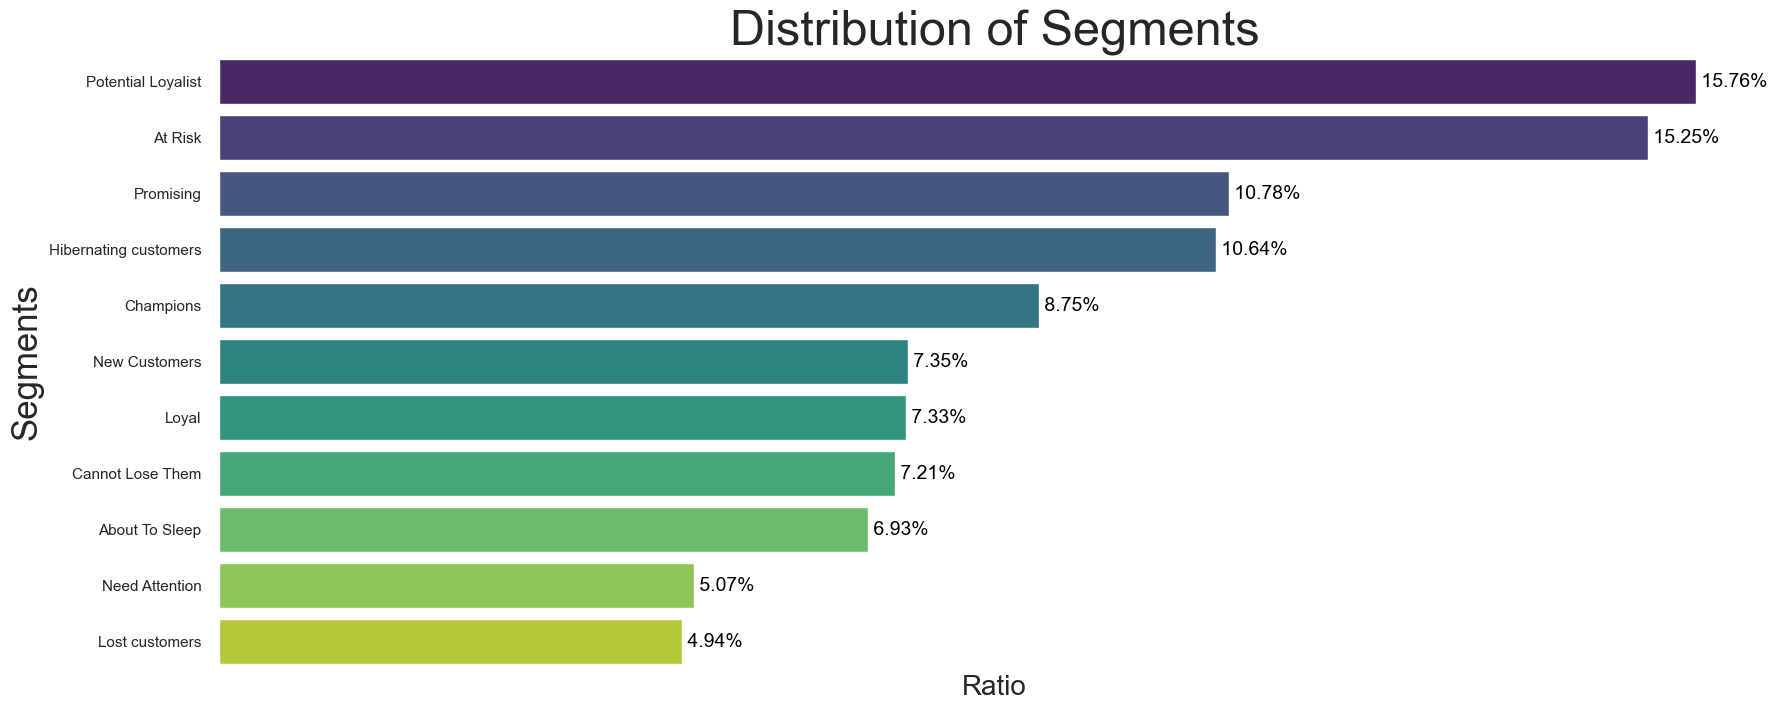

In [413]:
# Mengurutkan data frame berdasarkan kolom 'Ratio' secara descending
RFMStats_sorted = df_rfm_stats.sort_values(by='Ratio', ascending=False)

plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")  # Setting the style

# Membuat bar plot menggunakan seaborn dengan warna yang berbeda
per = sns.barplot(x='Ratio', y=RFMStats_sorted.index, data=RFMStats_sorted, palette=sns.color_palette("viridis", n_colors=len(RFMStats_sorted)))

# Mengatur spines untuk tampilan yang lebih bersih
sns.despine(bottom=True, left=True)

# Menambahkan label nilai persentase di atas bar
for i, v in enumerate(RFMStats_sorted['Ratio']):
    per.text(v, i, " {:.2f}%".format(v), color='black', va='center', fontsize=14)

# Mengatur label sumbu dan judul
per.set_ylabel('Segments', fontsize=25)
per.set_xlabel('Ratio', fontsize=20)  # Ubah label sumbu x jika diperlukan
per.set_title('Distribution of Segments', fontsize=35)

# Menghilangkan tanda sumbu x
per.set_xticks([])

plt.show()

In [414]:
import squarify

Text(0.5, 0.98, 'Recency and Frequency Grid')

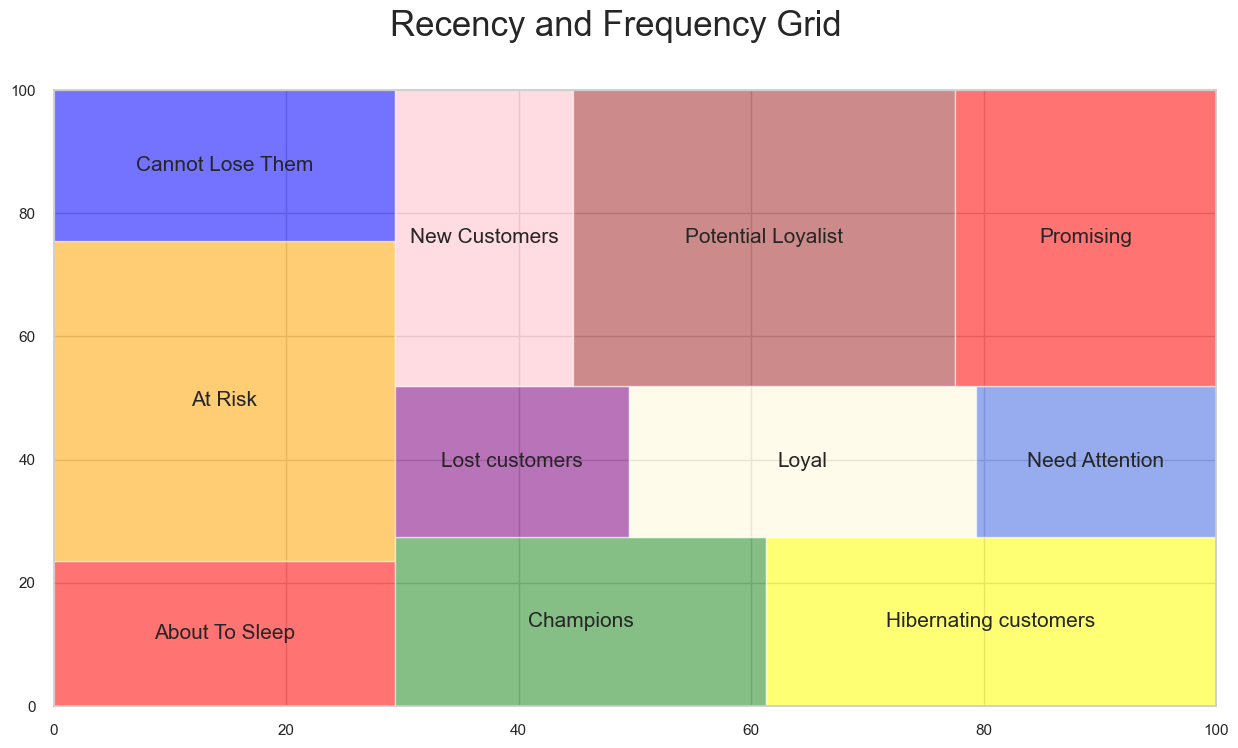

In [416]:
# Treemap by recency/frequency
plt.figure(figsize=(15,8))
plt.rc('font', size=15)
squarify.plot(sizes=df_rfm_stats["Recency_Rank"]["count"], label=df_rfm_stats.index, 
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.55)
plt.suptitle("Recency and Frequency Grid", fontsize=25)

Visualisasi diatas merupakan pembagian segmentasi pelanggan berdasarkan referensi. Namun pengelompokkan tersebut dapat dikatakan merupakan pengelompokkan secara general. Sementara jika digunakan unsupervised machine learning seperti K-Means, maka segmentasi pelanggan yang diperoleh menjadi lebih sesuai dengan data yang dimiliki. Karena penentuan nilai seperti pembagian jumlah cluster akan menyesuaikan dengan pola data yang dimiliki. Oleh karena itu akan dilakukan penerapan model K-Means agar segmentasi pelanggan lebih akurat.

> Pemilihan Jumlah Cluster dengan K-Means Clustering

**K-means clustering** adalah metode pengelompokan data yang termasuk dalam unsupervised learning, yang digunakan untuk membagi sekumpulan data ke dalam kk cluster berdasarkan kelompok-kelompok atau cluster berdasarkan kemiripan karakteristiknya. Algoritma ini bekerja dengan memilih kk titik centroid awal secara acak, kemudian menetapkan setiap data ke cluster dengan centroid terdekat berdasarkan jarak Euclidean. Setelah semua data ditetapkan, centroid diupdate menjadi rata-rata dari semua data dalam cluster tersebut. Proses ini diulang sampai posisi centroid stabil, menunjukkan bahwa data telah dikelompokkan secara optimal. K-means clustering sering digunakan dalam berbagai aplikasi seperti segmentasi pelanggan, pengelompokan dokumen, dan analisis citra karena kesederhanaannya dan efisiensinya dalam menangani dataset yang besar. Namun, algoritma ini memiliki keterbatasan seperti harus menentukan jumlah cluster sebelumnya dan sensitif terhadap inisialisasi centroid awal dan tidak cocok untuk cluster dengan bentuk yang kompleks atau ukuran yang berbeda-beda.

K-Means clustering adalah alat yang kuat untuk segmentasi pelanggan dalam analisis data bisnis. Dengan mengelompokkan pelanggan berdasarkan pola pembelian, preferensi produk, atau perilaku lainnya, perusahaan dapat memahami kelompok pelanggan yang berbeda secara lebih mendalam. Misalnya, dengan menerapkan K-Means pada data transaksi, perusahaan dapat mengidentifikasi kelompok pelanggan yang cenderung membeli produk tertentu atau kelompok yang memiliki preferensi harga tertentu. Hal ini memungkinkan perusahaan untuk menyusun strategi pemasaran yang lebih terarah, menyesuaikan layanan, dan meningkatkan retensi pelanggan dengan cara yang lebih efektif. Dengan demikian, K-Means clustering tidak hanya mempermudah segmentasi pelanggan, tetapi juga meningkatkan pemahaman tentang kebutuhan dan preferensi pelanggan untuk mendukung pengambilan keputusan yang lebih baik dalam strategi bisnis.

In [131]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score

Berikut adalah metrik yang digunakan untuk menentukan jumlah cluster yang optimal.
- Elbow Method: Fokus pada mengurangi inertia (within-cluster sum of squares). Ini bagus untuk melihat seberapa besar variansi dalam cluster dan menemukan titik di mana penambahan cluster tidak memberikan pengurangan inertia yang signifikan.
- Silhouette Score: Mengukur seberapa mirip data dalam cluster dibandingkan dengan cluster lainnya. Nilai ini berkisar dari -1 (clustering buruk) hingga 1 (clustering baik).
- Davies-Bouldin Score: metrik yang digunakan untuk mengevaluasi kualitas clustering. Nilai ini dihitung berdasarkan rasio antara jarak internal cluster (seberapa jauh titik-titik dalam cluster dari pusat cluster) dan jarak antar cluster (seberapa jauh pusat-pusat cluster satu sama lain). Semakin rendah nilai Davies-Bouldin Score, semakin baik kualitas clustering.

In [417]:
df_scaled = df_user[['Recency_Scaled', 'Frequency_Scaled', 'Monetary_Scaled']].copy()

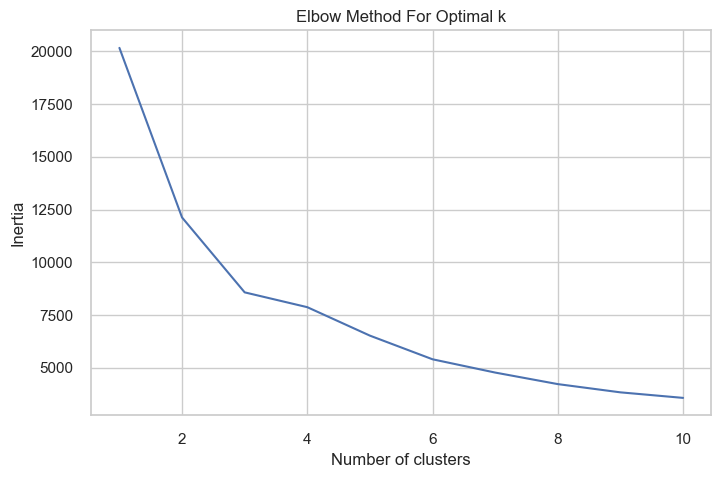

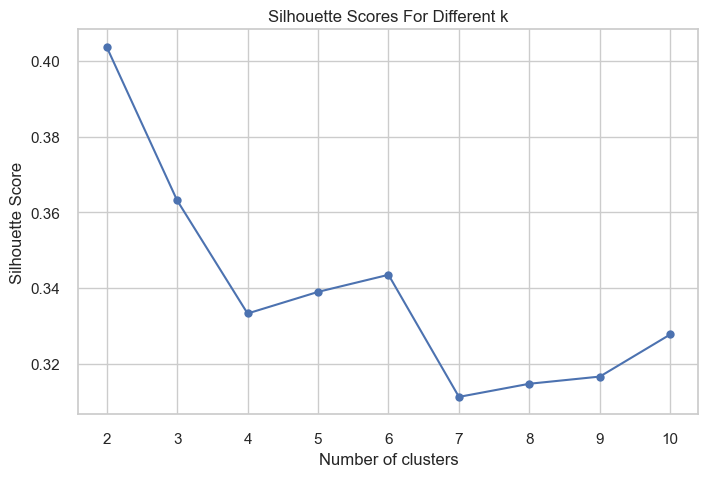

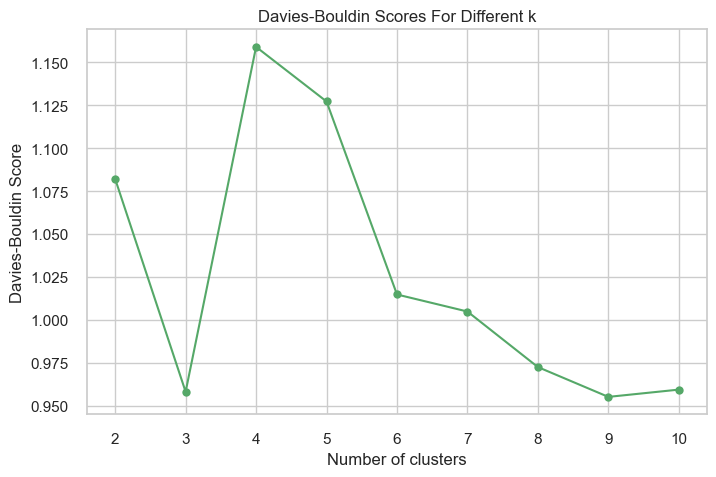

In [418]:
X = df_scaled[['Recency_Scaled', 'Frequency_Scaled', 'Monetary_Scaled']]

# Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Silhouette Score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    labels = kmeans.labels_
    sil_score = silhouette_score(X, labels)
    sil_scores.append(sil_score)
    
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different k')
plt.show()

# Davies-Bouldin Score
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    labels = kmeans.labels_
    db_score = davies_bouldin_score(X, labels)
    db_scores.append(db_score)
    
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), db_scores, 'go-')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Scores For Different k')
plt.show()

Interpretasi hasil metrik:
- Elbow Method: Pilih jumlah cluster di mana penurunan inertia tidak signifikan lagi.
- Silhouette Score: Pilih jumlah cluster dengan nilai silhouette score tertinggi.
- Davies-Bouldin Score: Pilih jumlah cluster dengan nilai terendah (nilai yang lebih rendah menunjukkan clustering yang lebih baik).

Interpretasi hasil dari grafik:

1. Elbow Method: Dari grafik ini, terlihat bahwa terjadi penurunan inertia yang signifikan antara k=2 dan k=3, dan kemudian penurunan menjadi lebih lambat setelah k=3. Ini menunjukkan bahwa titik "elbow" mungkin berada di k=3.
2. Silhouette Score: Grafik pertama menunjukkan bahwa nilai Silhouette Score tertinggi ada pada k=2, dan setelah itu nilainya menurun. Pada k=3, nilai Silhouette Score lebih rendah dibandingkan dengan k=2, tetapi masih dalam kisaran yang bisa diterima (sekitar 0.35).
3. Davies-Bouldin Score: Grafik kedua menunjukkan bahwa nilai Davies-Bouldin Score terendah ada pada k=3. Nilai ini menunjukkan bahwa 3 klaster memiliki rasio jarak dalam klaster terhadap jarak antar klaster yang paling rendah, yang berarti klasterisasi ini relatif baik.

Berdasarkan grafik Elbow Method, titik "elbow" terlihat pada k=3, yang mengindikasikan bahwa 3 klaster mungkin menjadi pilihan optimal. Jika digabungkan dengan Davies-Bouldin Score yang terendah pada k=3, ini semakin memperkuat bahwa segmentasi untuk 3 klaster adalah pilihan yang baik. Meskipun Silhouette Score sedikit lebih rendah untuk k=3 dibandingkan dengan k=2, hasil dari Davies-Bouldin Score dan Elbow Method mendukung penggunaan 3 klaster. Jadi, berdasarkan ketiga metrik (Silhouette Score, Davies-Bouldin Score, dan Elbow Method), segmentasi dengan 3 klaster dapat dianggap baik dan optimal untuk data Olist.

## **Methodology (Modeling/Analysis)**

Setelah melakukan preprocessing, terapkan K-Means clustering pada data yang sudah diproses.

In [419]:
def clusterSegmentation(dataframe, df_scaled, number_cluster):
    df_cluster = dataframe.copy()

    # melakukan k-means clustering dengan 4 cluster
    kmeans = KMeans(n_clusters=number_cluster, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_

    # menambahkan kolom labels hasil clustering ke dalam dataframe 
    df_cluster['Cluster'] = labels

    # Data preparation
    x = df_cluster['Recency_Scaled']
    y = df_cluster['Frequency_Scaled']
    z = df_cluster['Monetary_Scaled']
    clusters = df_cluster['Cluster']

    # Plotting Recency-Frequency
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Recency_Scaled', y='Frequency_Scaled', hue='Cluster', palette='Set2', legend='full', data=df_cluster)
    plt.title('Recency vs Frequency')
    plt.show()

    # Plotting Recency-Monetary
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Recency_Scaled', y='Monetary_Scaled', hue='Cluster', palette='Set2', legend='full', data=df_cluster)
    plt.title('Recency vs Monetary')
    plt.show()

    # Plotting Monetary-Frequency
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Monetary_Scaled', y='Frequency_Scaled', hue='Cluster', palette='Set2', legend='full', data=df_cluster)
    plt.title('Monetary vs Frequency')
    plt.show()

    # Gabungkan dalam satu gambar
    plt.figure(figsize=(18, 6))

    # Plot 1: Recency-Frequency
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='Recency_Scaled', y='Frequency_Scaled', hue='Cluster', palette='Set2', legend=False, data=df_cluster)
    plt.title('Recency vs Frequency')

    # Plot 2: Recency-Monetary
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='Recency_Scaled', y='Monetary_Scaled', hue='Cluster', palette='Set2', legend=False, data=df_cluster)
    plt.title('Recency vs Monetary')

    # Plot 3: Monetary-Frequency
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='Monetary_Scaled', y='Frequency_Scaled', hue='Cluster', palette='Set2', legend='full', data=df_cluster)
    plt.title('Monetary vs Frequency')

    plt.tight_layout()
    plt.show()

    return df_cluster

**Model 3 Clustering**

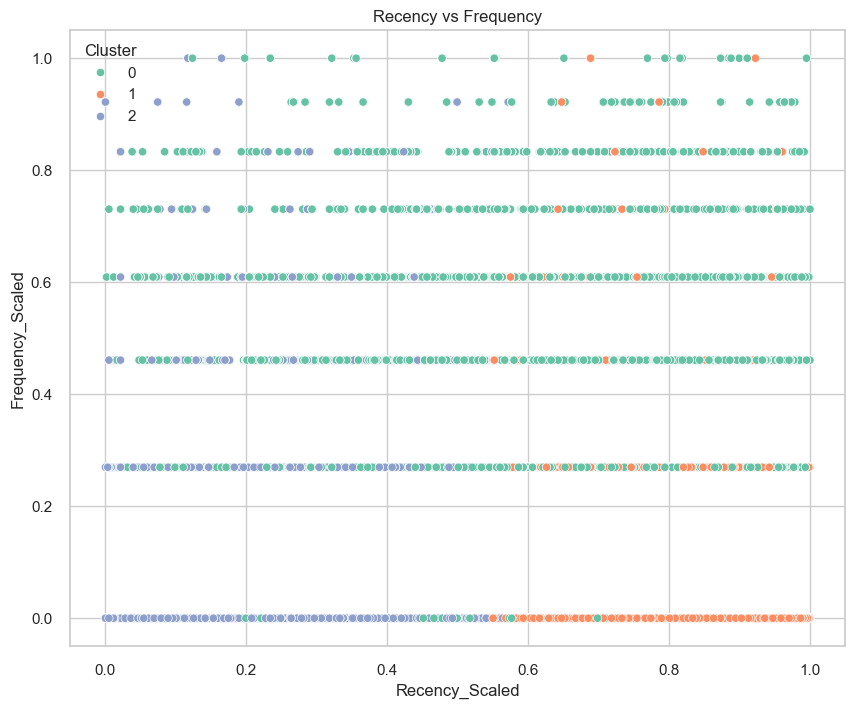

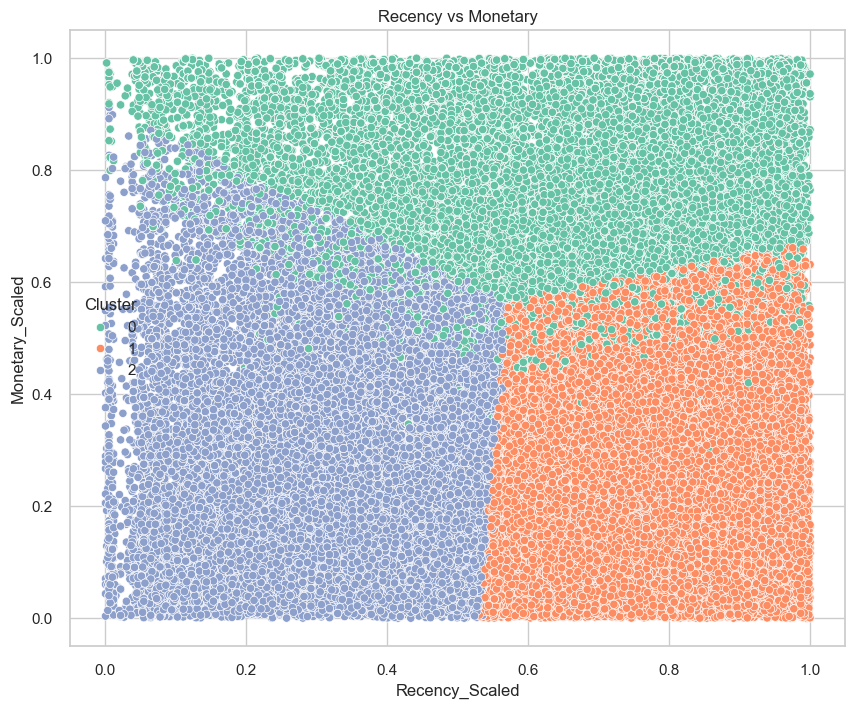

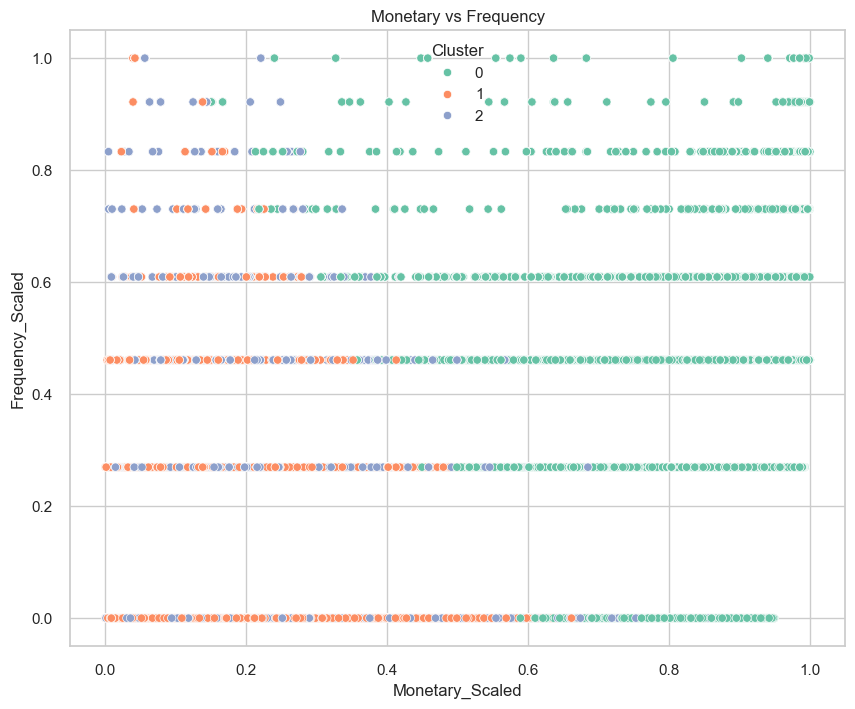

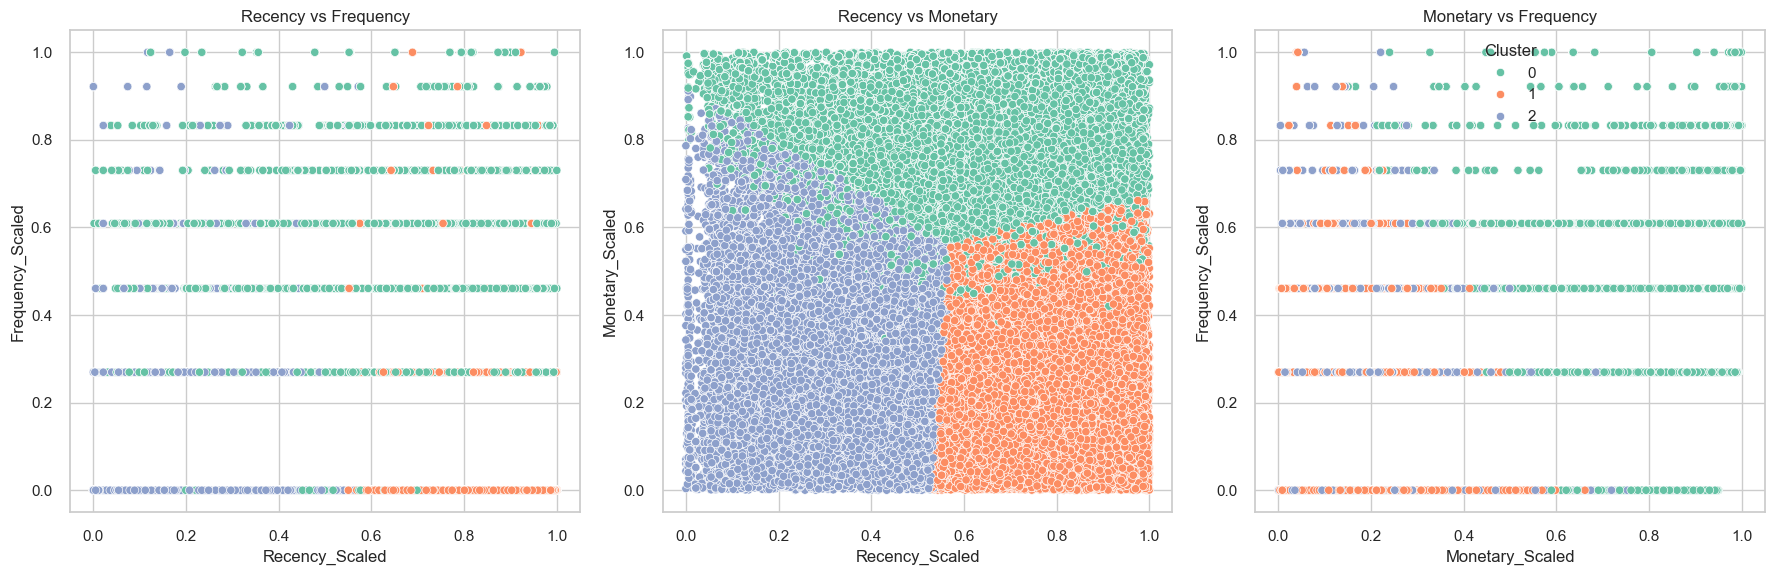

In [420]:
df_cluster_3 = clusterSegmentation(df_user, df_scaled, 3)

In [421]:
# Buat dataframe dengan pivot table
pivot_table = df_cluster_3.pivot_table(index='Cluster', values=['Recency_Scaled', 'Frequency_Scaled', 'Monetary_Scaled'], aggfunc='mean') # 

# gradasi warna merah
cmap = plt.cm.get_cmap('Reds')

# Tambahkan parameter menunjukkan tinggi rendahnya angka dalam gradasi warna merah
pivot_table.style.background_gradient(cmap=cmap).format('{:.2f}')

In [422]:
# Aggregatte Descriptive for df_cluster_3
agg_descriptive = df_cluster_3.groupby('Cluster').describe()
agg_descriptive = agg_descriptive[agg_descriptive.columns[np.r_[3:8,11:16,19:24]]]
agg_descriptive['count'] = df_cluster_4.groupby(
    'Cluster',
    as_index=False
)['Cluster'].value_counts()['count']
agg_descriptive[('ratio','(%)')] = agg_descriptive['count'].apply(lambda x: round(x/agg_descriptive['count'].sum()*100,2))

agg_descriptive.apply(lambda row: row.map('{:.2f}'.format),axis=1)

Recency                                 Frequency                    \
            min     25%     50%     75%     max       min   25%   50%   75%   
Cluster                                                                       
0          0.00  112.00  206.00  306.00  693.00      1.00  2.00  2.00  3.00   
1          0.00   70.00  140.00  209.00  290.00      1.00  1.00  1.00  1.00   
2        265.00  340.00  406.00  480.00  694.00      1.00  1.00  1.00  1.00   

              payment_value                                      count  ratio  
          max           min     25%     50%     75%      max              (%)  
Cluster                                                                        
0        8.00         68.93  292.64  410.93  647.72  2125.44  19192.00  19.04  
1        8.00          9.59   55.24   89.36  138.07   283.53  49287.00  48.89  
2        8.00         10.07   60.09   97.87  151.61   663.93  32333.00  32.07

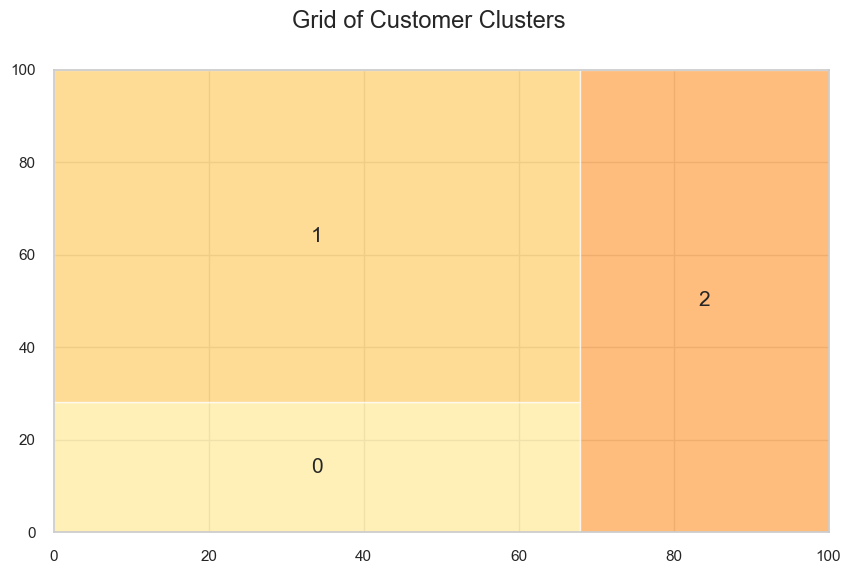

In [423]:
#Display a Grid of Customer Clusters
plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=agg_descriptive['count'],
    label=agg_descriptive['count'].index,
    color=sns.color_palette('YlOrRd'),
    alpha=0.7
)

plt.suptitle(
    'Grid of Customer Clusters', fontsize=17
)

plt.show()

| Jenis Cluster | Nama Cluster | Deskripsi Cluster | Strategi Bisnis |
|:------------:|:-------------:|:-----------------:|:-----------------------:|
| Cluster 0 | Potential Loyalist | Klaster ini terdiri dari pelanggan dengan frekuensi pembelian yang cukup baik, nilai pembelian yang tinggi, dan cukup baru melakukan pembelian. | Loyalty Programs: Buat program loyalitas khusus untuk menjaga dan meningkatkan hubungan dengan pelanggan ini.; Exclusive Offers: Berikan penawaran eksklusif, diskon khusus, atau preview produk baru untuk mempertahankan dan meningkatkan loyalitas mereka.; Personalized Communication: Kirim komunikasi yang dipersonalisasi untuk menginformasikan mereka tentang produk baru atau promosi yang relevan. |
| Cluster 1 | New Customers | Klaster ini mewakili nasabah yang jarang bertransaksi, mengeluarkan sedikit uang, tetapi baru saja melakukan pembelian. | Welcome Offers: Berikan penawaran selamat datang yang menarik untuk mendorong pembelian ulang.; Education Campaigns: Lakukan kampanye edukasi mengenai produk dan manfaatnya untuk meningkatkan nilai pembelian mereka.; Follow-up Communication: Kirimkan komunikasi follow-up untuk memastikan mereka puas dengan pembelian mereka dan mengajak mereka untuk berbelanja lagi.|
| Cluster 2 | Hibernating Customers | Klaster ini terdiri dari pelanggan dengan frekuensi dan nilai pembelian yang rendah, dan sudah cukup lama tidak melakukan pembelian. | Re-engagement Campaigns: Lakukan kampanye re-engagement untuk menarik kembali pelanggan ini dengan penawaran yang menarik.; Feedback Collection: Kumpulkan umpan balik untuk memahami alasan mereka berhenti berbelanja dan melakukan perbaikan yang diperlukan.; Win-back Offers: Tawarkan diskon besar atau promosi khusus untuk mengajak mereka kembali berbelanja.

In [442]:
# Mengubah penamaan cluster 
df_cluster_3['Name_Cluster'] = np.where(df_cluster_3['Cluster'] == 0, 'Potential Loyalist',
                            np.where(df_cluster_3['Cluster'] == 1, 'New Customers', 'Hibernating Customers'))

In [445]:
df_cluster_3.to_csv('cluster3.csv', index=False)

**Model 4 Clustering**

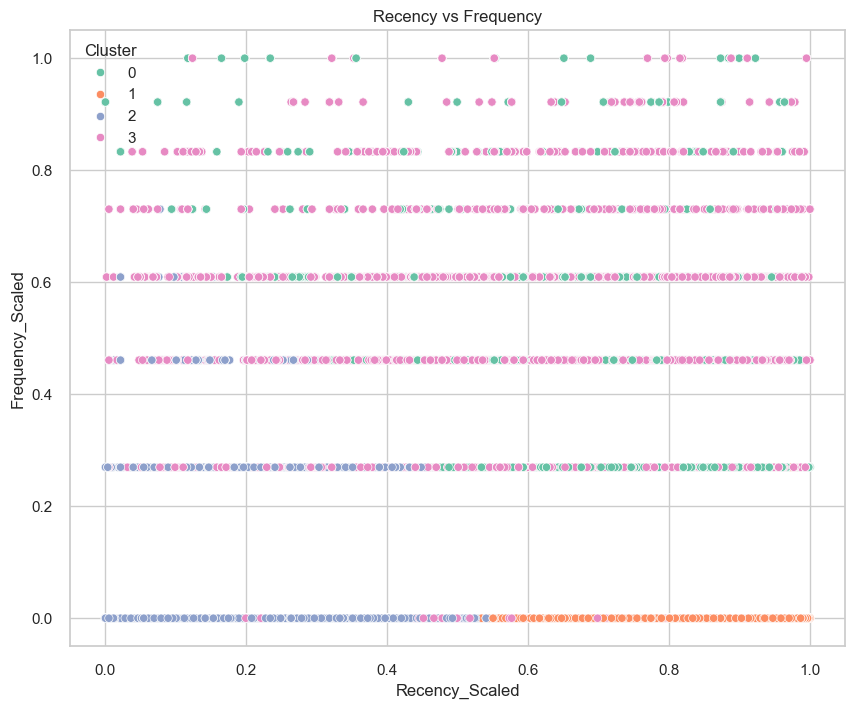

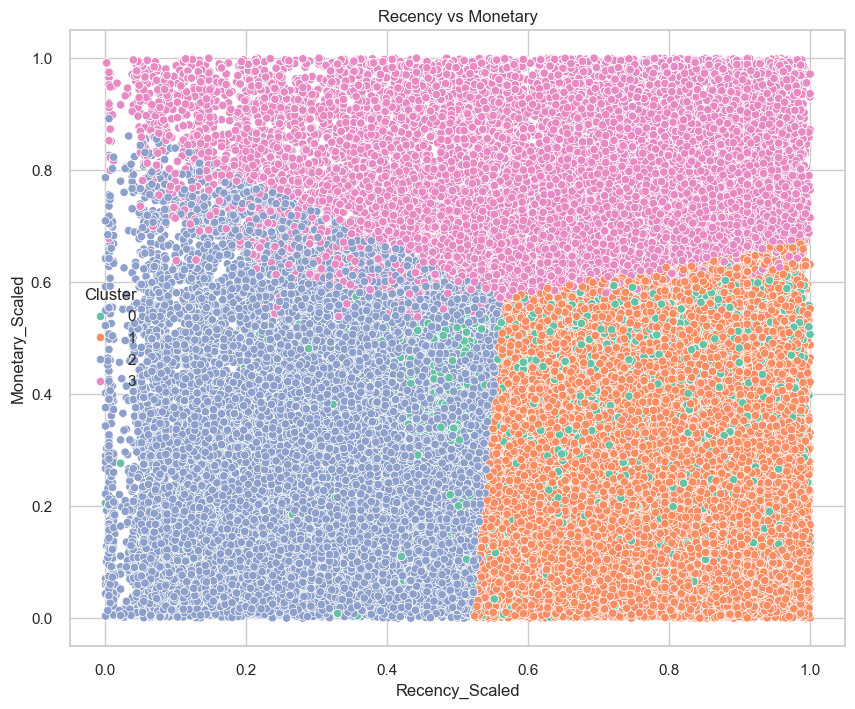

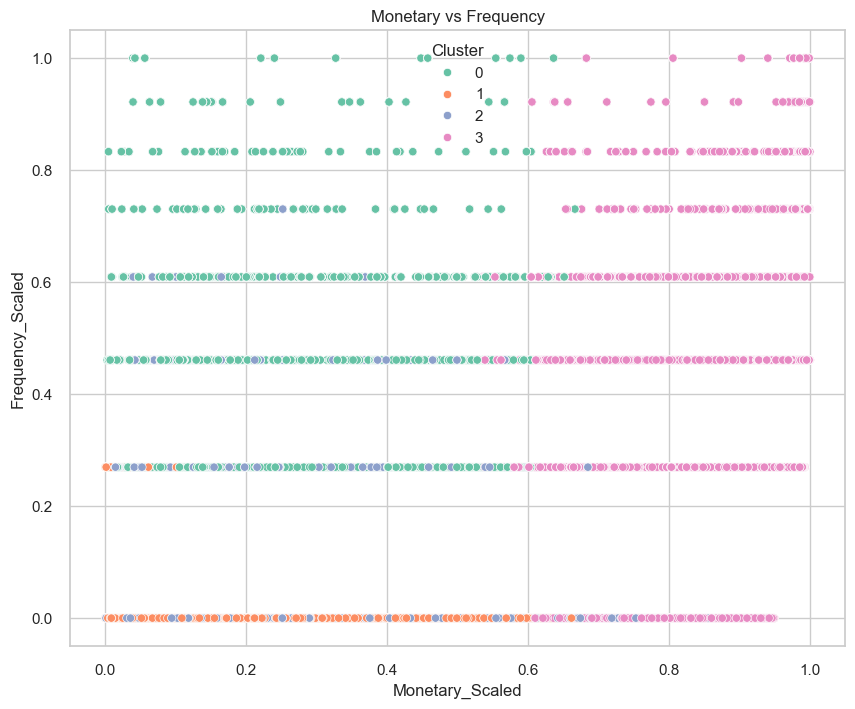

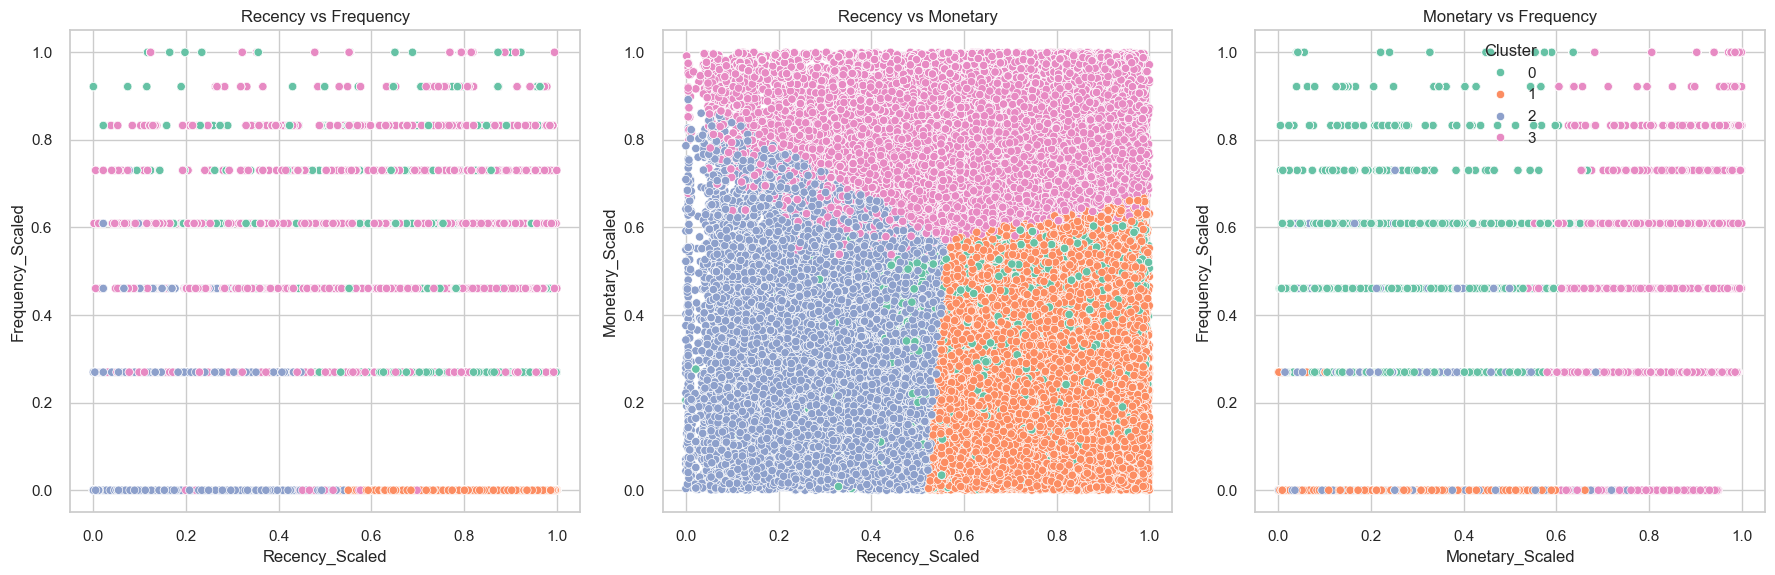

In [424]:
df_cluster_4 = clusterSegmentation(df_user, df_scaled, 4)

In [425]:
# Buat dataframe dengan pivot table
pivot_table = df_cluster_4.pivot_table(index='Cluster', values=['Recency_Scaled', 'Frequency_Scaled', 'Monetary_Scaled'], aggfunc='mean') # 

# gradasi warna merah
cmap = plt.cm.get_cmap('Reds')

# Tambahkan parameter menunjukkan tinggi rendahnya angka dalam gradasi warna merah
pivot_table.style.background_gradient(cmap=cmap).format('{:.2f}')

In [426]:
# Aggregatte Descriptive for df_cluster_4
agg_descriptive = df_cluster_4.groupby('Cluster').describe()
agg_descriptive = agg_descriptive[agg_descriptive.columns[np.r_[3:8,11:16,19:24]]]
agg_descriptive['count'] = df_cluster_4.groupby(
    'Cluster',
    as_index=False
)['Cluster'].value_counts()['count']
agg_descriptive[('ratio','(%)')] = agg_descriptive['count'].apply(lambda x: round(x/agg_descriptive['count'].sum()*100,2))

agg_descriptive.apply(lambda row: row.map('{:.2f}'.format),axis=1)

Recency                                 Frequency                    \
            min     25%     50%     75%     max       min   25%   50%   75%   
Cluster                                                                       
0          0.00   88.00  169.00  259.00  694.00      2.00  2.00  2.00  3.00   
1          0.00   71.00  143.00  214.00  294.00      1.00  1.00  1.00  1.00   
2        270.00  349.00  412.00  484.00  694.00      1.00  1.00  1.00  1.00   
3          0.00  116.00  214.00  316.00  693.00      1.00  1.00  2.00  3.00   

              payment_value                                      count  ratio  
          max           min     25%     50%     75%      max              (%)  
Cluster                                                                        
0        8.00         16.05   89.41  138.57  185.82   284.82   9272.00   8.43  
1        2.00          9.59   54.00   87.64  137.60   290.84  46394.00  42.16  
2        5.00         10.07   59.33   96.89  152.68   594.46  27971.00  25.42  
3        8.00        208.00  321.82  444.93  687.50  2125.44  26411.00  24.00

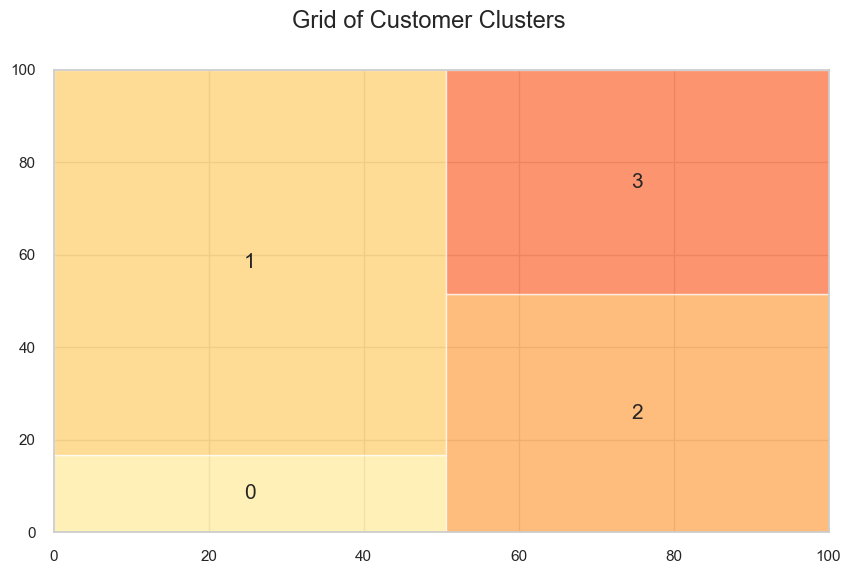

In [427]:
#Display a Grid of Customer Clusters
plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=agg_descriptive['count'],
    label=agg_descriptive['count'].index,
    color=sns.color_palette('YlOrRd'),
    alpha=0.7
)

plt.suptitle(
    'Grid of Customer Clusters', fontsize=17
)

plt.show()

| Jenis Cluster | Nama Cluster | Deskripsi Cluster | Keterangan Nama Cluster |
|:------------:|:-------------:|:-----------------:|:-----------------------:|
| Cluster 0 | About to sleep | Klaster ini merepresentasikan pelanggan dengan frekuensi transaksi sedang, nilai moneter sedang, dan melakukan transaksi terbaru cukup baru. | Libatkan pelanggan ini dengan penawaran yang dipersonalisasi untuk menjaga minat mereka dan mendorong pembelian ulang. Berikan layanan pelanggan yang sangat baik untuk meningkatkan kepuasan dan loyalitas mereka. Pantau perilaku mereka dengan cermat untuk mencegah mereka tergelincir ke segmen yang kurang aktif. |
| Cluster 1 | New Customers | laster ini merepresentasikan pelanggan yang jarang bertransaksi, mengeluarkan sedikit uang, tetapi baru-baru ini melakukan pembelian.| Terapkan program onboarding untuk mendidik pelanggan ini tentang produk dan layanan. Tawarkan insentif untuk pembelian berikutnya untuk mendorong transaksi yang lebih sering. Tindak lanjuti dengan komunikasi yang dipersonalisasi untuk membangun hubungan dan mengonversi mereka menjadi pelanggan tetap.|
| Cluster 2 | Hibernating Customers | Klaster ini merepresentasikan pelanggan yang jarang bertransaksi, mengeluarkan sedikit uang, dan tidak melakukan pembelian baru-baru ini. | Aktifkan kembali pelanggan ini dengan kampanye pemasaran yang ditargetkan. Kirim penawaran khusus atau diskon untuk mendorong mereka kembali. Lakukan survei untuk memahami kebutuhan mereka dan alasan ketidakaktifan. |
| Cluster 3 | Need Attention | Klaster ini merepresentasikan pelanggan dengan frekuensi transaksi sedang, nilai moneter tinggi, dan melakukan transaksi terbaru cukup baru. | Libatkan pelanggan ini dengan penawaran yang dipersonalisasi untuk menjaga minat mereka dan mendorong pembelian ulang. Berikan layanan pelanggan yang sangat baik untuk meningkatkan kepuasan dan loyalitas mereka. Pantau perilaku mereka dengan cermat untuk mencegah mereka tergelincir ke segmen yang kurang aktif.|

In [443]:
# Mengubah penamaan cluster 
df_cluster_4['Name_Cluster'] = np.where(df_cluster_4['Cluster'] == 0, 'About To Sleep',
                            np.where(df_cluster_4['Cluster'] == 1, 'New Customers',
                            np.where(df_cluster_4['Cluster'] == 2, 'Hibernating Customers', 'Need Attention')))

In [444]:
df_cluster_4.to_csv('cluster4.csv', index=False)

Keputusan
1. 3 Klaster:
- Lebih sederhana dan lebih mudah untuk diimplementasikan.
- Jika skor siluet dan metode elbow mendukung tiga klaster, maka ini akan memberikan segmentasi yang lebih stabil dan terfokus.
2. 4 Klaster:
- Memberikan granularity yang lebih tinggi dalam analisis.
- Dapat memberikan wawasan lebih mendalam tentang perilaku pelanggan, namun bisa menjadi lebih kompleks untuk diimplementasikan dan diikuti.

Rekomendasi: Berdasarkan informasi bahwa skor siluet dan metode elbow menunjukkan tiga klaster adalah yang optimal, maka lebih baik menggunakan tiga klaster. Hal ini akan memberikan segmentasi yang jelas dan mudah diimplementasikan, serta sesuai dengan analisis statistik dari data yang digunakan.

## Menggabungkan/Analisis Hasil Clustering dengan Dataset

Dengan pengelompokkan berdasarkan RFM, maka akan dilakukan analisis dengan fitur lainnya agar bisa memperoleh pola perilaku atau karakteristik dari setiap segmen pelanggan. Dengan begitu akan memudahkan untuk mengambil keputusan strategi bisnis, peningkatan loyalitas pelanggan dan efektivitas pemasaran di setiap segmen pelanggan.

In [455]:
df_cluster = df_cluster_3[['customer_unique_id', 'Recency', 'Frequency', 'Cluster', 'Name_Cluster']].copy()

In [456]:
dfCluster = df.merge(df_cluster, how='left', on='customer_unique_id')

In [457]:
# Pengubahan kolom recency
dfCluster['RecencyinMonths'] = dfCluster['Recency'] // 30
dfCluster['Recency_Scale'] = np.where(dfCluster['RecencyinMonths'] <= 3, '<=3 Month',
                             np.where(dfCluster['RecencyinMonths'] <= 6, '4-6 Month',
                             np.where(dfCluster['RecencyinMonths'] <= 9, '7-9 Month', '>12 Month')))

In [458]:
# Pengubahan kolom frequency
dfCluster['Frequency_Scale'] = np.where(dfCluster['Frequency'] == 1, '1',
                               np.where(dfCluster['Frequency'] == 2, '2',
                               np.where(dfCluster['Frequency'] == 3, '3',
                               np.where(dfCluster['Frequency'] == 4, '4', '>=5'))))

In [281]:
import plotly.express as px

> Tipe Pembayaran Berdasarkan Cluster

In [459]:
# membuat pivot tabel untuk menghitung tipe pembayaran berdasarkan cluster
pivot_table = pd.pivot_table(dfCluster, 
                             values='customer_unique_id', 
                             index=['Name_Cluster'], 
                             columns=['payment_type'], 
                             aggfunc='count', 
                             fill_value=0)

# menghitung proporsi setiap cluster
payment_type_proportion = pivot_table.apply(lambda x: x/x.sum(), axis=1)

payment_type_proportion = payment_type_proportion.reset_index()

# Membuat grafik menggunakan plotly
payment_type_proportion_melted = payment_type_proportion.melt(id_vars=['Name_Cluster'], 
                                                   var_name='payment_type', 
                                                   value_name='Proportions')

In [460]:
fig = px.bar(payment_type_proportion_melted, 
             x="Name_Cluster", 
             y="Proportions", 
             color="payment_type",
             barmode='stack')
fig.update_layout(title='Payment Types for Each Cluster Name',
                  xaxis_title='Cluster Name',
                  yaxis_title='Proportion of Payment Types')
fig.show()

Dari data ini, terlihat bahwa sebagian besar segmen pelanggan menggunakan metode pembayaran credit_card, diikuti oleh boleto (salah satu metode pembayaran online/offline paling populer di Brasil yang memungkinkan Anda membayar Kredit Skype Dan Langganan), kemudian voucher, dengan debit_card sebagai yang terakhir.

Berdasarkan temuan ini, salah satu strategi yang dapat diterapkan untuk meningkatkan retensi pelanggan adalah memberikan insentif khusus untuk penggunaan metode pembayaran tertentu, terutama credit_card dan boleto. Ini bisa berupa potongan harga atau reward points yang lebih tinggi untuk transaksi menggunakan metode pembayaran tersebut. Selain itu, mempertimbangkan penambahan opsi metode pembayaran juga bisa menjadi langkah yang baik, sehingga pelanggan memiliki lebih banyak pilihan untuk menggunakan metode pembayaran yang mereka sukai. Dengan strategi ini, diharapkan dapat meningkatkan loyalitas pelanggan dan mempertahankan tingkat retensi yang tinggi.

> Harga Barang yang diminati per Cluster

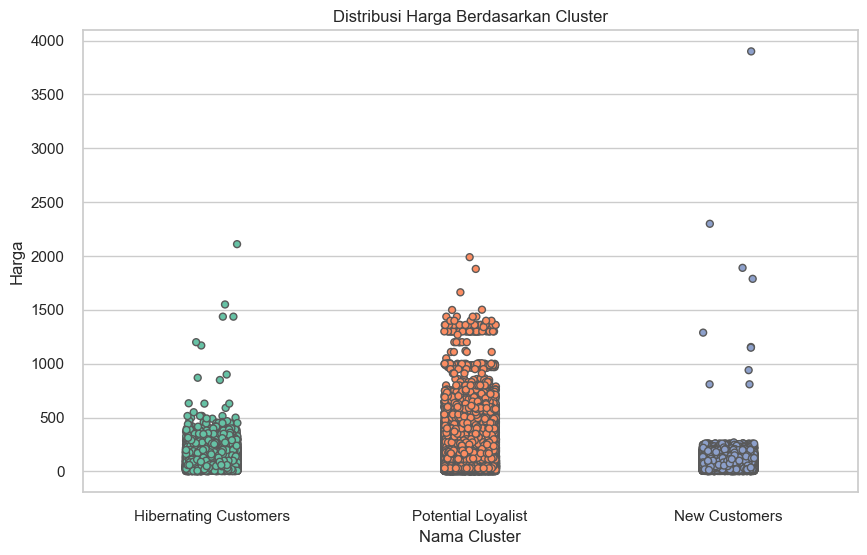

In [461]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=dfCluster, x="Name_Cluster", y="price", jitter=True, linewidth=1, palette="Set2")
plt.title('Distribusi Harga Berdasarkan Cluster')
plt.xlabel('Nama Cluster')
plt.ylabel('Harga')
plt.show()

- Plot ini menunjukkan bahwa harga produk bervariasi tergantung pada cluster pelanggan.
- Cluster New Customers cenderung membeli produk dengan harga lebih murah, sedangkan cluster Hibernating Customers cenderung membeli produk dengan harga lebih mahal dibandingkan cluster New Customers. Namun terlihat juga terdapat New Customers yang membeli barang dengan harga yang paling mahal.
- Cluster Potential Loyalist memiliki perilaku pembelian yang beragam, dengan beberapa membeli produk dengan harga murah dan yang lainnya membeli produk dengan harga mahal.

> Freight Value

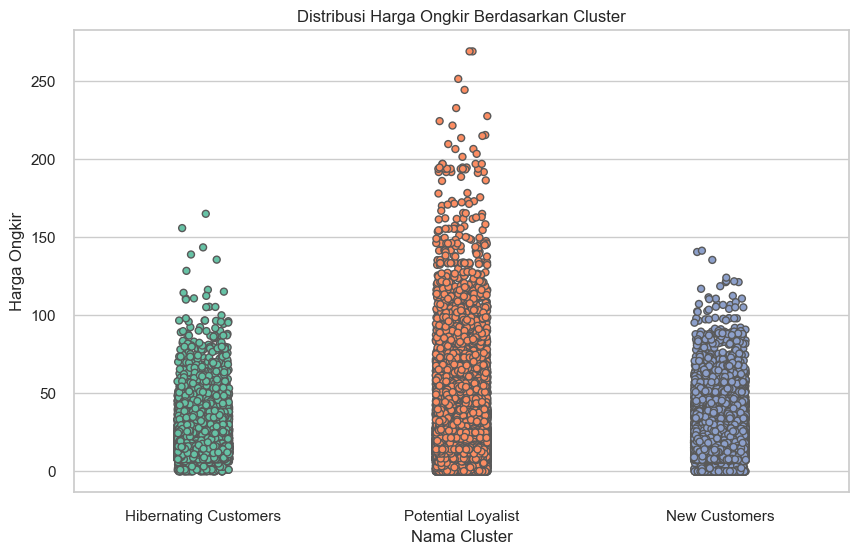

In [496]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=dfCluster, x="Name_Cluster", y="freight_value", jitter=True, linewidth=1, palette="Set2")
plt.title('Distribusi Harga Ongkir Berdasarkan Cluster')
plt.xlabel('Nama Cluster')
plt.ylabel('Harga Ongkir')
plt.show()

- Plot ini menunjukkan bahwa harga ongkir bervariasi tergantung pada cluster pelanggan.
- Cluster New Customers cenderung membeli produk dengan harga ongkir lebih murah, sedangkan cluster - Hibernating Customers cenderung membeli produk dengan harga ongkir lebih mahal.
- Cluster Potential Loyalist memiliki perilaku pembelian yang beragam, dengan beberapa membeli produk dengan harga ongkir murah dan yang lainnya membeli produk dengan harga ongkir mahal. Ada beberapa Potential Loyalist yang tidak mempermasalahkan harga ongkir, menunjukkan jika mereka sangat menyukai produk yang ditawarkan oleh perusahaan.

> *Recency Scale*

In [462]:
# pivot tabel untuk menghitung recency period berdasarkan cluster
pivot_table = pd.pivot_table(dfCluster, values='customer_unique_id', index='Name_Cluster', columns='Recency_Scale', aggfunc='count', fill_value=0)

# normalize proporsi
prop_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)
prop_table = prop_table[['<=3 Month', '4-6 Month', '7-9 Month', '>12 Month']]

In [299]:
import plotly.graph_objects as go

In [463]:
# membuat grafik
fig = go.Figure(data=[go.Bar(x=prop_table.columns, y=prop_table.loc[cluster_name], name=cluster_name) for cluster_name in prop_table.index])
fig.update_layout(barmode='stack', xaxis_title='Recency Period', yaxis_title='Proportion', title='Recency Period for Each Cluster Name')
fig.show()

- Proporsi pengguna yang sudah tidak aktif yang paling banyak adalah yang lebih dari 12 bulan.
- Potential Loyalist tersebar di seluruh recency period yang menunjukkan bahwa diperlukan tindakan lebih lanjut terutama untuk mempertahankan potential loyalist yang sudah lama tidak berbelanja.
- Cluster New Customers memiliki recency period yang cukup baru sehingga bisa diterapkan promosi seperti *welcome offers* agar pelanggan baru ini akan mengulang pembelanjaan di Olist.
- Untuk meningkatkan retensi pelanggan, dapat dilakukan strategi pemasaran khusus untuk kelompok ini, seperti memberikan penawaran khusus atau diskon untuk mendorong mereka untuk melakukan pembelian kembali. Terutama untuk cluster "Hibernating Customers" yang menduduki recency period diatas 7 bulan.

In [464]:
# Membuat pivot tabel dengan frekuensi
pivot_table = pd.pivot_table(dfCluster, values='customer_unique_id', index='Frequency_Scale', columns='Name_Cluster', aggfunc='count', fill_value=0)

# normalize proporsi
prop_table = pivot_table.div(pivot_table.sum(axis=0), axis=1)

# Membuat stack barplot
fig = go.Figure(data=[go.Bar(x=prop_table.columns, y=prop_table.loc[cluster_name], name=cluster_name) for cluster_name in prop_table.index])
fig.update_layout(barmode='stack', xaxis_title='Frequency Period', yaxis_title='Proportion', title='Frequency Period for Each Cluster Name')
fig.show()

- Dari sini terlihat bahwa memang permasalahan di Olist adalah dalam menangani retensi dari customers. Berdasarkan informasi diatas terlihat bahwa customer dominan melakukan transaksi hanya 1 kali saja. 
- Cluster Hibernasi Customers sebenarnya memiliki jumlah pembelanjaan yang lebih banyak dibandingkan New Customers. Dengan potensial pembelanjaan yang dilakukan berulang, maka harus dilakukan strategi yang bisa membuat Hibernating Customers ini berbelanja kembali seperti win-back offers.
- Cluster Pontential Loyalist didominasi oleh pembelanjaan lebih dari 1 kali

> *Order day per cluster*

In [470]:
# Membuat pivot tabel untuk order_day
pivot_table = pd.pivot_table(dfCluster, values='customer_unique_id', index='Name_Cluster', columns='order_approved_day_name', aggfunc='count', fill_value=0)

In [471]:
# normalize proporsi
prop_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

In [472]:
# normalize proporsi
prop_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)
prop_table

order_approved_day_name       Fri       Mon       Sat       Sun       Thu  \
Name_Cluster                                                                
Hibernating Customers    0.143203  0.128632  0.126759  0.100510  0.158463   
New Customers            0.150907  0.136372  0.116511  0.085577  0.159537   
Potential Loyalist       0.147185  0.132301  0.126203  0.086186  0.157600   

order_approved_day_name       Tue       Wed  
Name_Cluster                                 
Hibernating Customers    0.182537  0.159895  
New Customers            0.193564  0.157533  
Potential Loyalist       0.189527  0.160997

In [473]:
# Menetapkan urutan hari
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
prop_table = prop_table[order]

In [474]:
prop_table

order_approved_day_name       Mon       Tue       Wed       Thu       Fri  \
Name_Cluster                                                                
Hibernating Customers    0.128632  0.182537  0.159895  0.158463  0.143203   
New Customers            0.136372  0.193564  0.157533  0.159537  0.150907   
Potential Loyalist       0.132301  0.189527  0.160997  0.157600  0.147185   

order_approved_day_name       Sat       Sun  
Name_Cluster                                 
Hibernating Customers    0.126759  0.100510  
New Customers            0.116511  0.085577  
Potential Loyalist       0.126203  0.086186

In [475]:
# membuat stacked barplot
fig = go.Figure(data=[go.Bar(x=prop_table.columns, y=prop_table.loc[Name_Cluster], name=Name_Cluster) for Name_Cluster in prop_table.index])
fig.update_layout(barmode='stack', xaxis_title='Order Day', yaxis_title='Proportion', title='Order Day for Each Cluster Name')
fig.show()

- Pemesanan paling banyak di hari selasa dan terus menurun semakin menuju weekend.
- Setiap harinya memiliki proposi cluster yang kurang lebih sama, menunjukkan tidak ada perbedaan besar mengenai hari yang diminati oleh setiap cluster.

> Grafik penjualan mingguan

In [476]:
dfCluster1 = dfCluster.copy()

dfCluster1['Week'] = pd.qcut(dfCluster1['order_approved_at'].dt.day, q=4, labels=False)

monthly_sales = dfCluster1.groupby(['order_approved_month', 'Week'])['payment_value'].sum().reset_index()

In [477]:
# Adding a string column for the month for dropdown selection
monthly_sales['Month'] = monthly_sales['order_approved_month'].astype(str)

# Function to plot sales by a specific month
def plot_sales_by_month(month):
    month_data = monthly_sales[monthly_sales['Month'] == month]
    
    fig = px.bar(month_data, x='Week', y='payment_value',
                 labels={'payment_value': 'Penjualan', 'Week': 'Minggu'},
                 title=f'Penjualan Mingguan Bulan {month}')
    
    fig.update_layout(xaxis=dict(tickmode='array', tickvals=[0, 1, 2, 3], ticktext=['Minggu 1', 'Minggu 2', 'Minggu 3', 'Minggu 4']))
    
    fig.show()

In [478]:
for i in range (1, 13):
    plot_sales_by_month(str(i))

- Februari, Agustus, Oktober dan Desember memiliki penjualan tertinggi di minggu ke-1
- Maret, Mei, Juni, September memiliki penjualan tertinggi di minggu ke-2
- Januari, April, Juli, dan November memiliki penjualan tertinggi di minggu ke-4

Berdasarkan pola ini, dapat dikatakan pembelanjaan didominasi di awal bulan dan di akhir bulan. Berarti salah satu strategi bisnis yang dapat diterapkan adalah diskon-diskon atau Flash Sale di awal bulan dan akhir bulan. Bisa juga diterapkan diskon seperti gratis ongkir di tanggal-tanggal cantik (Seperti tanggal 1 bulan 1, tanggal 2 bulan 2). Dapat diterapkan juga diskon musiman seperti:

- Periode Liburan: Lakukan promosi dan penawaran menarik selama periode liburan utama seperti Natal (Desember), Paskah (April), dan Black Friday (November).
- Musim Kemarau: Tawarkan diskon untuk produk-produk yang berhubungan dengan musim panas, seperti pakaian renang, kacamata hitam, dan peralatan olahraga, pada bulan Februari, Agustus, Oktober, dan Desember.
- Musim Hujan: Tawarkan diskon untuk produk-produk yang berhubungan dengan musim hujan, seperti payung, jas hujan, dan sepatu bot, pada bulan Maret, Mei, Juni, dan September.


> Payment Value

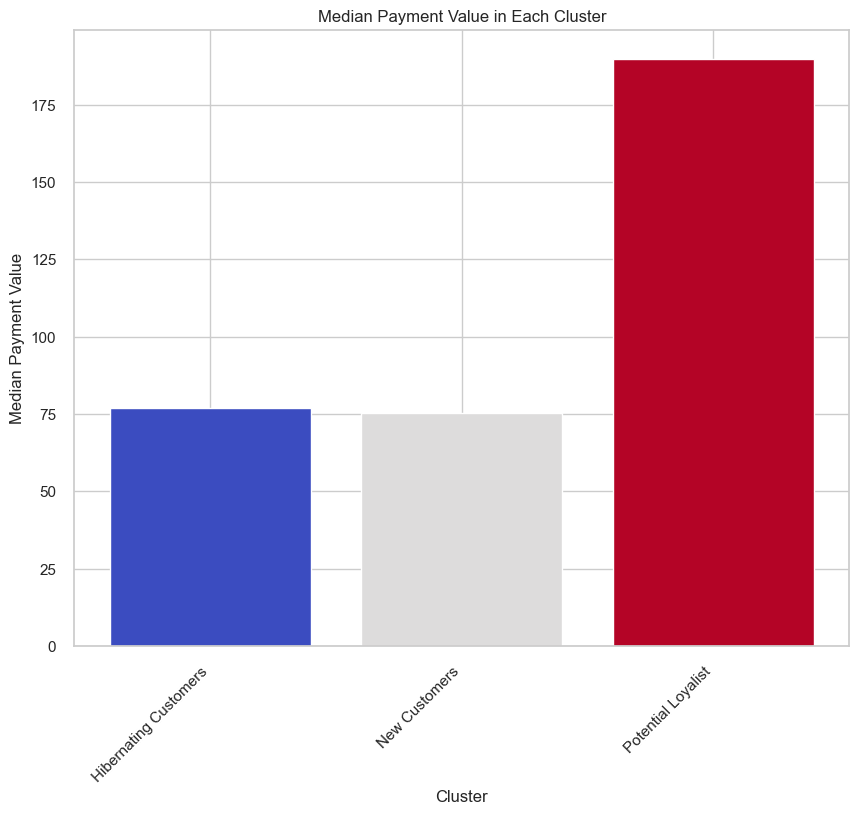

In [513]:
# Grouping the DataFrame by 'Name_Cluster' and calculating the median of 'payment_value'
mean_price = dfCluster.groupby('Name_Cluster')['payment_value'].median().sort_index()

# Extracting the cluster labels and their corresponding median payment values
cluster_labels = mean_price.index
payment_values = mean_price.values

# Generating a color gradient for the plot
colors = plt.cm.coolwarm(np.linspace(0, 1, len(mean_price)))

# Creating the plot with customized colors and discrete x-axis
plt.figure(figsize=(10, 8))
plt.bar(cluster_labels, payment_values, color=colors)

# Adding labels and title
plt.xlabel('Cluster')
plt.ylabel('Median Payment Value')
plt.title('Median Payment Value in Each Cluster')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

- Potential Loyalist memiliki nilai pembayaran pesanan yang jauh lebih tinggi dibandingkan cluster-cluster lainnya.
- Cluster hibernating customer dan new customer kurang lebih memiliki nilai pembayaran pesanan yang sama

> Kecepatan delivery per cluster

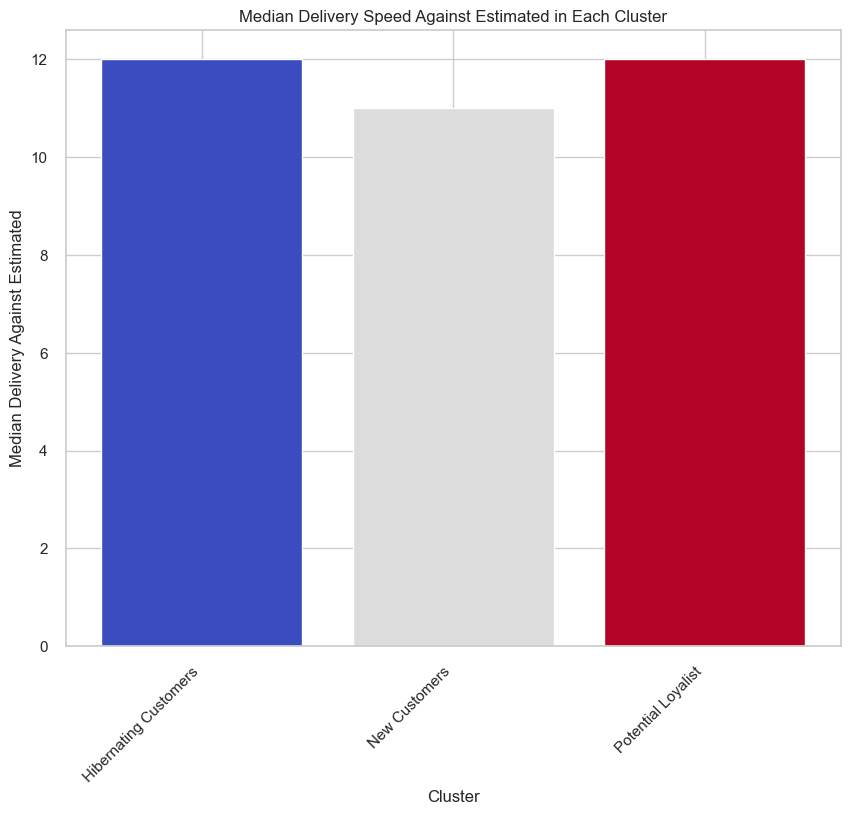

In [514]:
# Grouping the DataFrame by 'Name_Cluster' and calculating the median of 'delivery_against_estimated'
mean_delivery_speed = dfCluster.groupby('Name_Cluster')['delivery_against_estimated'].median().sort_index()

# Extracting the cluster labels and their corresponding median delivery speeds
cluster_labels = mean_delivery_speed.index
delivery_speeds = mean_delivery_speed.values

# Generating a color gradient for the plot
colors = plt.cm.coolwarm(np.linspace(0, 1, len(mean_delivery_speed)))

# Creating the plot with customized colors and discrete x-axis
plt.figure(figsize=(10, 8))
plt.bar(cluster_labels, delivery_speeds, color=colors)

# Adding labels and title
plt.xlabel('Cluster')
plt.ylabel('Median Delivery Against Estimated')
plt.title('Median Delivery Speed Against Estimated in Each Cluster')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

Dapat dikatakan tidak ada perbedaan yang signifikan mengenai kecepatan pengiriman barang sampai ke pelanggan di setiap cluster. Berarti pola/karakteristik dari cluster lebih banyak dipengaruhi oleh fitur lain.

## **Conclusion and Recommendation**

> *Conclusion*

**Kesimpulan EDA**

- Dari Oktober 2016 hingga April 2017, revenue meningkat secara signifikan, menunjukkan pertumbuhan yang konsisten. Setelah April 2017, revenue mengalami fluktuasi dengan puncak pada November 2017, kemudian menurun tetapi tetap lebih tinggi dari sebelumnya. Dari awal 2018 hingga Agustus 2018, revenue stabil dengan fluktuasi kecil. Pola ini mencerminkan pemulihan ekonomi Brazil yang lambat namun stabil setelah resesi pada 2015 dan 2016, diikuti oleh peningkatan pada 2017 dan pelambatan kembali pada 2018.
- Dari tahun 2016 sampai tahun 2017, baik pelanggan aktif dan jumlah pemesanan berangsur-angsur meningkat, sementara pada tahun 2018 memiliki jumlah yang cenderung stabil
- Sepanjang tahun 2017-2018, dapat dikatakan rata-rata per bulan *revenue* per pesanan bekisar di 140 BRL.
- Nilai pembayaran untuk pelanggan baru meningkat signifikan dari sekitar 0 menjadi 0,6 juta pada pertengahan 2018, sementara nilai pembayaran untuk pelanggan lama tetap datar dan rendah dengan sedikit fluktuasi mendekati 0. Grafik ini menunjukkan bahwa pelanggan baru berkontribusi lebih besar terhadap total nilai pembayaran dibandingkan pelanggan lama selama periode tersebut.
-Grafik tersebut menunjukkan bahwa rasio pelanggan baru tinggi pada awal 2017, kemudian menurun tajam dan stabil pada level yang lebih rendah. Ini mengindikasikan masuknya pelanggan baru signifikan pada awal 2017, diikuti oleh tingkat perolehan pelanggan baru yang konsisten namun lebih rendah pada bulan-bulan berikutnya.
- Jumlah order pada hari *weekday* lebih banyak dibandingkan *weekened* dengan puncak order di hari selasa dan paling sedikit di hari minggu.
- Metode pembayaran didominasi oleh credit_card dimana hampir 75% dari pelanggan menggunakannya dengan cicilan 1 bulan
- Meski Olist memiliki pelanggan baru setiap bulannya, namun memiliki masalah dalam mempertahankan pelanggannya dengan retention rate kurang dari 1% setiap bulannya



**Kesimpulan Model**
1. Berdasarkan metrik yang digunakan diperoleh bahwa segmentasi pelanggan dengan 3 cluster menjadi pilihan yang optimal
2. Pembagian klaster terdiri atas:
- *Potensial Loyalist* : terdiri dari pelanggan dengan frekuensi pembelian yang cukup baik, nilai pembelian yang tinggi, dan cukup baru melakukan pembelian.
- *New Customers* :  mewakili pelanggan yang jarang bertransaksi, mengeluarkan sedikit uang, tetapi baru saja melakukan pembelian
- *Hibernating Customers* : Klaster ini terdiri dari pelanggan dengan frekuensi dan nilai pembelian yang rendah, dan sudah cukup lama tidak melakukan pembelian.

> *Recommendation*

**Rekomendasi EDA**

Strategi untuk meningkatkan retensi pelanggan dapat dirangkum sebagai berikut:

1. Insentif untuk Metode Pembayaran Tertentu: Berikan insentif seperti potongan harga atau reward points lebih tinggi untuk transaksi menggunakan metode pembayaran tertentu seperti credit_card dan boleto. Memperluas opsi metode pembayaran juga dapat meningkatkan kepuasan pelanggan.

2. Layanan Otomatis dan Program Langganan: Tingkatkan fitur layanan dengan implementasi program langganan autodebet, yang menghilangkan kebutuhan untuk pembayaran manual setiap bulan, meningkatkan kenyamanan pelanggan.

3. Program Diskon Khusus: Implementasikan program diskon khusus pada akhir pekan pertama setiap bulan, mirip dengan konsep Black Friday, untuk meningkatkan penjualan dan menarik perhatian pelanggan.

4. Flash Sale dan Promo Personalisasi: Lakukan flash sale secara periodik dan berikan promo yang dipersonalisasi untuk meningkatkan awareness dan menarik minat pelanggan.

5. Diskon Tanggal Cantik dan Musiman: Berikan diskon khusus seperti gratis ongkir pada tanggal-tanggal cantik (misalnya tanggal 1 bulan 1, tanggal 2 bulan 2) serta diskon musiman terkait liburan (Natal, Paskah, Black Friday) dan musim (musim panas, musim hujan) untuk meningkatkan pembelian pada periode tertentu.

6. Peningkatan Kecepatan Pengiriman: Fokus pada peningkatan kecepatan pengiriman untuk meningkatkan kepuasan pelanggan dan memberikan pengalaman yang lebih baik.

Strategi ini diharapkan dapat membantu dalam mempertahankan pelanggan yang sudah ada, meningkatkan penjualan, dan meningkatkan kesadaran serta kepuasan pelanggan secara keseluruhan.

**Rekomendasi Model**

1. Menggunakan model tambahan yang belum digunakan seperti Agglomerative Hierarchy Clustering, DBscan, Gaussian Mixture Model, PCA.
2. Analisis pada fitur-fitur lain seperti demografi, produk yang dapat meningkatkan wawasan mengenai pelanggan.

| Jenis Cluster | Nama Cluster | Deskripsi Cluster | Strategi Bisnis |
|:------------:|:-------------:|:-----------------:|:-----------------------:|
| Cluster 0 | Potential Loyalist | Klaster ini terdiri dari pelanggan dengan frekuensi pembelian yang cukup baik, nilai pembelian yang tinggi, dan cukup baru melakukan pembelian. | Loyalty Programs: Buat program loyalitas khusus untuk menjaga dan meningkatkan hubungan dengan pelanggan ini.; Exclusive Offers: Berikan penawaran eksklusif, diskon khusus, atau preview produk baru untuk mempertahankan dan meningkatkan loyalitas mereka.; Personalized Communication: Kirim komunikasi yang dipersonalisasi untuk menginformasikan mereka tentang produk baru atau promosi yang relevan. |
| Cluster 1 | New Customers | Klaster ini mewakili pelanggan yang jarang bertransaksi, mengeluarkan sedikit uang, tetapi baru saja melakukan pembelian. | Welcome Offers: Berikan penawaran selamat datang yang menarik untuk mendorong pembelian ulang.; Education Campaigns: Lakukan kampanye edukasi mengenai produk dan manfaatnya untuk meningkatkan nilai pembelian mereka.; Follow-up Communication: Kirimkan komunikasi follow-up untuk memastikan mereka puas dengan pembelian mereka dan mengajak mereka untuk berbelanja lagi.|
| Cluster 2 | Hibernating Customers | Klaster ini terdiri dari pelanggan dengan frekuensi dan nilai pembelian yang rendah, dan sudah cukup lama tidak melakukan pembelian. | Re-engagement Campaigns: Lakukan kampanye re-engagement untuk menarik kembali pelanggan ini dengan penawaran yang menarik.; Feedback Collection: Kumpulkan umpan balik untuk memahami alasan mereka berhenti berbelanja dan melakukan perbaikan yang diperlukan.; Win-back Offers: Tawarkan diskon besar atau promosi khusus untuk mengajak mereka kembali berbelanja.

> Business Case

Contoh untuk meminimalisi biaya marketing. Total Biaya Marketing per Pelanggan per Bulan dalam Real Brasil (BRL)
- Email marketing: 10 email x R$ 0,08/email = R$ 0,80
- Telemarketing: 2 panggilan x 5 menit/panggilan x R$ 0,16/menit = R$ 1,60
- Total: R$ 0,80 + R$ 1,60 = R$ 2,40

Berarti per pelanggan untuk setiap bulan 2,4 BRL.

Referensi:
- Ecommerce Brasil: https://www.ecommercebrasil.com.br/
- Niagahoster: https://support.niagahoster.co.id/bagaimana-cara-meningkatkan-pengiriman-email/
- Marketer: https://www.upwork.com/hire/digital-marketers/br/
- VoIP: https://en.wikipedia.org/wiki/Voice_over_IP
- Call center: https://en.wikipedia.org/wiki/Call_centre
- Alat otomatisasi marketing: https://www.g2.com/

**Tanpa model**

Misal terdapat 1000 pelanggan. Dengan ratio cluster yaitu Potential Loyalist 19%, New Customers 49% dan Hibernating Customers 32% maka:
- Pelanggan yang menjadi target (Hibernating Customers) = 320 orang
- Pelanggan yang bukan target (Potential Loyalist, New Customers) = 680
- Jika semua pelanggan dikontak = 1000 * 2,4 BRL = 2400 BRL
- Biaya keluar untuk bukan target = 680 * 2,4 BRL = 1632 BRL

Berarti Olist mengalami kerugian karena pelanggan yang bukan terget sebesar 1632 BRL.

**Dengan model**

Namun dengan adanya model berarti
- Pelanggan yang menjadi target (Hibernating Customers) = 320 orang
- Pelanggan yang bukan target (Potential Loyalist, New Customers) = 680
- Hanya pelanggan target = 320 * 2,4 BRL = 768 BRL
- Biaya keluar untuk bukan target = 680 * 2,4 BRL = 1632 BRL

Dengan model berarti Olist dapat menghemat 1632 BRL.

### Thank You!!